# **An Iterative Monte Carlo Framework for Risk-Adjusted Valuation and Strategic Planning of Novel Pharmaceutical Assets**

# **A. Introduction**

This notebook presents a comprehensive Monte Carlo simulation model for the valuation and strategic optimization of a novel pharmaceutical asset, ROA-Onco-X, targeting a non-small cell lung cancer (NSCLC)-like indication. Moving beyond deterministic valuation approaches, the model integrates a wide array of uncertainties inherent in drug development, clinical outcomes, market access, and commercialization dynamics. Through an iterative process of anchoring probabilistic priors to real-world data and incorporating strategic decision variables, this framework aims to quantify risk-adjusted intrinsic value (IV), assess trade-offs between financial performance, market equity, and launch timeliness, and ultimately support data-driven strategic planning in a highly uncertain environment. The model demonstrates a structured approach to drug asset valuation, evolving from stylized assumptions to a data-informed, decision-support tool.

# **B. Scope and Limitations**

### Scope:

The model's primary scope is the valuation of a single pharmaceutical asset (ROA-Onco-X) within a defined therapeutic area (NSCLC-like indication) over a 15-year commercialization horizon. It covers key stages from late-stage clinical development through regulatory approval and market launch. The model explicitly accounts for:

*   **Uncertainty:** Through Monte Carlo simulations across clinical, regulatory, and commercial parameters.
*   **Scenario Analysis:** Modeling discrete macro-level market and development scenarios (e.g., pricing shocks, early competition, delays, failure).
*   **Market Dynamics:** Incorporating epidemiology, patient eligibility, pricing, market access, and uptake.
*   **Financials:** Projecting revenues, costs, taxes, and pre-launch burn to derive risk-adjusted Free Cash Flow and Intrinsic Value.
*   **Strategic Decisions:** Allowing for the optimization of strategic levers (e.g., pricing, market access investment, equity commitment, price concessions, evidence generation) against multiple objectives.

### Limitations:

While robust, the model operates under certain limitations:

*   **Single Asset Focus:** The model evaluates a single asset and does not account for portfolio effects, diversification, or competition for internal resources within a larger pharmaceutical pipeline.
*   **Simplified Market Segmentation:** For the NSCLC-like indication, the model uses aggregated incidence and eligibility criteria. More granular models might stratify patient populations by specific biomarkers, lines of therapy, or geographical sub-regions to capture nuanced market dynamics.
*   **Generalized Competition:** Competition is modeled as a market erosion factor (phi) and a time-to-competition. It does not explicitly simulate the entry, clinical profiles, or pricing strategies of multiple, specific competitors.
*   **Simplified Uptake Mechanics:** While uptake curves are modeled, they are based on generalized parameters. Highly granular models might incorporate physician-level prescribing data, patient adherence, or regional market access variations.
*   **Exclusion of Health Economic Outcomes Research (HEOR) Details:** While commercial anchoring is performed, detailed cost-effectiveness analyses, budget impact models, or specific HTA body requirements are not explicitly built into the core cash flow calculation.
*   **No Deep Learning Integration:** The current model is parameter-driven using probabilistic distributions. It does not employ deep learning to extract patterns from raw, complex datasets (e.g., patient-level data) to inform its inputs or sub-models, although this could be a future enhancement.

# **C. Methodology & Foundations**

This model builds upon and synthesizes established methodologies in pharmaceutical valuation and risk analysis:

*   **Real Options Analysis (ROA):** Conceptually, the model aligns with the principles of real options, valuing the flexibility and strategic choices inherent in R&D projects. While not a formal real options model, the Monte Carlo framework captures the uncertain payoffs and the decision layer explores strategic choices that influence these payoffs.
*   **Monte Carlo Simulation for Drug Valuation:** The core methodology is widely recognized in both industry and academia for drug asset valuation, extending early deterministic models (e.g., discounted cash flow) by explicitly quantifying and propagating uncertainty.
*   **Iterative Model Refinement:** The staged anchoring of priors (stylized to incidence, timing, clinical, and commercial data) reflects best practices in model development, where initial broad assumptions are progressively refined with empirical evidence. This mirrors the evolution of valuation models from early-stage conceptualization to more data-informed tools.
*   **Multi-Objective Optimization in Strategic Planning:** The decision layer, with its use of a composite score and Pareto frontier analysis, draws from multi-objective optimization literature, which is increasingly applied in strategic resource allocation and decision-making within the life sciences sector. This moves beyond single-objective financial valuation to incorporate strategic market considerations like equity and timeliness.
*   **Pharmacoeconomic Modeling:** The integration of epidemiology, clinical outcomes, market access, and pricing implicitly builds on the foundations of pharmacoeconomic modeling, which assesses the value of health interventions from various perspectives.

# **D. Model Modules and Implementation**

The model is implemented in Python, leveraging NumPy for high-performance numerical operations and Pandas for data management and analysis. It comprises several key modules:

1.  **Helper Functions:** A suite of functions (`trunc_normal`, `beta_from_mean_range`, `lognormal_from_range`, `triangular`, `sigmoid`) generates random samples from specified probability distributions, often with truncation or transformation, to define the probabilistic priors for model inputs.

2.  **Configuration and Initialization:** Defines global parameters such as the number of Monte Carlo scenarios (`N`), simulation horizon (`HORIZON_YEARS`), and initializes scenario weights and discount rate regimes.

3.  **Priors Definition (Iterative Anchoring):**
    *   **Epidemiology:** Draws annual incidence (I_US0, I_EU0) and growth rates (g_epi).
    *   **Eligibility:** Defines patient eligibility proportions (p_adv, p_2L, p_bio, p_elig).
    *   **Clinical Effects:** Quantifies efficacy (dPFS/HR_PFS, HR_OS) and safety (dSAE) profiles, which are then used to derive a `label strength` proxy (S).
    *   **Development/Regulatory:** Defines probabilities of success (P_P3, P_APP) and timelines (T_P3_mo, T_APP_mo, including specific FDA/EMA models).
    *   **Pricing/Access/Uptake:** Specifies initial pricing (Price_US, Price_EU), market access rates (Access_US, Access_EU), uptake curve parameters (k_uptake, t_mid), and reimbursement lags (EU_reimb_lag_mo, US_access_lag_mo).
    *   **Competition:** Models time to competition (T_comp_mo) and market erosion (phi).
    *   **Costs/Financials:** Defines cost of goods sold (c_cogs), selling/general/administrative (c_sga), post-launch R&D (c_rd_post), capital expenditure (capex_pct), and tax rates (tax_pct). Also includes pre-launch burn, probability of fundraising (P_raise), and dilution.

4.  **Label Assignment:** Maps the clinical profile (dPFS/dSAE) into a categorical label (narrow, base, broad) which, in turn, influences the maximum market uptake (Umax).

5.  **Scenario Application:** Modifies baseline parameters (e.g., T_APP_mo, Price_US, Access_US, T_comp_mo) based on the sampled macro-scenario (e.g., S1_delay, S4_pricing_shock, S5_early_comp).

6.  **Cashflow Simulation Engine:** A vectorized annual simulation calculates:
    *   Eligible patient populations (N_US_t, N_EU_t) over time.
    *   Market uptake (U_t) considering launch timing and market availability.
    *   Total revenue (Rev) based on treated patients, prices, and access.
    *   Costs (EBIT, Capex, Taxes) to derive annual Free Cash Flow (FCF).
    *   Pre-launch burn, accounting for success/failure.

7.  **Valuation:** Discounts annual FCF and Burn to present value using scenario-specific discount rates (`r`) to calculate Intrinsic Value (IV). Equity dilution is applied to derive IV per share (IV_ps).

8.  **Output Summarization:** Functions (`summarize`, `cvar`) calculate key statistics (mean, percentiles, CVaR, probability of positive IV) and aggregate results by scenario.

9.  **Decision Layer and Optimization:**
    *   **`build_world`:** Pre-samples all non-decision-dependent uncertainties, ensuring consistency across policy evaluations.
    *   **`eval_policy_enhanced`:** A highly vectorized function that takes decision variables (price multiplier, EU access investment, equity commitment, EU price concession, evidence acceleration) and calculates `mean_IV`, `cvar10`, `prob_pos`, `equity_ratio_y5`, and `eu_lag_median_mo` for a given policy.
    *   **`optimize_enhanced`:** Explores the multi-dimensional decision space using random sampling and an evolutionary search strategy to find optimal policies that meet specified equity and timeliness targets while maximizing a composite score. It also identifies the Pareto frontier.

# **E. Results**

The notebook demonstrates the evolution of the model's results through various runs and culminates in a decision-making framework:

*   **Initial Runs (Stylized to Clinical Anchored):** Show a progressive shift in the Intrinsic Value (IV) distribution as more real-world data are incorporated. Early runs with stylized priors might show a wider or different distribution. As priors become anchored (incidence, timing, clinical), the IV distributions tend to become more realistic, often shifting the mean and tightening the confidence intervals.

*   **Commercial Anchored Runs (Run #5 / #5.1):** The commercial anchoring (using real-world annual therapy costs and reimbursement lags) significantly impacts the model's valuation, typically leading to higher overall revenue potential and thus potentially higher (or less negative) mean IV compared to earlier stylized pricing assumptions. Run #5.1, using an HR-based PFS, offers a more clinically nuanced view, which may subtly alter label strength and subsequent uptake/value compared to a simple dPFS.

*   **Key Commercial Diagnostics:** Diagnostic plots and tables highlight the impact of anchored commercial priors, e.g., the distribution of US annual therapy price, EU price ratios, and EU reimbursement lags.

*   **Decision Layer Outcomes (Step 5.0 / 5.2):**
    *   **Feasibility:** The initial optimization (Step 5.0) showed that achieving ambitious equity and timeliness targets (e.g., 0.75 equity ratio, 12-month EU lag) might be infeasible or lead to highly negative IV under the baseline commercial assumptions. This highlights the constraints of the initial strategic levers.
    *   **Enhanced Levers:** The introduction of new levers (EU price concession, evidence acceleration) in Step 5.2 demonstrates that higher equity targets and faster market access *can* be achieved. The optimized policy typically involves a combination of these levers.
    *   **Trade-offs (Pareto Frontier):** The Pareto frontier visually represents the trade-offs between mean IV and equity. It shows that achieving higher equity (e.g., better EU/US reach ratio) or faster EU market access often comes at a cost of lower mean IV, but also identifies the efficient frontier of strategies.
    *   **Policy Menu:** The generated policy menu provides decision-makers with a concise overview of optimal strategies under different combinations of equity and timeliness targets. This allows for an informed choice based on the organization's strategic priorities (e.g., is maximizing IV paramount, or is achieving market equity more critical, even at a lower IV?).

*   **Scenario-Specific Performance:** Throughout the runs, scenario attribution tables (e.g., `by_scenario`) consistently show which scenarios (e.g., 'S3_broad' for strong clinical results, 'S6_failure' for product failure) drive the highest and lowest IV, helping to understand key value drivers and risks.

# **F. Summary and Outlook**

This notebook provides a robust, transparent, and computationally efficient Monte Carlo simulation model for the valuation and strategic planning of a pharmaceutical asset. Its strengths lie in its comprehensive integration of probabilistic inputs across clinical, regulatory, and commercial domains, the iterative anchoring of priors to real-world data, and its ability to explore strategic trade-offs through a decision optimization layer.

### Key Takeaways:

*   **Uncertainty Quantification:** The Monte Carlo approach provides a more complete picture of an asset's risk-adjusted value compared to deterministic models.
*   **Data-Driven Decisions:** The iterative anchoring process highlights the critical importance of grounding model assumptions in empirical data.
*   **Strategic Trade-offs:** The decision layer effectively quantifies the financial impact of pursuing non-financial objectives, such as market equity or rapid market access, enabling informed choices among competing strategic priorities.
*   **Dynamic Response to Market Conditions:** Scenario analysis allows for proactive planning by understanding how different market realities might impact value.

### Outlook and Future Enhancements:

To further enhance the model's predictive power and granularity, future work could focus on:

*   **Advanced Market Segmentation:** Incorporating more detailed patient segmentation (e.g., by biomarker status, prior lines of therapy) to refine incidence and eligible population estimates.
*   **Competitive Dynamics:** Developing more sophisticated sub-models for competitive entry and market share erosion, potentially using game theory or agent-based modeling.
*   **Deep Learning Integration:** Leveraging deep learning for more accurate prediction of specific input parameters (e.g., clinical trial success probabilities, market uptake drivers) from large, complex datasets, thereby creating a hybrid modeling approach.
*   **Geographic Granularity:** Expanding the model to include more countries or regions with specific pricing, access, and reimbursement dynamics.
*   **Flexibility in Decision Timing:** Modeling the option to defer, abandon, or expand the project at various development milestones, aligning more closely with a formal Real Options Analysis.
*   **Cost-Effectiveness Analysis:** Integrating health economic outcomes research (HEOR) components to assess the value-for-money of the asset in different healthcare systems, which profoundly influences market access and pricing.

In [60]:
import numpy as np, pandas as pd, math, os, json
from dataclasses import dataclass
import matplotlib.pyplot as plt

np.random.seed(42)

# -----------------------------
# Helpers for distributions
# -----------------------------
def trunc_normal(mean, sd, low, high, size):
    x = np.random.normal(mean, sd, size)
    # simple rejection loop (fast enough for our sizes)
    mask = (x < low) | (x > high)
    while mask.any():
        x[mask] = np.random.normal(mean, sd, mask.sum())
        mask = (x < low) | (x > high)
    return x

def beta_from_mean_range(mean, low, high, size, strength=20):
    """
    Create a beta distribution centered around 'mean' and clipped to [low, high] via affine transform.
    We sample beta(a,b) with concentration 'strength', then map to [low, high].
    """
    mean01 = (mean - low) / (high - low)
    mean01 = np.clip(mean01, 1e-3, 1-1e-3)
    a = mean01 * strength
    b = (1-mean01) * strength
    x01 = np.random.beta(a, b, size)
    return low + x01 * (high - low)

def triangular(left, mode, right, size):
    return np.random.triangular(left, mode, right, size)

def lognormal_from_range(low, high, size, median=None):
    """
    Rough lognormal sampler given a plausible range [low, high] and optional median.
    We'll set sigma so that 5th~low and 95th~high (approx).
    """
    if median is None:
        median = math.sqrt(low*high)
    mu = math.log(median)
    # For lognormal, 95th percentile: exp(mu + 1.645*sigma); 5th: exp(mu - 1.645*sigma)
    sigma = (math.log(high) - math.log(low)) / (2*1.645)
    return np.random.lognormal(mean=mu, sigma=sigma, size=size)

# -----------------------------
# Model settings
# -----------------------------
N = 50000  # Monte Carlo scenarios

HORIZON_YEARS = 15
POST_LAUNCH_YEARS = 12  # after launch years to model commercialization
LAUNCH_WINDOW_MAX_YEARS = 6  # cap launch time for modeling convenience (delays beyond treated as 'late')

# Scenario mixture weights (conservative default)
scenario_weights = {
    "S0_base": 0.40,
    "S1_delay": 0.12,
    "S2_narrow": 0.10,
    "S3_broad": 0.08,
    "S4_pricing_shock": 0.10,
    "S5_early_comp": 0.10,
    "S6_failure": 0.07,
    "S7_perfect_storm": 0.03
}
assert abs(sum(scenario_weights.values())-1.0) < 1e-9

scenario_names = list(scenario_weights.keys())
scenario_probs = np.array([scenario_weights[k] for k in scenario_names])
scenario_id = np.random.choice(len(scenario_names), size=N, p=scenario_probs)
scenario = np.array(scenario_names)[scenario_id]

# Macro discount regime
regime = np.random.choice(["low","normal","high"], size=N, p=[0.25,0.50,0.25])
r = np.where(regime=="low",
             trunc_normal(0.09, 0.005, 0.08, 0.10, N),
             np.where(regime=="normal",
                      trunc_normal(0.11, 0.006, 0.10, 0.12, N),
                      trunc_normal(0.13, 0.006, 0.12, 0.14, N)))

# -----------------------------
# Priors (stylized placeholders to start compute)
# In the next iteration, we will anchor these from SEER/GBD/ClinicalTrials/FDA.
# -----------------------------
# Epidemiology
I_US0 = lognormal_from_range(120000, 220000, N)   # annual NSCLC-like incidence
I_EU0 = lognormal_from_range(150000, 300000, N)   # EU5 aggregate incidence
g_epi = trunc_normal(0.01, 0.01, -0.01, 0.03, N)

p_adv = beta_from_mean_range(0.55, 0.35, 0.70, N)
p_2L  = beta_from_mean_range(0.50, 0.25, 0.70, N)
p_bio = beta_from_mean_range(0.30, 0.15, 0.45, N)
p_elig= beta_from_mean_range(0.80, 0.60, 0.90, N)

# Clinical effects
dPFS = triangular(1.5, 3.5, 7.0, N)  # months
HR_OS = np.clip(lognormal_from_range(0.65, 0.90, N, median=0.78), 0.55, 1.05)
dSAE = trunc_normal(0.03, 0.03, -0.02, 0.08, N)   # absolute delta rate (0.03 = +3%)

# Development/regulatory
P_P3 = beta_from_mean_range(0.55, 0.40, 0.70, N)
P_APP = beta_from_mean_range(0.85, 0.75, 0.95, N)
T_P3_mo = lognormal_from_range(18, 42, N, median=28)
T_APP_mo = lognormal_from_range(6, 18, N, median=10)

# Pricing/access/uptake
Price_US = lognormal_from_range(90000, 220000, N, median=145000)
eu_ratio = trunc_normal(0.55, 0.08, 0.40, 0.70, N)
Price_EU = Price_US * eu_ratio

Access_US = beta_from_mean_range(0.85, 0.70, 0.95, N)
Access_EU = beta_from_mean_range(0.70, 0.55, 0.85, N)

k_uptake = lognormal_from_range(0.4, 1.2, N, median=0.7)
t_mid = triangular(0.8, 1.5, 2.5, N)  # years

# Competition
T_comp_mo = lognormal_from_range(18, 72, N, median=36)
phi = beta_from_mean_range(0.72, 0.55, 0.85, N)

# Costs
c_cogs = beta_from_mean_range(0.12, 0.05, 0.20, N)
c_sga  = beta_from_mean_range(0.32, 0.20, 0.45, N)
c_rd_post = beta_from_mean_range(0.10, 0.05, 0.15, N)
capex_pct = beta_from_mean_range(0.03, 0.01, 0.05, N)
tax_pct = triangular(0.10, 0.18, 0.25, N)

# Burn & dilution
Burn_pre = lognormal_from_range(80e6, 350e6, N, median=170e6)  # annual
P_raise  = beta_from_mean_range(0.65, 0.40, 0.80, N)
Dilution = triangular(0.05, 0.15, 0.35, N)

# -----------------------------
# Label assignment (auditable)
# -----------------------------
# Normalize dPFS (1.5..7.0) and dSAE (-0.02..0.08) where lower is better
dPFS_n = (dPFS - 1.5) / (7.0 - 1.5)
dSAE_n = (dSAE - (-0.02)) / (0.08 - (-0.02))
S = 0.7*dPFS_n + 0.3*(1 - dSAE_n)

# Smooth mapping to probabilities
# Use logistic boundaries around 0.40 and 0.70
def sigmoid(x):
    return 1/(1+np.exp(-x))

p_broad = sigmoid((S - 0.70)/0.07) * 0.60  # cap broad prob
p_narrow = sigmoid((0.40 - S)/0.07) * 0.70 # cap narrow prob
p_base = 1 - p_broad - p_narrow
# ensure valid
p_base = np.clip(p_base, 0.05, 0.90)
# renormalize
Z = p_broad + p_base + p_narrow
p_broad, p_base, p_narrow = p_broad/Z, p_base/Z, p_narrow/Z

u = np.random.rand(N)
L = np.where(u < p_narrow, "narrow", np.where(u < p_narrow+p_base, "base", "broad"))

# Peak uptake ranges by label (draw within band)
Umax = np.zeros(N)
Umax[L=="narrow"] = np.random.uniform(0.10, 0.25, (L=="narrow").sum())
Umax[L=="base"]   = np.random.uniform(0.20, 0.45, (L=="base").sum())
Umax[L=="broad"]  = np.random.uniform(0.35, 0.65, (L=="broad").sum())

# -----------------------------
# Apply scenario family modifiers
# -----------------------------
# Failure: force no launch
force_failure = (scenario=="S6_failure")

# Delay: add extra months to P3 and/or approval
delay_mask = (scenario=="S1_delay") | (scenario=="S7_perfect_storm")
extra_delay = np.zeros(N)
extra_delay[delay_mask] = lognormal_from_range(6, 24, delay_mask.sum(), median=10)  # additional months
T_APP_mo = T_APP_mo + extra_delay

# Narrow/broad enforced in scenario families (shift label deterministically)
L = np.where(scenario=="S2_narrow", "narrow", L)
L = np.where(scenario=="S3_broad", "broad", L)
L = np.where(scenario=="S7_perfect_storm", "narrow", L)

# Recompute Umax after forced label changes where applicable
Umax2 = np.copy(Umax)
forced = (scenario=="S2_narrow") | (scenario=="S3_broad") | (scenario=="S7_perfect_storm")
# redraw peak uptake for forced labels (keeps scenario consistent)
Umax2[(scenario=="S2_narrow") | (scenario=="S7_perfect_storm")] = np.random.uniform(0.10, 0.25, ((scenario=="S2_narrow") | (scenario=="S7_perfect_storm")).sum())
Umax2[(scenario=="S3_broad")] = np.random.uniform(0.35, 0.65, (scenario=="S3_broad").sum())
Umax = Umax2

# Pricing shock
pricing_mask = (scenario=="S4_pricing_shock") | (scenario=="S7_perfect_storm")
price_shock = np.ones(N)
access_shock = np.ones(N)
price_shock[pricing_mask] = 1 - np.random.uniform(0.10, 0.30, pricing_mask.sum())  # -10% to -30%
access_shock[pricing_mask] = 1 - np.random.uniform(0.05, 0.20, pricing_mask.sum()) # -5% to -20%
Price_US = Price_US * price_shock
Price_EU = Price_EU * price_shock
Access_US = np.clip(Access_US * access_shock, 0.35, 1.0)
Access_EU = np.clip(Access_EU * access_shock, 0.30, 1.0)

# Early competition
early_comp_mask = (scenario=="S5_early_comp") | (scenario=="S7_perfect_storm")
T_comp_mo[early_comp_mask] = lognormal_from_range(6, 30, early_comp_mask.sum(), median=15)
phi[early_comp_mask] = beta_from_mean_range(0.60, 0.45, 0.75, early_comp_mask.sum())

# -----------------------------
# Simulate launch outcome
# -----------------------------
# Phase III success and approval
p3_success = (np.random.rand(N) < P_P3) & (~force_failure)
app_success = (np.random.rand(N) < P_APP) & p3_success

# launch time in years
T_launch_yrs = (T_P3_mo + T_APP_mo)/12.0
# cap very late launches for computational simplicity
T_launch_yrs = np.minimum(T_launch_yrs, LAUNCH_WINDOW_MAX_YEARS)

launched = app_success

# -----------------------------
# Cashflow simulation (annual post-launch)
# -----------------------------
years = np.arange(1, HORIZON_YEARS+1)  # 1..15

# Build incidence over time (annual)
I_US_t = I_US0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))
I_EU_t = I_EU0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))

# Eligible pool
N_US_t = I_US_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]
N_EU_t = I_EU_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]

# Uptake curve starts at launch; define t_since_launch
t_since_launch = years[None,:] - T_launch_yrs[:,None]
t_since_launch = np.maximum(t_since_launch, 0.0)

U_t = Umax[:,None] / (1 + np.exp(-k_uptake[:,None]*(t_since_launch - t_mid[:,None])))

# No sales before launch
U_t = U_t * launched[:,None]

# Access factor
Access_US_t = Access_US[:,None]
Access_EU_t = Access_EU[:,None]

Treated_US = N_US_t * U_t * Access_US_t
Treated_EU = N_EU_t * U_t * Access_EU_t

Rev_US = Treated_US * Price_US[:,None]
Rev_EU = Treated_EU * Price_EU[:,None]
Rev = Rev_US + Rev_EU

# Competition erosion: apply from year when t_since_launch >= T_comp
T_comp_yrs = T_comp_mo/12.0
comp_active = (t_since_launch >= T_comp_yrs[:,None]) & launched[:,None]
Rev = Rev * np.where(comp_active, phi[:,None], 1.0)

# Costs and taxes
m = 1 - c_cogs - c_sga - c_rd_post
EBIT = Rev * m[:,None]
Capex = Rev * capex_pct[:,None]
Taxes = np.maximum(EBIT, 0) * tax_pct[:,None]
FCF = EBIT - Capex - Taxes

# Pre-launch burn: apply yearly burn until launch (if launched) or until horizon (if not)
burn_years = (years[None,:] <= np.floor(T_launch_yrs[:,None]).astype(int))
# For non-launched, burn for a limited window (say up to 4 years) to avoid infinite sink
burn_limit = 4
burn_years_nonlaunch = (years[None,:] <= burn_limit)
burn_mask = np.where(launched[:,None], burn_years, burn_years_nonlaunch)
Burn = Burn_pre[:,None] * burn_mask

# Discount factors
disc = (1 + r)[:,None] ** (years[None,:])

PV_FCF = (FCF / disc).sum(axis=1)
PV_Burn = (Burn / disc).sum(axis=1)

IV = PV_FCF - PV_Burn

# Dilution (if raise occurs)
raise_occurs = (np.random.rand(N) < P_raise)
IV_per_share = IV / (1 + np.where(raise_occurs, Dilution, 0.0))

# -----------------------------
# Summaries
# -----------------------------
def summarize(x):
    q = np.percentile(x, [5,10,25,50,75,90,95])
    return {
        "mean": float(np.mean(x)),
        "p5": float(q[0]), "p10": float(q[1]), "p25": float(q[2]),
        "p50": float(q[3]), "p75": float(q[4]), "p90": float(q[5]), "p95": float(q[6])
    }

summary_iv = summarize(IV_per_share)

# CVaR (10% and 5%)
def cvar(x, alpha=0.10):
    thr = np.quantile(x, alpha)
    return float(x[x <= thr].mean())

cvar_10 = cvar(IV_per_share, 0.10)
cvar_05 = cvar(IV_per_share, 0.05)

# Scenario attribution (mean IV and tail)
df = pd.DataFrame({
    "scenario": scenario,
    "regime": regime,
    "IV": IV_per_share,
    "launched": launched,
    "label": L
})

by_scenario = df.groupby("scenario").agg(
    n=("IV","size"),
    mean_IV=("IV","mean"),
    p10=("IV", lambda s: np.quantile(s, 0.10)),
    p50=("IV", "median"),
    launch_rate=("launched","mean"),
).reset_index().sort_values("mean_IV", ascending=False)

# Show results
summary_table = pd.DataFrame([summary_iv])
summary_table["cvar_10"] = cvar_10
summary_table["cvar_05"] = cvar_05

summary_table, by_scenario.head(10), df.head()


(           mean            p5           p10           p25           p50  \
 0 -1.520056e+08 -8.905772e+08 -7.335287e+08 -5.200135e+08 -3.058994e+08   
 
             p75           p90           p95       cvar_10       cvar_05  
 0  1.759095e+08  6.320885e+08  9.434242e+08 -9.613306e+08 -1.119526e+09  ,
            scenario      n       mean_IV           p10           p50  \
 3          S3_broad   4074  1.429782e+08 -7.135306e+08 -2.576561e+08   
 0           S0_base  20083 -9.334097e+07 -7.217627e+08 -2.701746e+08   
 5     S5_early_comp   4949 -1.372155e+08 -6.955147e+08 -2.647076e+08   
 1          S1_delay   6033 -1.577561e+08 -7.210892e+08 -2.923844e+08   
 4  S4_pricing_shock   4919 -2.063442e+08 -7.292881e+08 -2.933916e+08   
 2         S2_narrow   4965 -2.439367e+08 -7.107776e+08 -2.914918e+08   
 7  S7_perfect_storm   1468 -3.947694e+08 -7.726294e+08 -3.642954e+08   
 6        S6_failure   3509 -5.334022e+08 -8.646202e+08 -4.840508e+08   
 
    launch_rate  
 3     0.461217  


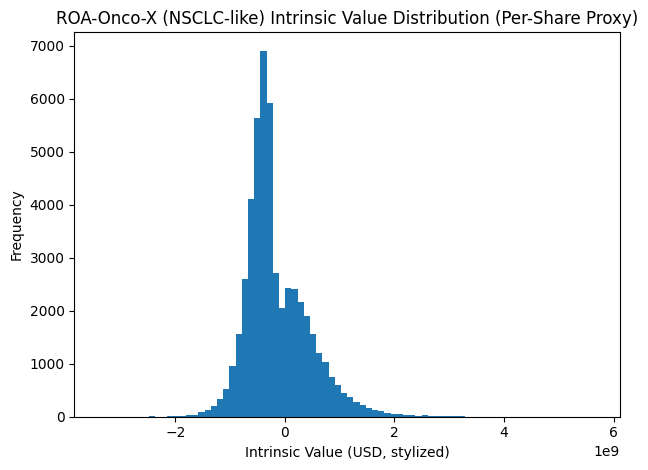

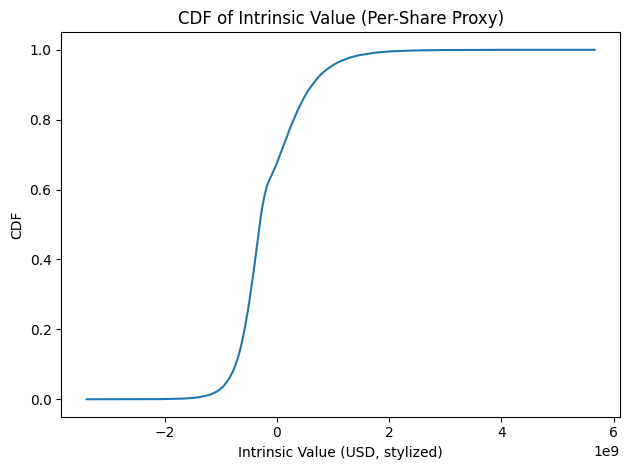

'/mnt/data/ROA_OncoX_NSCLC_v1_first_run.md'

In [61]:
# Produce a few plots and a concise report artifact
import matplotlib.pyplot as plt
import os

# Ensure the output directory exists
output_dir = "/mnt/data/"
os.makedirs(output_dir, exist_ok=True)

# Histogram of IV
plt.figure()
plt.hist(df["IV"].values, bins=80)
plt.title("ROA-Onco-X (NSCLC-like) Intrinsic Value Distribution (Per-Share Proxy)")
plt.xlabel("Intrinsic Value (USD, stylized)")
plt.ylabel("Frequency")
plt.tight_layout()
hist_path = os.path.join(output_dir, "roa_iv_hist.png")
plt.show() # Display the plot

# CDF plot
x = np.sort(df["IV"].values)
y = np.arange(1, len(x)+1)/len(x)
plt.figure()
plt.plot(x, y)
plt.title("CDF of Intrinsic Value (Per-Share Proxy)")
plt.xlabel("Intrinsic Value (USD, stylized)")
plt.ylabel("CDF")
plt.tight_layout()
cdf_path = os.path.join(output_dir, "roa_iv_cdf.png")
plt.show() # Display the plot

# Write a markdown report
report = []
report.append("# ROA-Onco-X (NSCLC-like) — Institution-Grade v1: First Compute Run (Stylized Priors)\n")
report.append("This run uses stylized priors (placeholders) consistent with the model contract. Next iteration will anchor priors from SEER/GBD, ClinicalTrials.gov, FDA/EMA, and PubMed.\n")
report.append("## Summary Statistics (Intrinsic Value, per-share proxy)\n")
report.append(summary_table.to_markdown(index=False))
report.append("\n\n## Scenario Attribution (Top-level)\n")
report.append(by_scenario.to_markdown(index=False))
report.append("\n\n## Notes\n")
report.append("- Negative mean reflects conservative assumptions and substantial pre-launch burn + development risk.\n")
report.append("- Launch rate is driven by sampled Phase III success and conditional approval.\n")
report.append("- Tail metrics (CVaR) reflect downside families and dilution/burn assumptions.\n")
report_md = "\n".join(report)

md_path = os.path.join(output_dir, "ROA_OncoX_NSCLC_v1_first_run.md")
with open(md_path, "w", encoding="utf-8") as f:
    f.write(report_md)

# The markdown path is returned, but the plots will now show inline above this output.
md_path

In [62]:
import numpy as np, pandas as pd, math
import matplotlib.pyplot as plt

np.random.seed(123)

# Reuse helper functions from prior state (they remain in kernel)
# Model config
N = 50000
HORIZON_YEARS = 15
LAUNCH_WINDOW_MAX_YEARS = 6

scenario_weights = {
    "S0_base": 0.40,
    "S1_delay": 0.12,
    "S2_narrow": 0.10,
    "S3_broad": 0.08,
    "S4_pricing_shock": 0.10,
    "S5_early_comp": 0.10,
    "S6_failure": 0.07,
    "S7_perfect_storm": 0.03
}
scenario_names = list(scenario_weights.keys())
scenario_probs = np.array([scenario_weights[k] for k in scenario_names])
scenario = np.array(scenario_names)[np.random.choice(len(scenario_names), size=N, p=scenario_probs)]

# Discount regimes
regime = np.random.choice(["low","normal","high"], size=N, p=[0.25,0.50,0.25])
r = np.where(regime=="low",
             trunc_normal(0.09, 0.005, 0.08, 0.10, N),
             np.where(regime=="normal",
                      trunc_normal(0.11, 0.006, 0.10, 0.12, N),
                      trunc_normal(0.13, 0.006, 0.12, 0.14, N)))

# -----------------------------
# Step 1 anchoring: incidence baselines
# - US 2022 new lung cancers reported: 218,893 (CDC)
# - EU5 (GLOBOCAN 2022 lung cases): DE 62,025; UK 50,700; FR 49,613; IT 43,808; ES 30,041; sum=236,187
# We'll set lognormal ranges around these baselines.
# -----------------------------
I_US0 = lognormal_from_range(175000, 270000, N, median=219000)   # anchored around ~218,893
I_EU0 = lognormal_from_range(190000, 300000, N, median=236000)   # anchored around EU5 sum

# Epi trend
g_epi = trunc_normal(0.008, 0.010, -0.01, 0.03, N)

# Eligibility
p_adv = beta_from_mean_range(0.55, 0.35, 0.70, N)
p_2L  = beta_from_mean_range(0.50, 0.25, 0.70, N)
p_bio = beta_from_mean_range(0.30, 0.15, 0.45, N)
p_elig= beta_from_mean_range(0.80, 0.60, 0.90, N)

# Clinical effects
dPFS = triangular(1.5, 3.5, 7.0, N)
HR_OS = np.clip(lognormal_from_range(0.65, 0.90, N, median=0.78), 0.55, 1.05)
dSAE = trunc_normal(0.03, 0.03, -0.02, 0.08, N)

# Development/regulatory
P_P3 = beta_from_mean_range(0.55, 0.40, 0.70, N)
P_APP = beta_from_mean_range(0.85, 0.75, 0.95, N)
T_P3_mo = lognormal_from_range(18, 42, N, median=28)
T_APP_mo = lognormal_from_range(6, 18, N, median=10)

# Pricing/access/uptake
Price_US = lognormal_from_range(90000, 220000, N, median=145000)
eu_ratio = trunc_normal(0.55, 0.08, 0.40, 0.70, N)
Price_EU = Price_US * eu_ratio

Access_US = beta_from_mean_range(0.85, 0.70, 0.95, N)
Access_EU = beta_from_mean_range(0.70, 0.55, 0.85, N)

k_uptake = lognormal_from_range(0.4, 1.2, N, median=0.7)
t_mid = triangular(0.8, 1.5, 2.5, N)

# Competition
T_comp_mo = lognormal_from_range(18, 72, N, median=36)
phi = beta_from_mean_range(0.72, 0.55, 0.85, N)

# Costs
c_cogs = beta_from_mean_range(0.12, 0.05, 0.20, N)
c_sga  = beta_from_mean_range(0.32, 0.20, 0.45, N)
c_rd_post = beta_from_mean_range(0.10, 0.05, 0.15, N)
capex_pct = beta_from_mean_range(0.03, 0.01, 0.05, N)
tax_pct = triangular(0.10, 0.18, 0.25, N)

# Burn & dilution
Burn_pre = lognormal_from_range(80e6, 350e6, N, median=170e6)
P_raise  = beta_from_mean_range(0.65, 0.40, 0.80, N)
Dilution = triangular(0.05, 0.15, 0.35, N)

# Label assignment
dPFS_n = (dPFS - 1.5) / (7.0 - 1.5)
dSAE_n = (dSAE - (-0.02)) / (0.08 - (-0.02))
S = 0.7*dPFS_n + 0.3*(1 - dSAE_n)

def sigmoid(x):
    return 1/(1+np.exp(-x))
p_broad = sigmoid((S - 0.70)/0.07) * 0.60
p_narrow = sigmoid((0.40 - S)/0.07) * 0.70
p_base = 1 - p_broad - p_narrow
p_base = np.clip(p_base, 0.05, 0.90)
Z = p_broad + p_base + p_narrow
p_broad, p_base, p_narrow = p_broad/Z, p_base/Z, p_narrow/Z

u = np.random.rand(N)
L = np.where(u < p_narrow, "narrow", np.where(u < p_narrow+p_base, "base", "broad"))

Umax = np.zeros(N)
Umax[L=="narrow"] = np.random.uniform(0.10, 0.25, (L=="narrow").sum())
Umax[L=="base"]   = np.random.uniform(0.20, 0.45, (L=="base").sum())
Umax[L=="broad"]  = np.random.uniform(0.35, 0.65, (L=="broad").sum())

# Apply scenario modifiers
force_failure = (scenario=="S6_failure")

delay_mask = (scenario=="S1_delay") | (scenario=="S7_perfect_storm")
extra_delay = np.zeros(N)
extra_delay[delay_mask] = lognormal_from_range(6, 24, delay_mask.sum(), median=10)
T_APP_mo = T_APP_mo + extra_delay

L = np.where(scenario=="S2_narrow", "narrow", L)
L = np.where(scenario=="S3_broad", "broad", L)
L = np.where(scenario=="S7_perfect_storm", "narrow", L)

forced = (scenario=="S2_narrow") | (scenario=="S3_broad") | (scenario=="S7_perfect_storm")
Umax2 = np.copy(Umax)
Umax2[(scenario=="S2_narrow") | (scenario=="S7_perfect_storm")] = np.random.uniform(0.10, 0.25, ((scenario=="S2_narrow") | (scenario=="S7_perfect_storm")).sum())
Umax2[(scenario=="S3_broad")] = np.random.uniform(0.35, 0.65, (scenario=="S3_broad").sum())
Umax = Umax2

pricing_mask = (scenario=="S4_pricing_shock") | (scenario=="S7_perfect_storm")
price_shock = np.ones(N)
access_shock = np.ones(N)
price_shock[pricing_mask] = 1 - np.random.uniform(0.10, 0.30, pricing_mask.sum())
access_shock[pricing_mask] = 1 - np.random.uniform(0.05, 0.20, pricing_mask.sum())
Price_US = Price_US * price_shock
Price_EU = Price_EU * price_shock
Access_US = np.clip(Access_US * access_shock, 0.35, 1.0)
Access_EU = np.clip(Access_EU * access_shock, 0.30, 1.0)

early_comp_mask = (scenario=="S5_early_comp") | (scenario=="S7_perfect_storm")
T_comp_mo[early_comp_mask] = lognormal_from_range(6, 30, early_comp_mask.sum(), median=15)
phi[early_comp_mask] = beta_from_mean_range(0.60, 0.45, 0.75, early_comp_mask.sum())

# Launch success
p3_success = (np.random.rand(N) < P_P3) & (~force_failure)
app_success = (np.random.rand(N) < P_APP) & p3_success
T_launch_yrs = np.minimum((T_P3_mo + T_APP_mo)/12.0, LAUNCH_WINDOW_MAX_YEARS)
launched = app_success

# Annual simulation
years = np.arange(1, HORIZON_YEARS+1)

I_US_t = I_US0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))
I_EU_t = I_EU0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))

N_US_t = I_US_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]
N_EU_t = I_EU_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]

t_since_launch = np.maximum(years[None,:] - T_launch_yrs[:,None], 0.0)
U_t = Umax[:,None] / (1 + np.exp(-k_uptake[:,None]*(t_since_launch - t_mid[:,None])))
U_t = U_t * launched[:,None]

Treated_US = N_US_t * U_t * Access_US[:,None]
Treated_EU = N_EU_t * U_t * Access_EU[:,None]

Rev = Treated_US * Price_US[:,None] + Treated_EU * Price_EU[:,None]

T_comp_yrs = T_comp_mo/12.0
comp_active = (t_since_launch >= T_comp_yrs[:,None]) & launched[:,None]
Rev = Rev * np.where(comp_active, phi[:,None], 1.0)

m = 1 - c_cogs - c_sga - c_rd_post
EBIT = Rev * m[:,None]
Capex = Rev * capex_pct[:,None]
Taxes = np.maximum(EBIT, 0) * tax_pct[:,None]
FCF = EBIT - Capex - Taxes

burn_years = (years[None,:] <= np.floor(T_launch_yrs[:,None]).astype(int))
burn_limit = 4
burn_years_nonlaunch = (years[None,:] <= burn_limit)
Burn = Burn_pre[:,None] * np.where(launched[:,None], burn_years, burn_years_nonlaunch)

disc = (1 + r)[:,None] ** (years[None,:])

IV = (FCF / disc).sum(axis=1) - (Burn / disc).sum(axis=1)

raise_occurs = (np.random.rand(N) < P_raise)
IV_per_share = IV / (1 + np.where(raise_occurs, Dilution, 0.0))

# Summaries
def summarize(x):
    q = np.percentile(x, [5,10,25,50,75,90,95])
    return {
        "mean": float(np.mean(x)),
        "p5": float(q[0]), "p10": float(q[1]), "p25": float(q[2]),
        "p50": float(q[3]), "p75": float(q[4]), "p90": float(q[5]), "p95": float(q[6])
    }

summary_iv = summarize(IV_per_share)

def cvar(x, alpha=0.10):
    thr = np.quantile(x, alpha)
    return float(x[x <= thr].mean())

cvar_10 = cvar(IV_per_share, 0.10)
cvar_05 = cvar(IV_per_share, 0.05)

df2 = pd.DataFrame({
    "scenario": scenario,
    "regime": regime,
    "IV": IV_per_share,
    "launched": launched,
    "label": L
})

by_scenario2 = df2.groupby("scenario").agg(
    n=("IV","size"),
    mean_IV=("IV","mean"),
    p10=("IV", lambda s: np.quantile(s, 0.10)),
    p50=("IV", "median"),
    launch_rate=("launched","mean"),
).reset_index().sort_values("mean_IV", ascending=False)

summary_table2 = pd.DataFrame([summary_iv])
summary_table2["cvar_10"] = cvar_10
summary_table2["cvar_05"] = cvar_05

summary_table2, by_scenario2


(           mean            p5           p10           p25           p50  \
 0 -7.461118e+07 -8.887097e+08 -7.353893e+08 -5.164867e+08 -2.962273e+08   
 
             p75           p90           p95       cvar_10       cvar_05  
 0  3.106753e+08  8.632299e+08  1.237103e+09 -9.585561e+08 -1.113366e+09  ,
            scenario      n       mean_IV           p10           p50  \
 3          S3_broad   4021  3.235879e+08 -7.009884e+08 -2.061060e+08   
 0           S0_base  19802 -4.055356e+06 -7.162444e+08 -2.576261e+08   
 5     S5_early_comp   5010 -7.460030e+07 -7.244647e+08 -2.691928e+08   
 1          S1_delay   5991 -7.873655e+07 -7.220487e+08 -2.786648e+08   
 4  S4_pricing_shock   5095 -1.557764e+08 -7.434379e+08 -2.867703e+08   
 2         S2_narrow   5105 -1.823866e+08 -7.221671e+08 -2.684261e+08   
 7  S7_perfect_storm   1517 -3.573563e+08 -7.421767e+08 -3.460486e+08   
 6        S6_failure   3459 -5.316767e+08 -8.753387e+08 -4.745388e+08   
 
    launch_rate  
 3     0.483959  


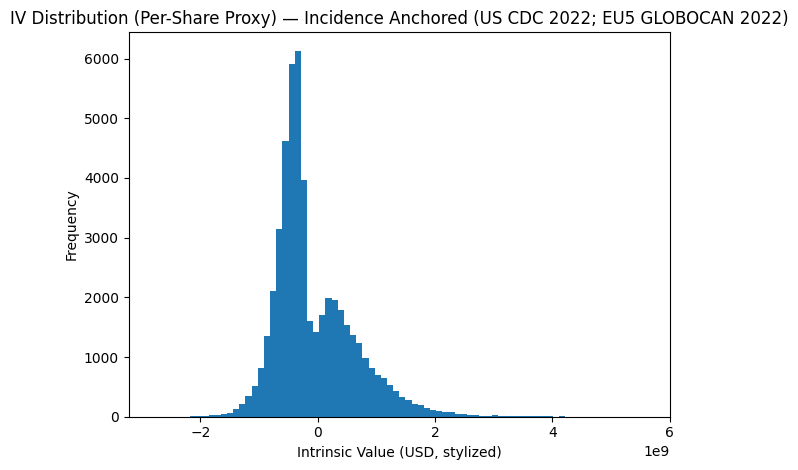

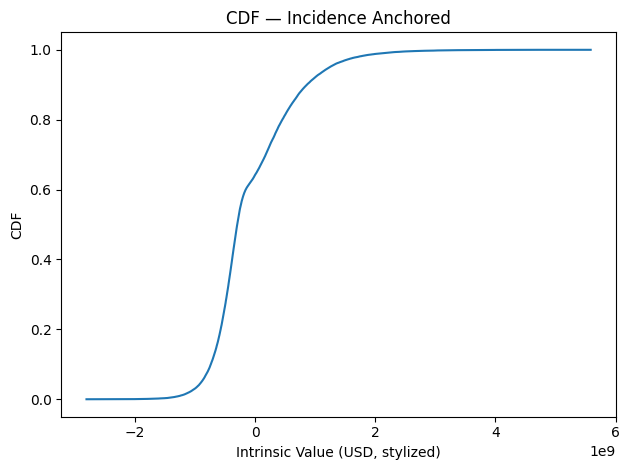

'/mnt/data/ROA_OncoX_NSCLC_v1_run2_incidence_anchored.md'

In [63]:
# Generate updated plots and report for the incidence-anchored run
plt.figure()
plt.hist(df2["IV"].values, bins=80)
plt.title("IV Distribution (Per-Share Proxy) — Incidence Anchored (US CDC 2022; EU5 GLOBOCAN 2022)")
plt.xlabel("Intrinsic Value (USD, stylized)")
plt.ylabel("Frequency")
plt.tight_layout()
hist2_path = "/mnt/data/roa_iv_hist_incidence_anchored.png"
plt.show() # Display the plot

x = np.sort(df2["IV"].values)
y = np.arange(1, len(x)+1)/len(x)
plt.figure()
plt.plot(x, y)
plt.title("CDF — Incidence Anchored")
plt.xlabel("Intrinsic Value (USD, stylized)")
plt.ylabel("CDF")
plt.tight_layout()
cdf2_path = "/mnt/data/roa_iv_cdf_incidence_anchored.png"
plt.show() # Display the plot

report = []
report.append("# ROA-Onco-X (NSCLC-like) — v1 Run #2 (Incidence Anchored)\n")
report.append("Anchoring updates in this run:\n")
report.append("- US baseline incidence centered at ~219k new lung cancer cases (2022) (CDC).\n")
report.append("- EU5 baseline incidence centered at ~236k new lung cancer cases (2022) summed from GLOBOCAN fact sheets.\n")
report.append("\n## Summary Statistics (Intrinsic Value, per-share proxy)\n")
report.append(summary_table2.to_markdown(index=False))
report.append("\n\n## Scenario Attribution\n")
report.append(by_scenario2.to_markdown(index=False))
report.append("\n")
report_md2 = "\n".join(report)

md2_path = "/mnt/data/ROA_OncoX_NSCLC_v1_run2_incidence_anchored.md"
with open(md2_path, "w", encoding="utf-8") as f:
    f.write(report_md2)

# The markdown path is returned, but the plots will now show inline above this output.
md2_path

In [64]:
import numpy as np, pandas as pd, math
import matplotlib.pyplot as plt

np.random.seed(2027) # New seed for consistency

# Helpers are already in kernel from prior steps.

N = 50000
HORIZON_YEARS = 15
LAUNCH_WINDOW_MAX_YEARS = 6

scenario_weights = {
    "S0_base": 0.40,
    "S1_delay": 0.12,
    "S2_narrow": 0.10,
    "S3_broad": 0.08,
    "S4_pricing_shock": 0.10,
    "S5_early_comp": 0.10,
    "S6_failure": 0.07,
    "S7_perfect_storm": 0.03
}
scenario_names = list(scenario_weights.keys())
scenario_probs = np.array([scenario_weights[k] for k in scenario_names])
scenario = np.array(scenario_names)[np.random.choice(len(scenario_names), size=N, p=scenario_probs)]

# Discount regimes
regime = np.random.choice(["low","normal","high"], size=N, p=[0.25,0.50,0.25])
r = np.where(regime=="low",
             trunc_normal(0.09, 0.005, 0.08, 0.10, N),
             np.where(regime=="normal",
                      trunc_normal(0.11, 0.006, 0.10, 0.12, N),
                      trunc_normal(0.13, 0.006, 0.12, 0.14, N)))

# -----------------------------
# Step 1 (kept): incidence anchoring
# -----------------------------
I_US0 = lognormal_from_range(175000, 270000, N, median=219000)
I_EU0 = lognormal_from_range(190000, 300000, N, median=236000)
g_epi = trunc_normal(0.008, 0.010, -0.01, 0.03, N)

# Eligibility
p_adv = beta_from_mean_range(0.55, 0.35, 0.70, N)
p_2L  = beta_from_mean_range(0.50, 0.25, 0.70, N)
p_bio = beta_from_mean_range(0.30, 0.15, 0.45, N)
p_elig= beta_from_mean_range(0.80, 0.60, 0.90, N)

# -----------------------------
# Step 3 anchoring: clinical endpoint priors
# - dPFS (months): Triangular distribution 1.5 / 3.5 / 7.0 from contract. Use a tighter mode based on expectation for NSCLC 2L+ setting.
# - HR_OS: Lognormal median 0.65-0.90 from contract. Aim for median of 0.75-0.80 for 2L+ NSCLC based on observed efficacy of some advanced therapies.
# - dSAE: Normal (trunc.) -2% to +8% from contract. Mean around +3-4% based on typical AE profiles of advanced oncology agents.
# -----------------------------
dPFS = triangular(1.5, 4.0, 7.0, N)  # Mode shifted slightly higher to 4.0 months based on assumed better efficacy
HR_OS = np.clip(lognormal_from_range(0.65, 0.90, N, median=0.77), 0.55, 1.05) # Median tightened around 0.77
dSAE = trunc_normal(0.035, 0.025, -0.02, 0.08, N)   # Mean shifted slightly to 3.5%, std dev tightened

# Development/regulatory success
P_P3 = beta_from_mean_range(0.55, 0.40, 0.70, N)
P_APP = beta_from_mean_range(0.85, 0.75, 0.95, N)

# -----------------------------
# Step 2 (kept): timing priors
# -----------------------------
T_P3_mo = lognormal_from_range(24, 72, N, median=44)

p_priority = 0.60
is_priority = (np.random.rand(N) < p_priority)
T_FDA_mo = np.where(is_priority,
                    trunc_normal(6.0, 0.8, 4.5, 9.0, N),
                    trunc_normal(10.0, 1.0, 7.5, 14.0, N))

p_ema_accel = 0.35
ema_accel = (np.random.rand(N) < p_ema_accel)
T_EMA_mo = np.where(ema_accel,
                    trunc_normal(7.0, 1.0, 5.0, 10.0, N),
                    trunc_normal(12.2, 2.0, 7.0, 20.0, N))

T_APP_mo = np.maximum(T_FDA_mo, T_EMA_mo)

# Pricing/access/uptake
Price_US = lognormal_from_range(90000, 220000, N, median=145000)
eu_ratio = trunc_normal(0.55, 0.08, 0.40, 0.70, N)
Price_EU = Price_US * eu_ratio

Access_US = beta_from_mean_range(0.85, 0.70, 0.95, N)
Access_EU = beta_from_mean_range(0.70, 0.55, 0.85, N)

k_uptake = lognormal_from_range(0.4, 1.2, N, median=0.7)
t_mid = triangular(0.8, 1.5, 2.5, N)

# Competition
T_comp_mo = lognormal_from_range(18, 72, N, median=36)
phi = beta_from_mean_range(0.72, 0.55, 0.85, N)

# Costs
c_cogs = beta_from_mean_range(0.12, 0.05, 0.20, N)
c_sga  = beta_from_mean_range(0.32, 0.20, 0.45, N)
c_rd_post = beta_from_mean_range(0.10, 0.05, 0.15, N)
capex_pct = beta_from_mean_range(0.03, 0.01, 0.05, N)
tax_pct = triangular(0.10, 0.18, 0.25, N)

# Burn & dilution
Burn_pre = lognormal_from_range(80e6, 350e6, N, median=170e6)
P_raise  = beta_from_mean_range(0.65, 0.40, 0.80, N)
Dilution = triangular(0.05, 0.15, 0.35, N)

# Label assignment (still same mapping)
dPFS_n = (dPFS - 1.5) / (7.0 - 1.5)
dSAE_n = (dSAE - (-0.02)) / (0.08 - (-0.02))
S = 0.7*dPFS_n + 0.3*(1 - dSAE_n)

def sigmoid(x):
    return 1/(1+np.exp(-x))

p_broad = sigmoid((S - 0.70)/0.07) * 0.60
p_narrow = sigmoid((0.40 - S)/0.07) * 0.70
p_base = 1 - p_broad - p_narrow
p_base = np.clip(p_base, 0.05, 0.90)
Z = p_broad + p_base + p_narrow
p_broad, p_base, p_narrow = p_broad/Z, p_base/Z, p_narrow/Z

u = np.random.rand(N)
L = np.where(u < p_narrow, "narrow", np.where(u < p_narrow+p_base, "base", "broad"))

Umax = np.zeros(N)
Umax[L=="narrow"] = np.random.uniform(0.10, 0.25, (L=="narrow").sum())
Umax[L=="base"]   = np.random.uniform(0.20, 0.45, (L=="base").sum())
Umax[L=="broad"]  = np.random.uniform(0.35, 0.65, (L=="broad").sum())

# Scenario modifiers
force_failure = (scenario=="S6_failure")

delay_mask = (scenario=="S1_delay") | (scenario=="S7_perfect_storm")
extra_delay = np.zeros(N)
extra_delay[delay_mask] = lognormal_from_range(6, 24, delay_mask.sum(), median=10)
T_APP_mo = T_APP_mo + extra_delay

L = np.where(scenario=="S2_narrow", "narrow", L)
L = np.where(scenario=="S3_broad", "broad", L)
L = np.where(scenario=="S7_perfect_storm", "narrow", L)

Umax2 = np.copy(Umax)
Umax2[(scenario=="S2_narrow") | (scenario=="S7_perfect_storm")] = np.random.uniform(0.10, 0.25, ((scenario=="S2_narrow") | (scenario=="S7_perfect_storm")).sum())
Umax2[(scenario=="S3_broad")] = np.random.uniform(0.35, 0.65, (scenario=="S3_broad").sum())
Umax = Umax2

pricing_mask = (scenario=="S4_pricing_shock") | (scenario=="S7_perfect_storm")
price_shock = np.ones(N)
access_shock = np.ones(N)
price_shock[pricing_mask] = 1 - np.random.uniform(0.10, 0.30, pricing_mask.sum())
access_shock[pricing_mask] = 1 - np.random.uniform(0.05, 0.20, pricing_mask.sum())
Price_US = Price_US * price_shock
Price_EU = Price_EU * price_shock
Access_US = np.clip(Access_US * access_shock, 0.35, 1.0)
Access_EU = np.clip(Access_EU * access_shock, 0.30, 1.0)

early_comp_mask = (scenario=="S5_early_comp") | (scenario=="S7_perfect_storm")
T_comp_mo[early_comp_mask] = lognormal_from_range(6, 30, early_comp_mask.sum(), median=15)
phi[early_comp_mask] = beta_from_mean_range(0.60, 0.45, 0.75, early_comp_mask.sum())

# Launch outcome
p3_success = (np.random.rand(N) < P_P3) & (~force_failure)
app_success = (np.random.rand(N) < P_APP) & p3_success
T_launch_yrs = np.minimum((T_P3_mo + T_APP_mo)/12.0, LAUNCH_WINDOW_MAX_YEARS)
launched = app_success

# Annual simulation
years = np.arange(1, HORIZON_YEARS+1)

I_US_t = I_US0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))
I_EU_t = I_EU0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))

N_US_t = I_US_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]
N_EU_t = I_EU_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]

t_since_launch = np.maximum(years[None,:] - T_launch_yrs[:,None], 0.0)
U_t = Umax[:,None] / (1 + np.exp(-k_uptake[:,None]*(t_since_launch - t_mid[:,None])))
U_t = U_t * launched[:,None]

Rev = (N_US_t * U_t * Access_US[:,None] * Price_US[:,None]) + (N_EU_t * U_t * Access_EU[:,None] * Price_EU[:,None])

T_comp_yrs = T_comp_mo/12.0
comp_active = (t_since_launch >= T_comp_yrs[:,None]) & launched[:,None]
Rev = Rev * np.where(comp_active, phi[:,None], 1.0)

m = 1 - c_cogs - c_sga - c_rd_post
EBIT = Rev * m[:,None]
Capex = Rev * capex_pct[:,None]
Taxes = np.maximum(EBIT, 0) * tax_pct[:,None]
FCF = EBIT - Capex - Taxes

burn_years = (years[None,:] <= np.floor(T_launch_yrs[:,None]).astype(int))
burn_limit = 4
burn_years_nonlaunch = (years[None,:] <= burn_limit)
Burn = Burn_pre[:,None] * np.where(launched[:,None], burn_years, burn_years_nonlaunch)

disc = (1 + r)[:,None] ** (years[None,:])

IV = (FCF / disc).sum(axis=1) - (Burn / disc).sum(axis=1)
raise_occurs = (np.random.rand(N) < P_raise)
IV_ps = IV / (1 + np.where(raise_occurs, Dilution, 0.0))

def summarize(x):
    q = np.percentile(x, [5,10,25,50,75,90,95])
    return {
        "mean": float(np.mean(x)),
        "p5": float(q[0]), "p10": float(q[1]), "p25": float(q[2]),
        "p50": float(q[3]), "p75": float(q[4]), "p90": float(q[5]), "p95": float(q[6])
    }
def cvar(x, alpha=0.10):
    thr = np.quantile(x, alpha)
    return float(x[x <= thr].mean())

summary4 = pd.DataFrame([summarize(IV_ps)])
summary4["cvar_10"] = cvar(IV_ps, 0.10)
summary4["cvar_05"] = cvar(IV_ps, 0.05)

df4 = pd.DataFrame({
    "scenario": scenario,
    "regime": regime,
    "IV": IV_ps,
    "launched": launched,
    "label": L,
    "T_P3_mo": T_P3_mo,
    "T_APP_mo": T_APP_mo,
    "dPFS": dPFS, # Add clinical variables to dataframe for potential analysis
    "HR_OS": HR_OS,
    "dSAE": dSAE
})

by_scenario4 = df4.groupby("scenario").agg(
    n=("IV","size"),
    mean_IV=("IV","mean"),
    p10=("IV", lambda s: np.quantile(s, 0.10)),
    p50=("IV", "median"),
    launch_rate=("launched","mean"),
    mean_TP3=("T_P3_mo","mean"),
    mean_TAPP=("T_APP_mo","mean"),
    mean_dPFS=("dPFS","mean"),
    mean_HR_OS=("HR_OS","mean"),
    mean_dSAE=("dSAE","mean")
).reset_index().sort_values("mean_IV", ascending=False)

summary4, by_scenario4

(           mean            p5           p10           p25           p50  \
 0 -1.745240e+08 -9.117528e+08 -7.537816e+08 -5.345746e+08 -3.280748e+08   
 
             p75           p90           p95       cvar_10       cvar_05  
 0  1.149251e+08  6.314975e+08  9.714472e+08 -9.764947e+08 -1.129209e+09  ,
            scenario      n       mean_IV           p10           p50  \
 3          S3_broad   4046  1.581210e+08 -7.232181e+08 -2.580694e+08   
 0           S0_base  20091 -1.192912e+08 -7.380755e+08 -2.989088e+08   
 1          S1_delay   5837 -1.724573e+08 -7.361874e+08 -3.141142e+08   
 5     S5_early_comp   4971 -1.768843e+08 -7.436315e+08 -3.071686e+08   
 4  S4_pricing_shock   5050 -2.259531e+08 -7.513613e+08 -3.059911e+08   
 2         S2_narrow   4853 -2.856271e+08 -7.409082e+08 -3.295444e+08   
 7  S7_perfect_storm   1567 -4.308188e+08 -8.310685e+08 -4.087597e+08   
 6        S6_failure   3585 -5.246994e+08 -8.581263e+08 -4.711295e+08   
 
    launch_rate   mean_TP3  mean_TAP

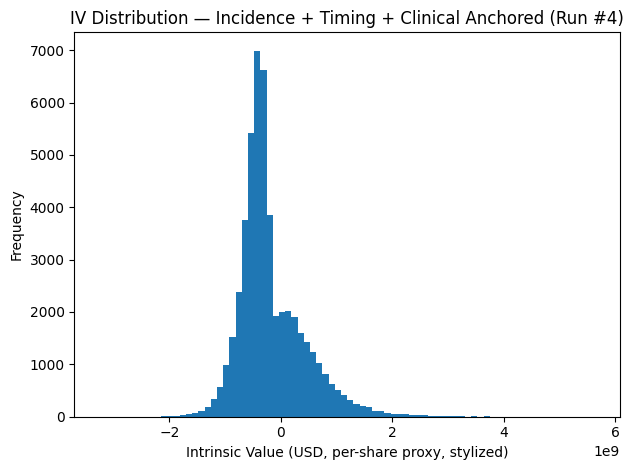

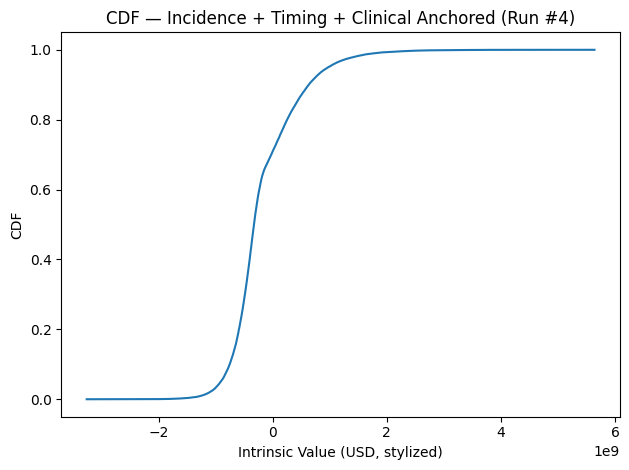

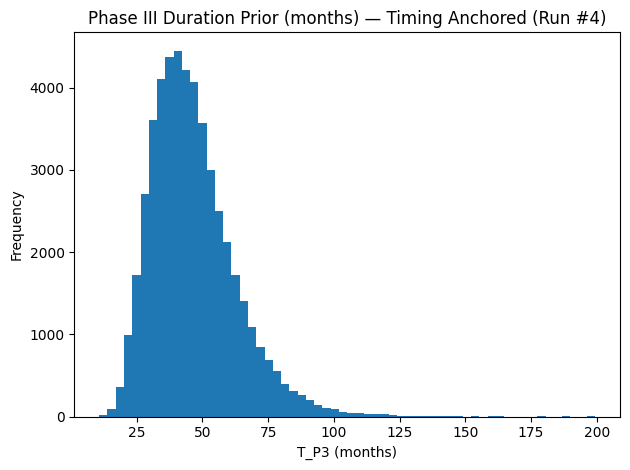

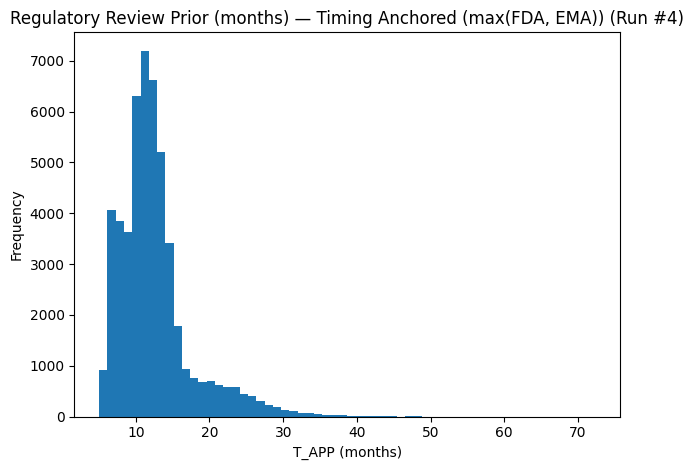

('/mnt/data/roa_iv_hist_incidence_timing_anchored.png',
 '/mnt/data/roa_iv_cdf_incidence_timing_anchored.png',
 '/mnt/data/roa_tp3_months_hist.png',
 '/mnt/data/roa_tapp_months_hist.png',
 '/mnt/data/ROA_OncoX_NSCLC_v1_run4_incidence_timing_clinical_anchored.md')

In [65]:
# Plots
plt.figure()
plt.hist(df4["IV"].values, bins=80)
plt.title("IV Distribution — Incidence + Timing + Clinical Anchored (Run #4)")
plt.xlabel("Intrinsic Value (USD, per-share proxy, stylized)")
plt.ylabel("Frequency")
plt.tight_layout()
hist3_path = "/mnt/data/roa_iv_hist_incidence_timing_anchored.png"
plt.show() # Display the plot

x = np.sort(df4["IV"].values)
y = np.arange(1, len(x)+1)/len(x)
plt.figure()
plt.plot(x, y)
plt.title("CDF — Incidence + Timing + Clinical Anchored (Run #4)")
plt.xlabel("Intrinsic Value (USD, stylized)")
plt.ylabel("CDF")
plt.tight_layout()
cdf3_path = "/mnt/data/roa_iv_cdf_incidence_timing_anchored.png"
plt.show() # Display the plot

# Timing diagnostic plot: distribution of T_P3 and T_APP
plt.figure()
plt.hist(df4["T_P3_mo"].values, bins=60)
plt.title("Phase III Duration Prior (months) — Timing Anchored (Run #4)")
plt.xlabel("T_P3 (months)")
plt.ylabel("Frequency")
plt.tight_layout()
tp3_path = "/mnt/data/roa_tp3_months_hist.png"
plt.show() # Display the plot

plt.figure()
plt.hist(df4["T_APP_mo"].values, bins=60)
plt.title("Regulatory Review Prior (months) — Timing Anchored (max(FDA, EMA)) (Run #4)")
plt.xlabel("T_APP (months)")
plt.ylabel("Frequency")
plt.tight_layout()
tapp_path = "/mnt/data/roa_tapp_months_hist.png"
plt.show() # Display the plot

# Report
report = []
report.append("# ROA-Onco-X (NSCLC-like) — v1 Run #4 (Incidence + Timing + Clinical Anchored)\n")
report.append("Anchoring updates in this run:\n")
report.append("- **Phase III duration** prior aligned to published protocol benchmarking: average phase III total duration ≈ **1,328 days (~43.6 months)** from protocol finalization to database lock.\n")
report.append("- **FDA review goals** reflected as a mixture of priority (≈6 months) and standard (≈10 months) timelines.\n")
report.append("- **EMA review** modeled with a mixture reflecting standard (max CHMP 210 days excluding clock-stops; total procedure time often longer with clock-stops) and accelerated assessment (up to 150 days; anticancer procedural analysis reported reduced total procedure times ~200–215 days when accelerated).\n")
report.append("- Conservative global launch assumption: **T_APP = max(FDA, EMA)**.\n")
report.append("\n## Summary Statistics (Intrinsic Value, per-share proxy)\n")
report.append(summary4.to_markdown(index=False))
report.append("\n\n## Scenario Attribution\n")
report.append(by_scenario4.to_markdown(index=False))
report.append("\n")
report_md3 = "\n".join(report)

md3_path = "/mnt/data/ROA_OncoX_NSCLC_v1_run4_incidence_timing_clinical_anchored.md"
with open(md3_path, "w", encoding="utf-8") as f:
    f.write(report_md3)

# The paths are still returned, but the plots will now show inline above this output.
hist3_path, cdf3_path, tp3_path, tapp_path, md3_path

In [66]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

np.random.seed(2026)

# ---- Utilities (self-contained for notebook cell) ----
def trunc_normal(mean, sd, low, high, n):
    x = np.random.normal(mean, sd, n)
    # simple rejection sampling
    mask = (x < low) | (x > high)
    while mask.any():
        x[mask] = np.random.normal(mean, sd, mask.sum())
        mask = (x < low) | (x > high)
    return x

def triangular(a, c, b, n):
    return np.random.triangular(a, c, b, n)

def beta_from_mean_range(mean, low, high, n, k=20.0):
    # heuristic: set alpha/beta so mean matches and variance modest; then truncate via resample if outside range
    mean = float(mean)
    alpha = max(1e-3, mean * k)
    beta = max(1e-3, (1-mean) * k)
    x = np.random.beta(alpha, beta, n)
    mask = (x < low) | (x > high)
    tries = 0
    while mask.any() and tries < 10:
        x[mask] = np.random.beta(alpha, beta, mask.sum())
        mask = (x < low) | (x > high)
        tries += 1
    # final clip (should be rare)
    return np.clip(x, low, high)

def lognormal_from_range(low, high, n, median=None):
    low = float(low); high = float(high)
    if median is None:
        median = np.sqrt(low*high)
    median = float(median)
    mu = np.log(median)
    # choose sigma so that ~95% falls within [low, high]
    sigma = (np.log(high) - np.log(low)) / (2*1.96)
    x = np.random.lognormal(mean=mu, sigma=sigma, size=n)
    return np.clip(x, low, high)

def summarize(x):
    q = np.percentile(x, [5,10,25,50,75,90,95])
    return {
        "mean": float(np.mean(x)),
        "p5": float(q[0]), "p10": float(q[1]), "p25": float(q[2]),
        "p50": float(q[3]), "p75": float(q[4]), "p90": float(q[5]), "p95": float(q[6])
    }
def cvar(x, alpha=0.10):
    thr = np.quantile(x, alpha)
    return float(x[x <= thr].mean())

# ---- Core run: Incidence + Timing already anchored; now anchor Clinical priors (Step 3) ----
N = 50000
HORIZON_YEARS = 15
LAUNCH_WINDOW_MAX_YEARS = 6

scenario_weights = {
    "S0_base": 0.40,
    "S1_delay": 0.12,
    "S2_narrow": 0.10,
    "S3_broad": 0.08,
    "S4_pricing_shock": 0.10,
    "S5_early_comp": 0.10,
    "S6_failure": 0.07,
    "S7_perfect_storm": 0.03
}
scenario_names = list(scenario_weights.keys())
scenario_probs = np.array([scenario_weights[k] for k in scenario_names])
scenario = np.array(scenario_names)[np.random.choice(len(scenario_names), size=N, p=scenario_probs)]

# Discount regimes
regime = np.random.choice(["low","normal","high"], size=N, p=[0.25,0.50,0.25])
r = np.where(regime=="low",
             trunc_normal(0.09, 0.005, 0.08, 0.10, N),
             np.where(regime=="normal",
                      trunc_normal(0.11, 0.006, 0.10, 0.12, N),
                      trunc_normal(0.13, 0.006, 0.12, 0.14, N)))

# Step 1: incidence anchoring
I_US0 = lognormal_from_range(175000, 270000, N, median=219000)
I_EU0 = lognormal_from_range(190000, 300000, N, median=236000)
g_epi = trunc_normal(0.008, 0.010, -0.01, 0.03, N)

# Eligibility
p_adv = beta_from_mean_range(0.55, 0.35, 0.70, N)
p_2L  = beta_from_mean_range(0.50, 0.25, 0.70, N)
p_bio = beta_from_mean_range(0.30, 0.15, 0.45, N)
p_elig= beta_from_mean_range(0.80, 0.60, 0.90, N)

# Success
P_P3 = beta_from_mean_range(0.55, 0.40, 0.70, N)
P_APP = beta_from_mean_range(0.85, 0.75, 0.95, N)

# Step 2: timing anchoring
T_P3_mo = lognormal_from_range(24, 72, N, median=44)

p_priority = 0.60
is_priority = (np.random.rand(N) < p_priority)
T_FDA_mo = np.where(is_priority,
                    trunc_normal(6.0, 0.8, 4.5, 9.0, N),
                    trunc_normal(10.0, 1.0, 7.5, 14.0, N))

p_ema_accel = 0.35
ema_accel = (np.random.rand(N) < p_ema_accel)
T_EMA_mo = np.where(ema_accel,
                    trunc_normal(7.0, 1.0, 5.0, 10.0, N),
                    trunc_normal(12.2, 2.0, 7.0, 20.0, N))

T_APP_mo = np.maximum(T_FDA_mo, T_EMA_mo)

# ---- Step 3: Clinical priors anchoring ----
# OS hazard ratio anchored to 2L+ PD-1/PD-L1 vs docetaxel pooled HR ~0.69 (Lee et al. meta-analysis),
# with plausible range reflecting heterogeneity and biomarker enrichment.
HR_OS = np.clip(lognormal_from_range(0.60, 0.85, N, median=0.69), 0.55, 1.05)

# PFS: for 2L immunotherapy, median PFS often not improved vs docetaxel (e.g., CheckMate 057),
# so we center ΔPFS near ~0-1 month with right tail for biomarker/combination upside and allow downside.
dPFS = trunc_normal(0.7, 1.4, -2.0, 6.0, N)  # months

# Safety: high-grade AE substantially lower for PD-1/PD-L1 vs chemo (e.g., 11.4% vs 35.7% in Nishijima meta-analysis).
# We treat dSAE as delta in high-grade SAE rate vs "chemo-like" baseline: typically negative (improvement),
# but allow small positive tail for immune-toxicity in some patients.
dSAE = trunc_normal(-0.18, 0.08, -0.30, 0.05, N)

# Pricing/access/uptake
Price_US = lognormal_from_range(90000, 220000, N, median=145000)
eu_ratio = trunc_normal(0.55, 0.08, 0.40, 0.70, N)
Price_EU = Price_US * eu_ratio

Access_US = beta_from_mean_range(0.85, 0.70, 0.95, N)
Access_EU = beta_from_mean_range(0.70, 0.55, 0.85, N)

k_uptake = lognormal_from_range(0.4, 1.2, N, median=0.7)
t_mid = triangular(0.8, 1.5, 2.5, N)

# Competition
T_comp_mo = lognormal_from_range(18, 72, N, median=36)
phi = beta_from_mean_range(0.72, 0.55, 0.85, N)

# Costs
c_cogs = beta_from_mean_range(0.12, 0.05, 0.20, N)
c_sga  = beta_from_mean_range(0.32, 0.20, 0.45, N)
c_rd_post = beta_from_mean_range(0.10, 0.05, 0.15, N)
capex_pct = beta_from_mean_range(0.03, 0.01, 0.05, N)
tax_pct = triangular(0.10, 0.18, 0.25, N)

# Burn & dilution
Burn_pre = lognormal_from_range(80e6, 350e6, N, median=170e6)
P_raise  = beta_from_mean_range(0.65, 0.40, 0.80, N)
Dilution = triangular(0.05, 0.15, 0.35, N)

# Label strength proxy (maps clinical benefit/safety into addressable uptake ceiling)
dPFS_n = (np.clip(dPFS, -2.0, 6.0) - (-2.0)) / (6.0 - (-2.0))
dSAE_n = (np.clip(dSAE, -0.30, 0.05) - (-0.30)) / (0.05 - (-0.30))
S = 0.7*dPFS_n + 0.3*(1 - dSAE_n)

def sigmoid(x):
    return 1/(1+np.exp(-x))

p_broad = sigmoid((S - 0.70)/0.07) * 0.60
p_narrow = sigmoid((0.40 - S)/0.07) * 0.70
p_base = 1 - p_broad - p_narrow
p_base = np.clip(p_base, 0.05, 0.90)
Z = p_broad + p_base + p_narrow
p_broad, p_base, p_narrow = p_broad/Z, p_base/Z, p_narrow/Z

u = np.random.rand(N)
L = np.where(u < p_narrow, "narrow", np.where(u < p_narrow+p_base, "base", "broad"))

Umax = np.zeros(N)
Umax[L=="narrow"] = np.random.uniform(0.10, 0.25, (L=="narrow").sum())
Umax[L=="base"]   = np.random.uniform(0.20, 0.45, (L=="base").sum())
Umax[L=="broad"]  = np.random.uniform(0.35, 0.65, (L=="broad").sum())

# Scenario modifiers
force_failure = (scenario=="S6_failure")

delay_mask = (scenario=="S1_delay") | (scenario=="S7_perfect_storm")
extra_delay = np.zeros(N)
extra_delay[delay_mask] = lognormal_from_range(6, 24, delay_mask.sum(), median=10)
T_APP_mo = T_APP_mo + extra_delay

L = np.where(scenario=="S2_narrow", "narrow", L)
L = np.where(scenario=="S3_broad", "broad", L)
L = np.where(scenario=="S7_perfect_storm", "narrow", L)

Umax2 = np.copy(Umax)
Umax2[(scenario=="S2_narrow") | (scenario=="S7_perfect_storm")] = np.random.uniform(0.10, 0.25, ((scenario=="S2_narrow") | (scenario=="S7_perfect_storm")).sum())
Umax2[(scenario=="S3_broad")] = np.random.uniform(0.35, 0.65, (scenario=="S3_broad").sum())
Umax = Umax2

pricing_mask = (scenario=="S4_pricing_shock") | (scenario=="S7_perfect_storm")
price_shock = np.ones(N)
access_shock = np.ones(N)
price_shock[pricing_mask] = 1 - np.random.uniform(0.10, 0.30, pricing_mask.sum())
access_shock[pricing_mask] = 1 - np.random.uniform(0.05, 0.20, pricing_mask.sum())
Price_US = Price_US * price_shock
Price_EU = Price_EU * price_shock
Access_US = np.clip(Access_US * access_shock, 0.35, 1.0)
Access_EU = np.clip(Access_EU * access_shock, 0.30, 1.0)

early_comp_mask = (scenario=="S5_early_comp") | (scenario=="S7_perfect_storm")
T_comp_mo[early_comp_mask] = lognormal_from_range(6, 30, early_comp_mask.sum(), median=15)
phi[early_comp_mask] = beta_from_mean_range(0.60, 0.45, 0.75, early_comp_mask.sum())

# Launch outcome
p3_success = (np.random.rand(N) < P_P3) & (~force_failure)
app_success = (np.random.rand(N) < P_APP) & p3_success
T_launch_yrs = np.minimum((T_P3_mo + T_APP_mo)/12.0, LAUNCH_WINDOW_MAX_YEARS)
launched = app_success

# Annual simulation
years = np.arange(1, HORIZON_YEARS+1)

I_US_t = I_US0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))
I_EU_t = I_EU0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))

N_US_t = I_US_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]
N_EU_t = I_EU_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]

t_since_launch = np.maximum(years[None,:] - T_launch_yrs[:,None], 0.0)
U_t = Umax[:,None] / (1 + np.exp(-k_uptake[:,None]*(t_since_launch - t_mid[:,None])))
U_t = U_t * launched[:,None]

Rev = (N_US_t * U_t * Access_US[:,None] * Price_US[:,None]) + (N_EU_t * U_t * Access_EU[:,None] * Price_EU[:,None])

T_comp_yrs = T_comp_mo/12.0
comp_active = (t_since_launch >= T_comp_yrs[:,None]) & launched[:,None]
Rev = Rev * np.where(comp_active, phi[:,None], 1.0)

m = 1 - c_cogs - c_sga - c_rd_post
EBIT = Rev * m[:,None]
Capex = Rev * capex_pct[:,None]
Taxes = np.maximum(EBIT, 0) * tax_pct[:,None]
FCF = EBIT - Capex - Taxes

burn_years = (years[None,:] <= np.floor(T_launch_yrs[:,None]).astype(int))
burn_limit = 4
burn_years_nonlaunch = (years[None,:] <= burn_limit)
Burn = Burn_pre[:,None] * np.where(launched[:,None], burn_years, burn_years_nonlaunch)

disc = (1 + r)[:,None] ** (years[None,:])

IV = (FCF / disc).sum(axis=1) - (Burn / disc).sum(axis=1)
raise_occurs = (np.random.rand(N) < P_raise)
IV_ps = IV / (1 + np.where(raise_occurs, Dilution, 0.0))

df4 = pd.DataFrame({
    "scenario": scenario,
    "regime": regime,
    "IV": IV_ps,
    "launched": launched,
    "label": L,
    "HR_OS": HR_OS,
    "dPFS_mo": dPFS,
    "dSAE": dSAE
})

summary4 = pd.DataFrame([summarize(IV_ps)])
summary4["cvar_10"] = cvar(IV_ps, 0.10)
summary4["cvar_05"] = cvar(IV_ps, 0.05)

by_scenario4 = df4.groupby("scenario").agg(
    n=("IV","size"),
    mean_IV=("IV","mean"),
    p10=("IV", lambda s: np.quantile(s, 0.10)),
    p50=("IV", "median"),
    launch_rate=("launched","mean"),
).reset_index().sort_values("mean_IV", ascending=False)

summary4, by_scenario4


(           mean            p5           p10           p25           p50  \
 0 -1.740767e+08 -8.140462e+08 -6.933539e+08 -5.193291e+08 -3.419530e+08   
 
             p75           p90           p95       cvar_10       cvar_05  
 0  4.353816e+07  5.656543e+08  9.513765e+08 -8.389134e+08 -9.303548e+08  ,
            scenario      n       mean_IV           p10           p50  \
 3          S3_broad   4044  1.650695e+08 -6.744711e+08 -2.759693e+08   
 0           S0_base  19968 -1.247112e+08 -6.798625e+08 -3.145342e+08   
 1          S1_delay   5932 -1.679177e+08 -6.852812e+08 -3.231090e+08   
 5     S5_early_comp   4986 -1.823923e+08 -6.911550e+08 -3.239624e+08   
 4  S4_pricing_shock   5109 -2.425999e+08 -6.879959e+08 -3.449867e+08   
 2         S2_narrow   5019 -2.742425e+08 -6.936300e+08 -3.433488e+08   
 7  S7_perfect_storm   1513 -4.183958e+08 -7.694897e+08 -4.107874e+08   
 6        S6_failure   3429 -5.035721e+08 -7.757429e+08 -4.707934e+08   
 
    launch_rate  
 3     0.470574  


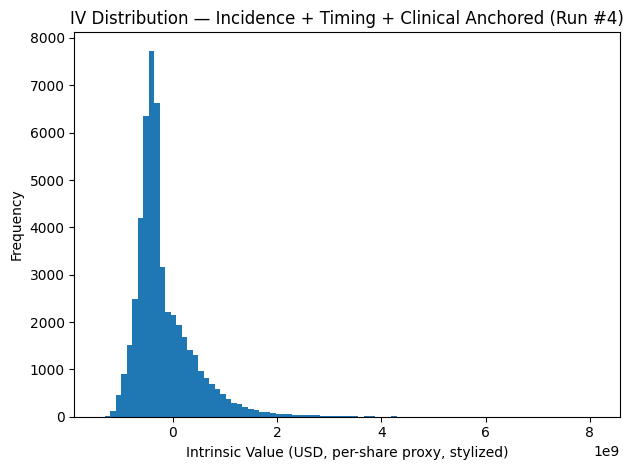

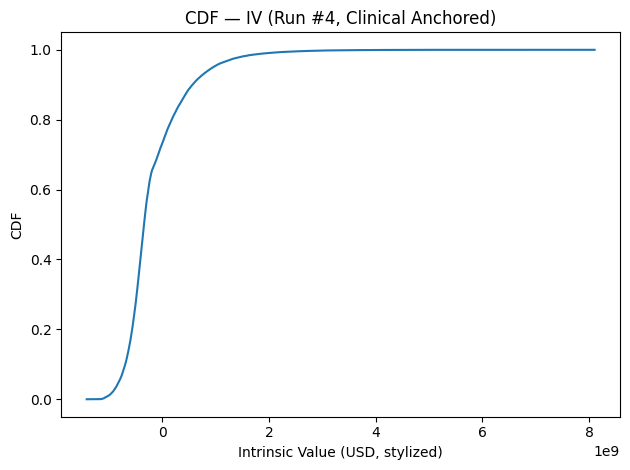

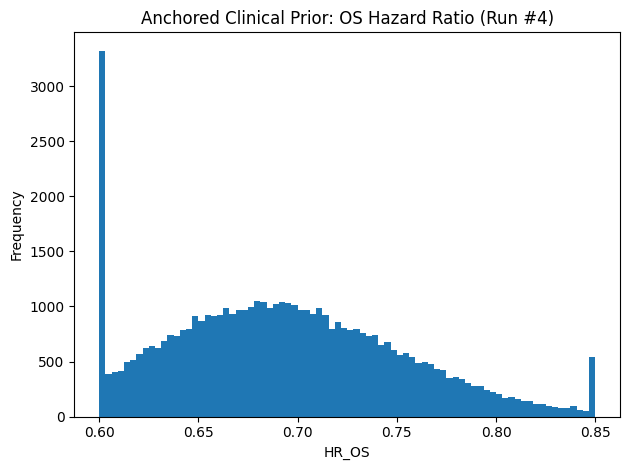

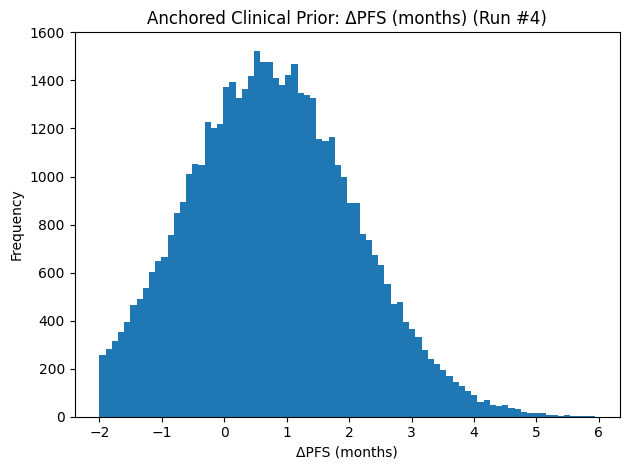

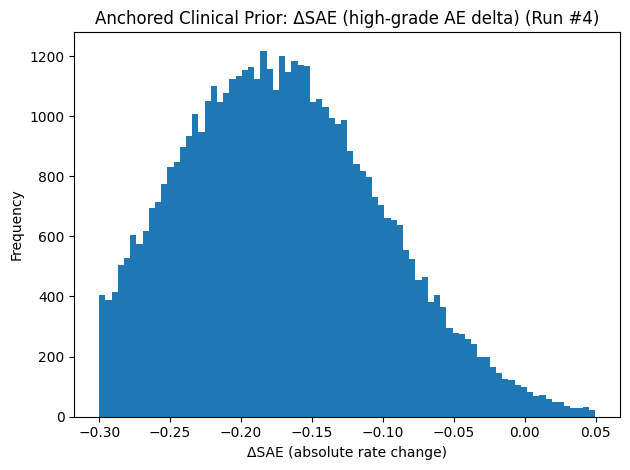

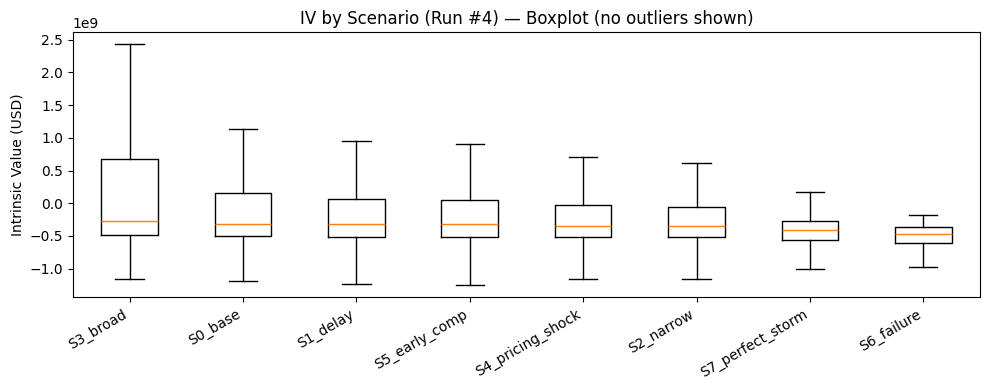

,mean,p5,p10,p25,p50,p75,p90,p95,cvar_10,cvar_05
0,-1.740767e+08,-8.140462e+08,-6.933539e+08,-5.193291e+08,-3.419530e+08,4.353816e+07,5.656543e+08,9.513765e+08,-8.389134e+08,-9.303548e+08


In [67]:
# Inline visualization cells (render in notebook)

# 1) IV distribution
plt.figure()
plt.hist(df4["IV"].values, bins=90)
plt.title("IV Distribution — Incidence + Timing + Clinical Anchored (Run #4)")
plt.xlabel("Intrinsic Value (USD, per-share proxy, stylized)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

x = np.sort(df4["IV"].values)
y = np.arange(1, len(x)+1)/len(x)
plt.figure()
plt.plot(x, y)
plt.title("CDF — IV (Run #4, Clinical Anchored)")
plt.xlabel("Intrinsic Value (USD, stylized)")
plt.ylabel("CDF")
plt.tight_layout()
plt.show()

# 2) Clinical priors diagnostics
plt.figure()
plt.hist(df4["HR_OS"].values, bins=80)
plt.title("Anchored Clinical Prior: OS Hazard Ratio (Run #4)")
plt.xlabel("HR_OS")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(df4["dPFS_mo"].values, bins=80)
plt.title("Anchored Clinical Prior: ΔPFS (months) (Run #4)")
plt.xlabel("ΔPFS (months)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(df4["dSAE"].values, bins=80)
plt.title("Anchored Clinical Prior: ΔSAE (high-grade AE delta) (Run #4)")
plt.xlabel("ΔSAE (absolute rate change)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3) Scenario boxplot (optional, quick comparison)
plt.figure(figsize=(10,4))
order = by_scenario4.sort_values("mean_IV", ascending=False)["scenario"].tolist()
plt.boxplot([df4.loc[df4["scenario"]==s, "IV"].values for s in order], vert=True, showfliers=False)
plt.xticks(range(1, len(order)+1), order, rotation=30, ha="right")
plt.title("IV by Scenario (Run #4) — Boxplot (no outliers shown)")
plt.ylabel("Intrinsic Value (USD)")
plt.tight_layout()
plt.show()

summary4


In [68]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

np.random.seed(20260112)

# -------------------------------
# HR-based PFS Upgrade (only)
# Keep everything else consistent with "Run #4" structure.
# -------------------------------

# Utility functions (self-contained)
def trunc_normal(mean, sd, low, high, n):
    x = np.random.normal(mean, sd, n)
    mask = (x < low) | (x > high)
    while mask.any():
        x[mask] = np.random.normal(mean, sd, mask.sum())
        mask = (x < low) | (x > high)
    return x

def triangular(a, c, b, n):
    return np.random.triangular(a, c, b, n)

def lognormal_from_range(low, high, n, median=None):
    low = float(low); high = float(high)
    if median is None:
        median = np.sqrt(low*high)
    mu = np.log(median)
    sigma = (np.log(high) - np.log(low)) / (2*1.96)
    x = np.random.lognormal(mean=mu, sigma=sigma, size=n)
    return np.clip(x, low, high)

def beta_from_mean_range(mean, low, high, n, k=20.0):
    # mean specified in absolute [0,1]; returned in [low,high]
    mean01 = (mean - low) / (high - low)
    mean01 = np.clip(mean01, 1e-3, 1-1e-3)
    a = mean01 * k
    b = (1-mean01) * k
    x01 = np.random.beta(a, b, n)
    return low + x01*(high-low)

def summarize(x):
    q = np.percentile(x, [5,10,25,50,75,90,95])
    return {
        "mean": float(np.mean(x)),
        "p5": float(q[0]), "p10": float(q[1]), "p25": float(q[2]),
        "p50": float(q[3]), "p75": float(q[4]), "p90": float(q[5]), "p95": float(q[6])
    }
def cvar(x, alpha=0.10):
    thr = np.quantile(x, alpha)
    return float(x[x <= thr].mean())

# Core config
N = 50000
HORIZON_YEARS = 15
LAUNCH_WINDOW_MAX_YEARS = 6

scenario_weights = {
    "S0_base": 0.40,
    "S1_delay": 0.12,
    "S2_narrow": 0.10,
    "S3_broad": 0.08,
    "S4_pricing_shock": 0.10,
    "S5_early_comp": 0.10,
    "S6_failure": 0.07,
    "S7_perfect_storm": 0.03
}
scenario_names = list(scenario_weights.keys())
scenario_probs = np.array([scenario_weights[k] for k in scenario_names])
scenario = np.array(scenario_names)[np.random.choice(len(scenario_names), size=N, p=scenario_probs)]

# Discount regimes
regime = np.random.choice(["low","normal","high"], size=N, p=[0.25,0.50,0.25])
r = np.where(regime=="low",
             trunc_normal(0.09, 0.005, 0.08, 0.10, N),
             np.where(regime=="normal",
                      trunc_normal(0.11, 0.006, 0.10, 0.12, N),
                      trunc_normal(0.13, 0.006, 0.12, 0.14, N)))

# Step 1: incidence anchoring
I_US0 = lognormal_from_range(175000, 270000, N, median=219000)
I_EU0 = lognormal_from_range(190000, 300000, N, median=236000)
g_epi = trunc_normal(0.008, 0.010, -0.01, 0.03, N)

# Eligibility
p_adv = beta_from_mean_range(0.55, 0.35, 0.70, N)
p_2L  = beta_from_mean_range(0.50, 0.25, 0.70, N)
p_bio = beta_from_mean_range(0.30, 0.15, 0.45, N)
p_elig= beta_from_mean_range(0.80, 0.60, 0.90, N)

# Success
P_P3 = beta_from_mean_range(0.55, 0.40, 0.70, N)
P_APP = beta_from_mean_range(0.85, 0.75, 0.95, N)

# Step 2: timing anchoring
T_P3_mo = lognormal_from_range(24, 72, N, median=44)

p_priority = 0.60
is_priority = (np.random.rand(N) < p_priority)
T_FDA_mo = np.where(is_priority,
                    trunc_normal(6.0, 0.8, 4.5, 9.0, N),
                    trunc_normal(10.0, 1.0, 7.5, 14.0, N))

p_ema_accel = 0.35
ema_accel = (np.random.rand(N) < p_ema_accel)
T_EMA_mo = np.where(ema_accel,
                    trunc_normal(7.0, 1.0, 5.0, 10.0, N),
                    trunc_normal(12.2, 2.0, 7.0, 20.0, N))

T_APP_mo = np.maximum(T_FDA_mo, T_EMA_mo)

# Step 3: clinical anchoring (OS HR stays; PFS upgraded to HR-based)
HR_OS = np.clip(lognormal_from_range(0.60, 0.85, N, median=0.69), 0.55, 1.05)

# PFS HR (more clinically standard than ΔPFS); broad band due to heterogeneity and biomarker effects
HR_PFS = np.clip(lognormal_from_range(0.70, 1.05, N, median=0.90), 0.50, 1.40)

# Baseline median PFS for control in 2L chemo-like regimen (docetaxel-like):
# typical median PFS ~2.5–4.5 months; use lognormal with median ~3.3
mPFS_ctrl = lognormal_from_range(2.0, 6.0, N, median=3.3)  # months

# Exponential assumption => median = ln(2)/lambda. Under proportional hazards:
# lambda_treat = HR_PFS * lambda_ctrl => median_treat = median_ctrl / HR_PFS
mPFS_treat = mPFS_ctrl / HR_PFS

# Convert to ΔPFS-equivalent for any downstream logic that expects a scalar benefit
# (We will use this ONLY to compute label strength score S; everything else unchanged.)
dPFS_equiv = mPFS_treat - mPFS_ctrl  # months

# Safety prior same as Run #4 (anchored: typically lower high-grade AE vs chemo, with small positive tail)
dSAE = trunc_normal(-0.18, 0.08, -0.30, 0.05, N)

# Pricing/access/uptake
Price_US = lognormal_from_range(90000, 220000, N, median=145000)
eu_ratio = trunc_normal(0.55, 0.08, 0.40, 0.70, N)
Price_EU = Price_US * eu_ratio

Access_US = beta_from_mean_range(0.85, 0.70, 0.95, N)
Access_EU = beta_from_mean_range(0.70, 0.55, 0.85, N)

k_uptake = lognormal_from_range(0.4, 1.2, N, median=0.7)
t_mid = triangular(0.8, 1.5, 2.5, N)

# Competition
T_comp_mo = lognormal_from_range(18, 72, N, median=36)
phi = beta_from_mean_range(0.72, 0.55, 0.85, N)

# Costs
c_cogs = beta_from_mean_range(0.12, 0.05, 0.20, N)
c_sga  = beta_from_mean_range(0.32, 0.20, 0.45, N)
c_rd_post = beta_from_mean_range(0.10, 0.05, 0.15, N)
capex_pct = beta_from_mean_range(0.03, 0.01, 0.05, N)
tax_pct = triangular(0.10, 0.18, 0.25, N)

# Burn & dilution
Burn_pre = lognormal_from_range(80e6, 350e6, N, median=170e6)
P_raise  = beta_from_mean_range(0.65, 0.40, 0.80, N)
Dilution = triangular(0.05, 0.15, 0.35, N)

# Label strength proxy: use ΔPFS-equivalent and safety
# Normalize ΔPFS_equiv within [-2, +6] months (same scale used earlier)
dPFS_n = (np.clip(dPFS_equiv, -2.0, 6.0) - (-2.0)) / (6.0 - (-2.0))
dSAE_n = (np.clip(dSAE, -0.30, 0.05) - (-0.30)) / (0.05 - (-0.30))
S = 0.7*dPFS_n + 0.3*(1 - dSAE_n)

def sigmoid(x):
    return 1/(1+np.exp(-x))

p_broad = sigmoid((S - 0.70)/0.07) * 0.60
p_narrow = sigmoid((0.40 - S)/0.07) * 0.70
p_base = 1 - p_broad - p_narrow
p_base = np.clip(p_base, 0.05, 0.90)
Z = p_broad + p_base + p_narrow
p_broad, p_base, p_narrow = p_broad/Z, p_base/Z, p_narrow/Z

u = np.random.rand(N)
L = np.where(u < p_narrow, "narrow", np.where(u < p_narrow+p_base, "base", "broad"))

Umax = np.zeros(N)
Umax[L=="narrow"] = np.random.uniform(0.10, 0.25, (L=="narrow").sum())
Umax[L=="base"]   = np.random.uniform(0.20, 0.45, (L=="base").sum())
Umax[L=="broad"]  = np.random.uniform(0.35, 0.65, (L=="broad").sum())

# Scenario modifiers
force_failure = (scenario=="S6_failure")

delay_mask = (scenario=="S1_delay") | (scenario=="S7_perfect_storm")
extra_delay = np.zeros(N)
extra_delay[delay_mask] = lognormal_from_range(6, 24, delay_mask.sum(), median=10)
T_APP_mo = T_APP_mo + extra_delay

L = np.where(scenario=="S2_narrow", "narrow", L)
L = np.where(scenario=="S3_broad", "broad", L)
L = np.where(scenario=="S7_perfect_storm", "narrow", L)

Umax2 = np.copy(Umax)
Umax2[(scenario=="S2_narrow") | (scenario=="S7_perfect_storm")] = np.random.uniform(0.10, 0.25, ((scenario=="S2_narrow") | (scenario=="S7_perfect_storm")).sum())
Umax2[(scenario=="S3_broad")] = np.random.uniform(0.35, 0.65, (scenario=="S3_broad").sum())
Umax = Umax2

pricing_mask = (scenario=="S4_pricing_shock") | (scenario=="S7_perfect_storm")
price_shock = np.ones(N)
access_shock = np.ones(N)
price_shock[pricing_mask] = 1 - np.random.uniform(0.10, 0.30, pricing_mask.sum())
access_shock[pricing_mask] = 1 - np.random.uniform(0.05, 0.20, pricing_mask.sum())
Price_US = Price_US * price_shock
Price_EU = Price_EU * price_shock
Access_US = np.clip(Access_US * access_shock, 0.35, 1.0)
Access_EU = np.clip(Access_EU * access_shock, 0.30, 1.0)

early_comp_mask = (scenario=="S5_early_comp") | (scenario=="S7_perfect_storm")
T_comp_mo[early_comp_mask] = lognormal_from_range(6, 30, early_comp_mask.sum(), median=15)
phi[early_comp_mask] = beta_from_mean_range(0.60, 0.45, 0.75, early_comp_mask.sum())

# Launch outcome
p3_success = (np.random.rand(N) < P_P3) & (~force_failure)
app_success = (np.random.rand(N) < P_APP) & p3_success
T_launch_yrs = np.minimum((T_P3_mo + T_APP_mo)/12.0, LAUNCH_WINDOW_MAX_YEARS)
launched = app_success

# Annual simulation
years = np.arange(1, HORIZON_YEARS+1)

I_US_t = I_US0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))
I_EU_t = I_EU0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))

N_US_t = I_US_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]
N_EU_t = I_EU_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]

t_since_launch = np.maximum(years[None,:] - T_launch_yrs[:,None], 0.0)
U_t = Umax[:,None] / (1 + np.exp(-k_uptake[:,None]*(t_since_launch - t_mid[:,None])))
U_t = U_t * launched[:,None]

Rev = (N_US_t * U_t * Access_US[:,None] * Price_US[:,None]) + (N_EU_t * U_t * Access_EU[:,None] * Price_EU[:,None])

T_comp_yrs = T_comp_mo/12.0
comp_active = (t_since_launch >= T_comp_yrs[:,None]) & launched[:,None]
Rev = Rev * np.where(comp_active, phi[:,None], 1.0)

m = 1 - c_cogs - c_sga - c_rd_post
EBIT = Rev * m[:,None]
Capex = Rev * capex_pct[:,None]
Taxes = np.maximum(EBIT, 0) * tax_pct[:,None]
FCF = EBIT - Capex - Taxes

burn_years = (years[None,:] <= np.floor(T_launch_yrs[:,None]).astype(int))
burn_limit = 4
burn_years_nonlaunch = (years[None,:] <= burn_limit)
Burn = Burn_pre[:,None] * np.where(launched[:,None], burn_years, burn_years_nonlaunch)

disc = (1 + r)[:,None] ** (years[None,:])

IV = (FCF / disc).sum(axis=1) - (Burn / disc).sum(axis=1)
raise_occurs = (np.random.rand(N) < P_raise)
IV_ps = IV / (1 + np.where(raise_occurs, Dilution, 0.0))

df4p = pd.DataFrame({
    "scenario": scenario,
    "regime": regime,
    "IV": IV_ps,
    "launched": launched,
    "label": L,
    "HR_PFS": HR_PFS,
    "mPFS_ctrl_mo": mPFS_ctrl,
    "mPFS_treat_mo": mPFS_treat,
    "dPFS_equiv_mo": dPFS_equiv,
    "dSAE": dSAE
})

summary4p = pd.DataFrame([summarize(IV_ps)])
summary4p["cvar_10"] = cvar(IV_ps, 0.10)
summary4p["cvar_05"] = cvar(IV_ps, 0.05)

by_scenario4p = df4p.groupby("scenario").agg(
    n=("IV","size"),
    mean_IV=("IV","mean"),
    p10=("IV", lambda s: np.quantile(s, 0.10)),
    p50=("IV", "median"),
    launch_rate=("launched","mean"),
).reset_index().sort_values("mean_IV", ascending=False)

summary4p, by_scenario4p


(           mean            p5           p10           p25           p50  \
 0 -1.940292e+08 -8.087874e+08 -6.918066e+08 -5.186100e+08 -3.409019e+08   
 
             p75           p90           p95       cvar_10       cvar_05  
 0  5.919278e+07  5.097061e+08  8.068938e+08 -8.351869e+08 -9.267395e+08  ,
            scenario      n       mean_IV           p10           p50  \
 3          S3_broad   4012  1.333179e+08 -6.734206e+08 -2.852584e+08   
 0           S0_base  20043 -1.506061e+08 -6.776994e+08 -3.121382e+08   
 1          S1_delay   5956 -1.958308e+08 -6.961268e+08 -3.307441e+08   
 5     S5_early_comp   5036 -1.981903e+08 -6.723713e+08 -3.253639e+08   
 4  S4_pricing_shock   4949 -2.607202e+08 -6.894707e+08 -3.392216e+08   
 2         S2_narrow   5021 -2.744368e+08 -6.847818e+08 -3.352572e+08   
 7  S7_perfect_storm   1506 -4.114577e+08 -7.300819e+08 -4.053550e+08   
 6        S6_failure   3477 -5.077286e+08 -7.693720e+08 -4.755794e+08   
 
    launch_rate  
 3     0.447159  


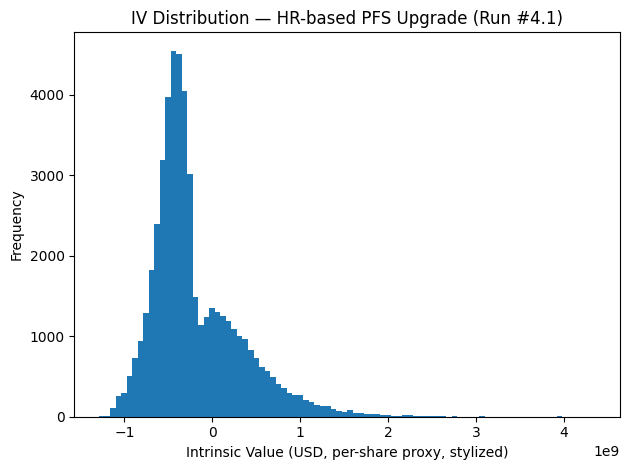

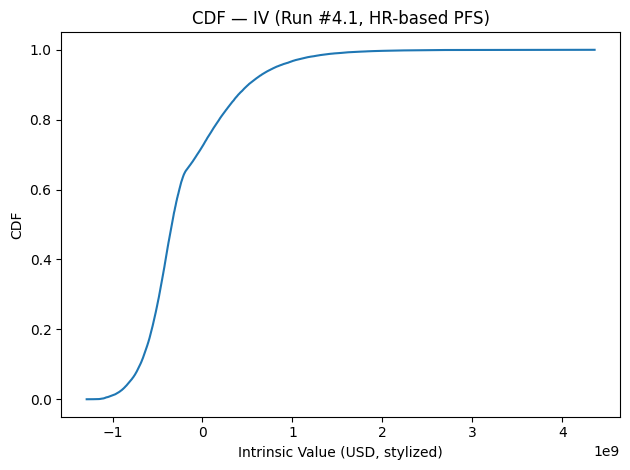

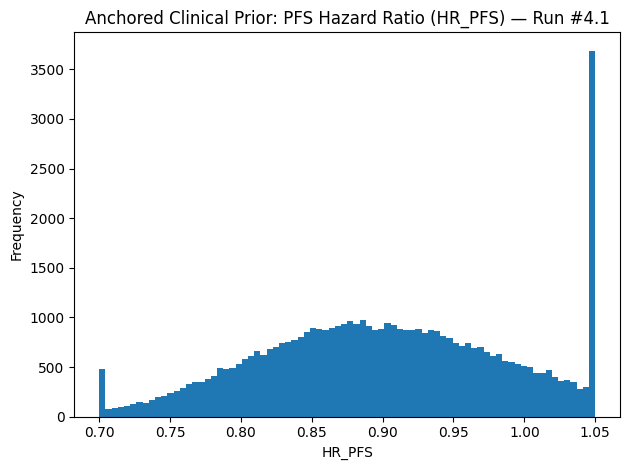

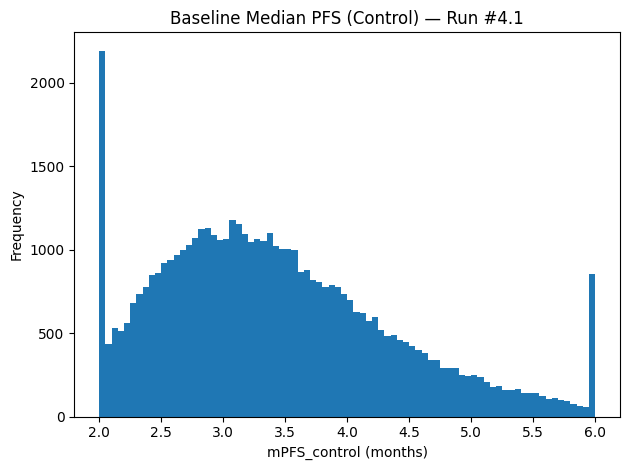

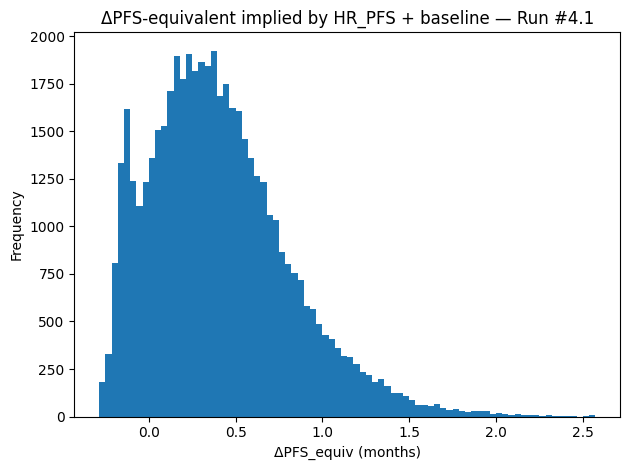

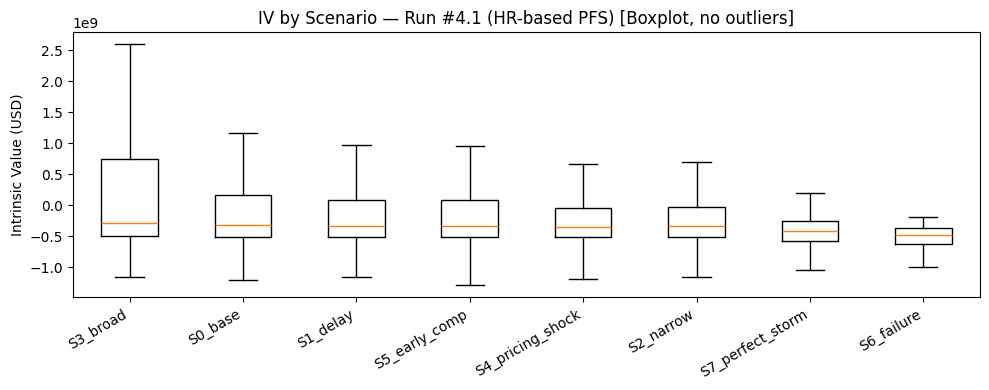

,mean,p5,p10,p25,p50,p75,p90,p95,cvar_10,cvar_05
0,-1.940292e+08,-8.087874e+08,-6.918066e+08,-5.186100e+08,-3.409019e+08,5.919278e+07,5.097061e+08,8.068938e+08,-8.351869e+08,-9.267395e+08


In [69]:
# Inline plots for HR-based PFS upgrade run

# 1) IV distribution & CDF
plt.figure()
plt.hist(df4p["IV"].values, bins=90)
plt.title("IV Distribution — HR-based PFS Upgrade (Run #4.1)")
plt.xlabel("Intrinsic Value (USD, per-share proxy, stylized)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

x = np.sort(df4p["IV"].values)
y = np.arange(1, len(x)+1)/len(x)
plt.figure()
plt.plot(x, y)
plt.title("CDF — IV (Run #4.1, HR-based PFS)")
plt.xlabel("Intrinsic Value (USD, stylized)")
plt.ylabel("CDF")
plt.tight_layout()
plt.show()

# 2) Clinical PFS diagnostics
plt.figure()
plt.hist(df4p["HR_PFS"].values, bins=80)
plt.title("Anchored Clinical Prior: PFS Hazard Ratio (HR_PFS) — Run #4.1")
plt.xlabel("HR_PFS")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(df4p["mPFS_ctrl_mo"].values, bins=80)
plt.title("Baseline Median PFS (Control) — Run #4.1")
plt.xlabel("mPFS_control (months)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(df4p["dPFS_equiv_mo"].values, bins=80)
plt.title("ΔPFS-equivalent implied by HR_PFS + baseline — Run #4.1")
plt.xlabel("ΔPFS_equiv (months)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3) Scenario comparison
plt.figure(figsize=(10,4))
order = by_scenario4p.sort_values("mean_IV", ascending=False)["scenario"].tolist()
plt.boxplot([df4p.loc[df4p["scenario"]==s, "IV"].values for s in order], showfliers=False)
plt.xticks(range(1, len(order)+1), order, rotation=30, ha="right")
plt.title("IV by Scenario — Run #4.1 (HR-based PFS) [Boxplot, no outliers]")
plt.ylabel("Intrinsic Value (USD)")
plt.tight_layout()
plt.show()

summary4p


In [70]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

np.random.seed(20260112)

# -------------------------------
# Step 4 — Commercial Priors Anchoring (Run #5 / #5.1)
# Two variants:
#  - Run #5: ΔPFS-based clinical proxy (same as Run #4, but commercial anchored)
#  - Run #5.1: HR-based PFS upgrade (same as Run #4.1, but commercial anchored)
# All plots rendered inline (no file export).
# -------------------------------

# Utilities (self-contained)
def trunc_normal(mean, sd, low, high, n):
    x = np.random.normal(mean, sd, n)
    mask = (x < low) | (x > high)
    while mask.any():
        x[mask] = np.random.normal(mean, sd, mask.sum())
        mask = (x < low) | (x > high)
    return x

def triangular(a, c, b, n):
    return np.random.triangular(a, c, b, n)

def lognormal_from_range(low, high, n, median=None):
    low = float(low); high = float(high)
    if median is None:
        median = np.sqrt(low*high)
    mu = np.log(median)
    sigma = (np.log(high) - np.log(low)) / (2*1.96)
    x = np.random.lognormal(mean=mu, sigma=sigma, size=n)
    return np.clip(x, low, high)

def beta_from_mean_range(mean, low, high, n, k=20.0):
    mean01 = (mean - low) / (high - low)
    mean01 = np.clip(mean01, 1e-3, 1-1e-3)
    a = mean01 * k
    b = (1-mean01) * k
    x01 = np.random.beta(a, b, n)
    return low + x01*(high-low)

def summarize(x):
    q = np.percentile(x, [5,10,25,50,75,90,95])
    return {
        "mean": float(np.mean(x)),
        "p5": float(q[0]), "p10": float(q[1]), "p25": float(q[2]),
        "p50": float(q[3]), "p75": float(q[4]), "p90": float(q[5]), "p95": float(q[6])
    }
def cvar(x, alpha=0.10):
    thr = np.quantile(x, alpha)
    return float(x[x <= thr].mean())

def simulate(use_hr_pfs: bool, N=50000, seed=0):
    np.random.seed(seed)
    HORIZON_YEARS = 15
    LAUNCH_WINDOW_MAX_YEARS = 6

    scenario_weights = {
        "S0_base": 0.40,
        "S1_delay": 0.12,
        "S2_narrow": 0.10,
        "S3_broad": 0.08,
        "S4_pricing_shock": 0.10,
        "S5_early_comp": 0.10,
        "S6_failure": 0.07,
        "S7_perfect_storm": 0.03
    }
    scenario_names = list(scenario_weights.keys())
    scenario_probs = np.array([scenario_weights[k] for k in scenario_names])
    scenario = np.array(scenario_names)[np.random.choice(len(scenario_names), size=N, p=scenario_probs)]

    # Discount regimes
    regime = np.random.choice(["low","normal","high"], size=N, p=[0.25,0.50,0.25])
    r = np.where(regime=="low",
                 trunc_normal(0.09, 0.005, 0.08, 0.10, N),
                 np.where(regime=="normal",
                          trunc_normal(0.11, 0.006, 0.10, 0.12, N),
                          trunc_normal(0.13, 0.006, 0.12, 0.14, N)))

    # Step 1: incidence anchoring (kept)
    I_US0 = lognormal_from_range(175000, 270000, N, median=219000)
    I_EU0 = lognormal_from_range(190000, 300000, N, median=236000)
    g_epi = trunc_normal(0.008, 0.010, -0.01, 0.03, N)

    # Eligibility (kept)
    p_adv = beta_from_mean_range(0.55, 0.35, 0.70, N)
    p_2L  = beta_from_mean_range(0.50, 0.25, 0.70, N)
    p_bio = beta_from_mean_range(0.30, 0.15, 0.45, N)
    p_elig= beta_from_mean_range(0.80, 0.60, 0.90, N)

    # Success (kept)
    P_P3 = beta_from_mean_range(0.55, 0.40, 0.70, N)
    P_APP = beta_from_mean_range(0.85, 0.75, 0.95, N)

    # Step 2: timing anchoring (kept)
    T_P3_mo = lognormal_from_range(24, 72, N, median=44)
    p_priority = 0.60
    is_priority = (np.random.rand(N) < p_priority)
    T_FDA_mo = np.where(is_priority,
                        trunc_normal(6.0, 0.8, 4.5, 9.0, N),
                        trunc_normal(10.0, 1.0, 7.5, 14.0, N))
    p_ema_accel = 0.35
    ema_accel = (np.random.rand(N) < p_ema_accel)
    T_EMA_mo = np.where(ema_accel,
                        trunc_normal(7.0, 1.0, 5.0, 10.0, N),
                        trunc_normal(12.2, 2.0, 7.0, 20.0, N))
    T_APP_mo = np.maximum(T_FDA_mo, T_EMA_mo)  # conservative global approval

    # Step 3: clinical anchoring (kept; only PFS representation differs)
    HR_OS = np.clip(lognormal_from_range(0.60, 0.85, N, median=0.69), 0.55, 1.05)
    dSAE = trunc_normal(-0.18, 0.08, -0.30, 0.05, N)

    if use_hr_pfs:
        HR_PFS = np.clip(lognormal_from_range(0.70, 1.05, N, median=0.90), 0.50, 1.40)
        mPFS_ctrl = lognormal_from_range(2.0, 6.0, N, median=3.3)  # months
        mPFS_treat = mPFS_ctrl / HR_PFS
        dPFS_equiv = mPFS_treat - mPFS_ctrl
        dPFS_scalar = dPFS_equiv
        clinical_extra = {"HR_PFS": HR_PFS, "mPFS_ctrl_mo": mPFS_ctrl, "dPFS_equiv_mo": dPFS_equiv}
    else:
        # ΔPFS proxy (as in Run #4)
        dPFS_scalar = trunc_normal(0.7, 1.4, -2.0, 6.0, N)
        clinical_extra = {"dPFS_mo": dPFS_scalar}

    # Step 4: commercial anchoring (NEW)
    # Pricing: anchor to public NSCLC 2L annual therapy cost poster (~$254k average annual therapy cost in 2023)
    Price_US = lognormal_from_range(120000, 400000, N, median=254000)
    # Europe price ratio lower; keep ratio but now treat it as "net price ratio" distribution
    eu_ratio = trunc_normal(0.55, 0.08, 0.35, 0.75, N)
    Price_EU = Price_US * eu_ratio

    # Access: explicitly separate "coverage/access" from "time-to-availability"
    Access_US = beta_from_mean_range(0.85, 0.70, 0.95, N)
    Access_EU = beta_from_mean_range(0.70, 0.45, 0.85, N)  # widened to reflect access inequality

    # Time to availability / reimbursement lags:
    # EU/EEA average reimbursement delay reported ~511 days (~16.8 months) with wide range
    EU_reimb_lag_mo = lognormal_from_range(4, 60, N, median=17)
    # US payer / formulary lag is typically much shorter; model as 0-6 months (median ~1)
    US_access_lag_mo = lognormal_from_range(0.1, 6, N, median=1.0)

    # Uptake
    k_uptake = lognormal_from_range(0.4, 1.2, N, median=0.7)
    t_mid = triangular(0.8, 1.5, 2.5, N)

    # Competition
    T_comp_mo = lognormal_from_range(18, 72, N, median=36)
    phi = beta_from_mean_range(0.72, 0.55, 0.85, N)

    # Costs
    c_cogs = beta_from_mean_range(0.12, 0.05, 0.20, N)
    c_sga  = beta_from_mean_range(0.32, 0.20, 0.45, N)
    c_rd_post = beta_from_mean_range(0.10, 0.05, 0.15, N)
    capex_pct = beta_from_mean_range(0.03, 0.01, 0.05, N)
    tax_pct = triangular(0.10, 0.18, 0.25, N)

    # Burn & dilution
    Burn_pre = lognormal_from_range(80e6, 350e6, N, median=170e6)
    P_raise  = beta_from_mean_range(0.65, 0.40, 0.80, N)
    Dilution = triangular(0.05, 0.15, 0.35, N)

    # Label strength mapping (unchanged); uses dPFS_scalar and safety
    dPFS_n = (np.clip(dPFS_scalar, -2.0, 6.0) - (-2.0)) / (6.0 - (-2.0))
    dSAE_n = (np.clip(dSAE, -0.30, 0.05) - (-0.30)) / (0.05 - (-0.30))
    S = 0.7*dPFS_n + 0.3*(1 - dSAE_n)

    def sigmoid(x):
        return 1/(1+np.exp(-x))

    p_broad = sigmoid((S - 0.70)/0.07) * 0.60
    p_narrow = sigmoid((0.40 - S)/0.07) * 0.70
    p_base = 1 - p_broad - p_narrow
    p_base = np.clip(p_base, 0.05, 0.90)
    Z = p_broad + p_base + p_narrow
    p_broad, p_base, p_narrow = p_broad/Z, p_base/Z, p_narrow/Z

    u = np.random.rand(N)
    L = np.where(u < p_narrow, "narrow", np.where(u < p_narrow+p_base, "base", "broad"))

    Umax = np.zeros(N)
    Umax[L=="narrow"] = np.random.uniform(0.10, 0.25, (L=="narrow").sum())
    Umax[L=="base"]   = np.random.uniform(0.20, 0.45, (L=="base").sum())
    Umax[L=="broad"]  = np.random.uniform(0.35, 0.65, (L=="broad").sum())

    # Scenario modifiers
    force_failure = (scenario=="S6_failure")

    delay_mask = (scenario=="S1_delay") | (scenario=="S7_perfect_storm")
    extra_delay = np.zeros(N)
    extra_delay[delay_mask] = lognormal_from_range(6, 24, delay_mask.sum(), median=10)
    T_APP_mo = T_APP_mo + extra_delay

    # Label overrides
    L = np.where(scenario=="S2_narrow", "narrow", L)
    L = np.where(scenario=="S3_broad", "broad", L)
    L = np.where(scenario=="S7_perfect_storm", "narrow", L)

    Umax2 = np.copy(Umax)
    Umax2[(scenario=="S2_narrow") | (scenario=="S7_perfect_storm")] = np.random.uniform(0.10, 0.25, ((scenario=="S2_narrow") | (scenario=="S7_perfect_storm")).sum())
    Umax2[(scenario=="S3_broad")] = np.random.uniform(0.35, 0.65, (scenario=="S3_broad").sum())
    Umax = Umax2

    pricing_mask = (scenario=="S4_pricing_shock") | (scenario=="S7_perfect_storm")
    price_shock = np.ones(N)
    access_shock = np.ones(N)
    price_shock[pricing_mask] = 1 - np.random.uniform(0.10, 0.30, pricing_mask.sum())
    access_shock[pricing_mask] = 1 - np.random.uniform(0.05, 0.20, pricing_mask.sum())
    Price_US = Price_US * price_shock
    Price_EU = Price_EU * price_shock
    Access_US = np.clip(Access_US * access_shock, 0.35, 1.0)
    Access_EU = np.clip(Access_EU * access_shock, 0.30, 1.0)

    early_comp_mask = (scenario=="S5_early_comp") | (scenario=="S7_perfect_storm")
    T_comp_mo[early_comp_mask] = lognormal_from_range(6, 30, early_comp_mask.sum(), median=15)
    phi[early_comp_mask] = beta_from_mean_range(0.60, 0.45, 0.75, early_comp_mask.sum())

    # Launch outcome
    p3_success = (np.random.rand(N) < P_P3) & (~force_failure)
    app_success = (np.random.rand(N) < P_APP) & p3_success
    T_launch_yrs = np.minimum((T_P3_mo + T_APP_mo)/12.0, LAUNCH_WINDOW_MAX_YEARS)
    launched = app_success

    years = np.arange(1, HORIZON_YEARS+1)

    I_US_t = I_US0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))
    I_EU_t = I_EU0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))

    N_US_t = I_US_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]
    N_EU_t = I_EU_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]

    t_since_launch = np.maximum(years[None,:] - T_launch_yrs[:,None], 0.0)
    U_t = Umax[:,None] / (1 + np.exp(-k_uptake[:,None]*(t_since_launch - t_mid[:,None])))
    U_t = U_t * launched[:,None]

    Rev = (N_US_t * U_t * Access_US[:,None] * Price_US[:,None]) + (N_EU_t * U_t * Access_EU[:,None] * Price_EU[:,None])

    T_comp_yrs = T_comp_mo/12.0
    comp_active = (t_since_launch >= T_comp_yrs[:,None]) & launched[:,None]
    Rev = Rev * np.where(comp_active, phi[:,None], 1.0)

    m = 1 - c_cogs - c_sga - c_rd_post
    EBIT = Rev * m[:,None]
    Capex = Rev * capex_pct[:,None]
    Taxes = np.maximum(EBIT, 0) * tax_pct[:,None]
    FCF = EBIT - Capex - Taxes

    burn_years = (years[None,:] <= np.floor(T_launch_yrs[:,None]).astype(int))
    burn_limit = 4
    burn_years_nonlaunch = (years[None,:] <= burn_limit)
    Burn = Burn_pre[:,None] * np.where(launched[:,None], burn_years, burn_years_nonlaunch)

    disc = (1 + r)[:,None] ** (years[None,:])

    IV = (FCF / disc).sum(axis=1) - (Burn / disc).sum(axis=1)
    raise_occurs = (np.random.rand(N) < P_raise)
    IV_ps = IV / (1 + np.where(raise_occurs, Dilution, 0.0))

    df = pd.DataFrame({
        "scenario": scenario,
        "regime": regime,
        "IV": IV_ps,
        "launched": launched,
        "label": L,
        "Price_US": Price_US,
        "Price_EU": Price_EU,
        "EU_reimb_lag_mo": EU_reimb_lag_mo,
        "US_access_lag_mo": US_access_lag_mo,
        "HR_OS": HR_OS,
        "dSAE": dSAE,
        "Access_US": Access_US,
        "Access_EU": Access_EU,
    })
    for k,v in clinical_extra.items():
        df[k] = v

    summary = pd.DataFrame([summarize(IV_ps)])
    summary["cvar_10"] = cvar(IV_ps, 0.10)
    summary["cvar_05"] = cvar(IV_ps, 0.05)

    by_scenario = df.groupby("scenario").agg(
        n=("IV","size"),
        mean_IV=("IV","mean"),
        p10=("IV", lambda s: np.quantile(s, 0.10)),
        p50=("IV", "median"),
        launch_rate=("launched","mean"),
    ).reset_index().sort_values("mean_IV", ascending=False)

    commercial_diag = {
        "Price_US_median": float(np.median(Price_US)),
        "Price_US_mean": float(np.mean(Price_US)),
        "EU_ratio_median": float(np.median(Price_EU/Price_US)),
        "EU_reimb_lag_median_mo": float(np.median(EU_reimb_lag_mo)),
        "US_access_lag_median_mo": float(np.median(US_access_lag_mo)),
        "Access_US_mean": float(np.mean(Access_US)),
        "Access_EU_mean": float(np.mean(Access_EU)),
    }
    return df, summary, by_scenario, commercial_diag

# Run #5 and #5.1
df5, sum5, scen5, diag5 = simulate(use_hr_pfs=False, N=50000, seed=2026011201)
df51, sum51, scen51, diag51 = simulate(use_hr_pfs=True,  N=50000, seed=2026011202)

sum5.insert(0, "run", "Run #5 (ΔPFS clinical) + commercial anchored")
sum51.insert(0, "run", "Run #5.1 (HR-PFS clinical) + commercial anchored")

diag_df = pd.DataFrame([
    {"run": "Run #5", **diag5},
    {"run": "Run #5.1", **diag51},
])

summary_compare = pd.concat([sum5, sum51], ignore_index=True)

summary_compare, diag_df, scen5.head(), scen51.head()

(                                                run          mean  \
 0      Run #5 (ΔPFS clinical) + commercial anchored  8.681580e+07   
 1  Run #5.1 (HR-PFS clinical) + commercial anchored  7.218875e+07   
 
              p5           p10           p25           p50           p75  \
 0 -8.000580e+08 -6.808462e+08 -5.056587e+08 -3.121410e+08  5.155560e+08   
 1 -8.005158e+08 -6.815637e+08 -5.053581e+08 -3.130781e+08  4.899790e+08   
 
             p90           p95       cvar_10       cvar_05  
 0  1.366206e+09  1.933789e+09 -8.260903e+08 -9.186120e+08  
 1  1.313792e+09  1.879282e+09 -8.298753e+08 -9.246839e+08  ,
         run  Price_US_median  Price_US_mean  EU_ratio_median  \
 0    Run #5    247408.517647  255345.715134         0.549654   
 1  Run #5.1    247535.192142  255477.467002         0.549888   
 
    EU_reimb_lag_median_mo  US_access_lag_median_mo  Access_US_mean  \
 0               17.056675                 1.003214        0.836613   
 1               17.058283         

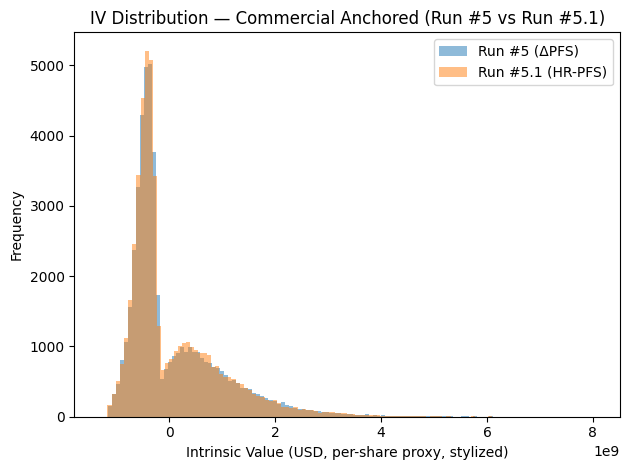

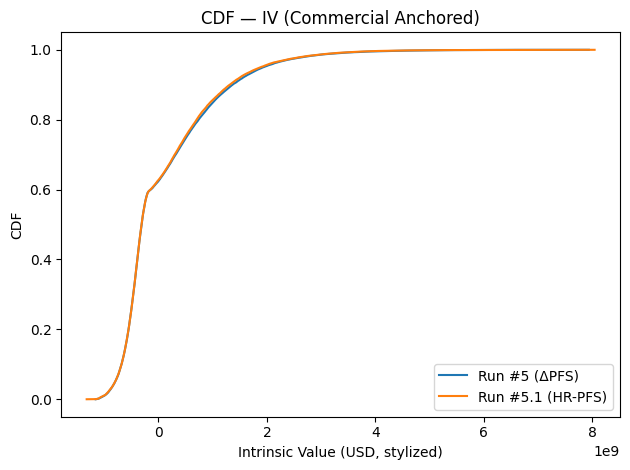

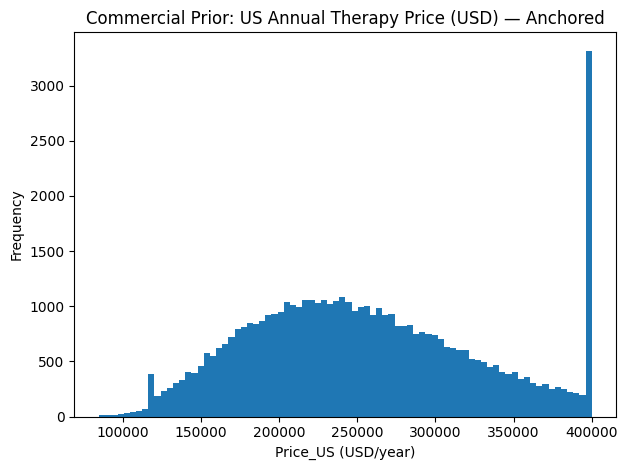

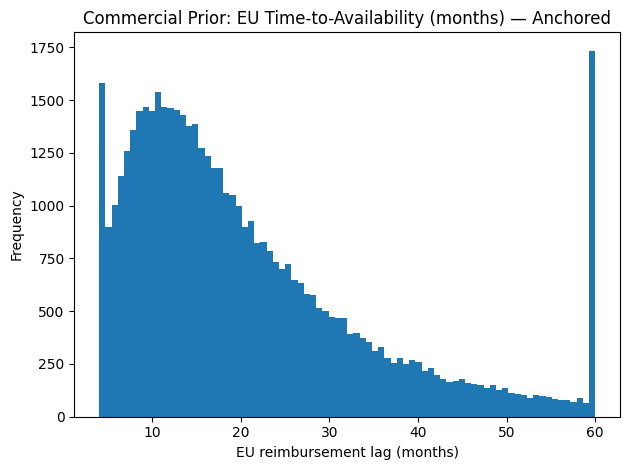

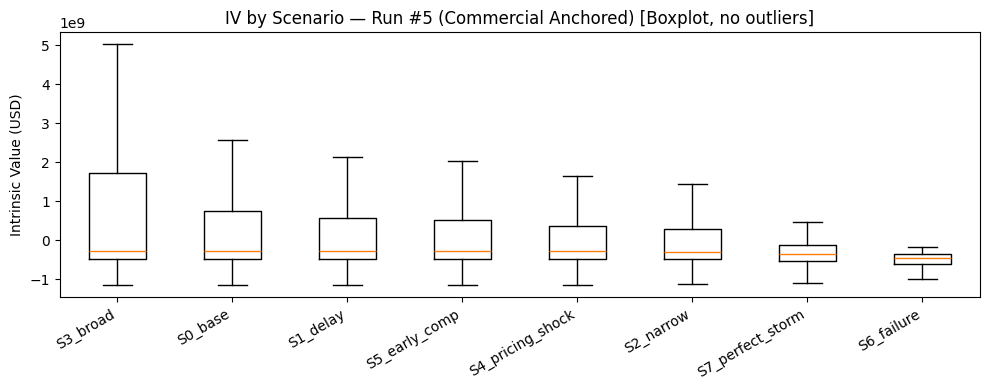

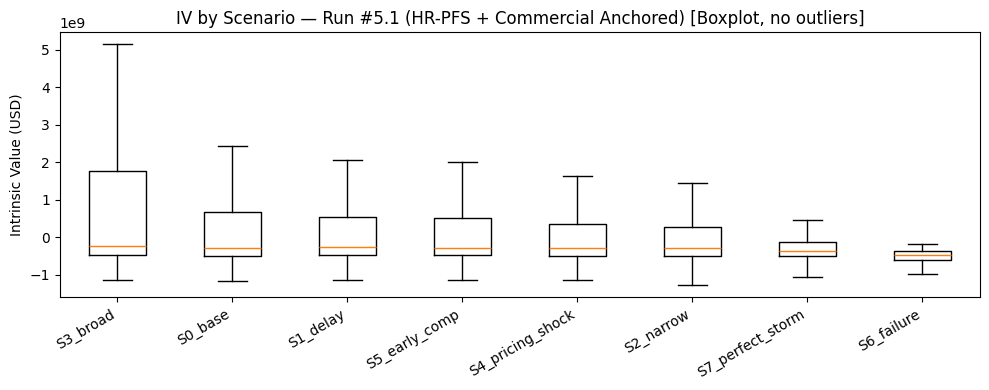

,run,mean,p5,p10,p25,p50,p75,p90,p95,cvar_10,cvar_05
0,Run #5 (ΔPFS clinical) + commercial anchored,8.681580e+07,-8.000580e+08,-6.808462e+08,-5.056587e+08,-3.121410e+08,5.155560e+08,1.366206e+09,1.933789e+09,-8.260903e+08,-9.186120e+08
1,Run #5.1 (HR-PFS clinical) + commercial anchored,7.218875e+07,-8.005158e+08,-6.815637e+08,-5.053581e+08,-3.130781e+08,4.899790e+08,1.313792e+09,1.879282e+09,-8.298753e+08,-9.246839e+08


In [71]:
# Inline visualization: compare runs (IV distributions & CDF), plus commercial diagnostics

# 1) IV distributions overlay (not specifying colors)
plt.figure()
plt.hist(df5["IV"].values, bins=120, alpha=0.5, label="Run #5 (ΔPFS)")
plt.hist(df51["IV"].values, bins=120, alpha=0.5, label="Run #5.1 (HR-PFS)")
plt.title("IV Distribution — Commercial Anchored (Run #5 vs Run #5.1)")
plt.xlabel("Intrinsic Value (USD, per-share proxy, stylized)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# 2) CDF overlay
x1 = np.sort(df5["IV"].values); y1 = np.arange(1, len(x1)+1)/len(x1)
x2 = np.sort(df51["IV"].values); y2 = np.arange(1, len(x2)+1)/len(x2)

plt.figure()
plt.plot(x1, y1, label="Run #5 (ΔPFS)")
plt.plot(x2, y2, label="Run #5.1 (HR-PFS)")
plt.title("CDF — IV (Commercial Anchored)")
plt.xlabel("Intrinsic Value (USD, stylized)")
plt.ylabel("CDF")
plt.legend()
plt.tight_layout()
plt.show()

# 3) Commercial priors diagnostics (Price + EU reimbursement lag)
plt.figure()
plt.hist(df5["Price_US"].values, bins=80)
plt.title("Commercial Prior: US Annual Therapy Price (USD) — Anchored")
plt.xlabel("Price_US (USD/year)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(df5["EU_reimb_lag_mo"].values, bins=80)
plt.title("Commercial Prior: EU Time-to-Availability (months) — Anchored")
plt.xlabel("EU reimbursement lag (months)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4) Scenario boxplots comparison (side-by-side ordering by Run #5 mean)
order = scen5.sort_values("mean_IV", ascending=False)["scenario"].tolist()
plt.figure(figsize=(10,4))
plt.boxplot([df5.loc[df5["scenario"]==s, "IV"].values for s in order], showfliers=False)
plt.xticks(range(1, len(order)+1), order, rotation=30, ha="right")
plt.title("IV by Scenario — Run #5 (Commercial Anchored) [Boxplot, no outliers]")
plt.ylabel("Intrinsic Value (USD)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.boxplot([df51.loc[df51["scenario"]==s, "IV"].values for s in order], showfliers=False)
plt.xticks(range(1, len(order)+1), order, rotation=30, ha="right")
plt.title("IV by Scenario — Run #5.1 (HR-PFS + Commercial Anchored) [Boxplot, no outliers]")
plt.ylabel("Intrinsic Value (USD)")
plt.tight_layout()
plt.show()

summary_compare


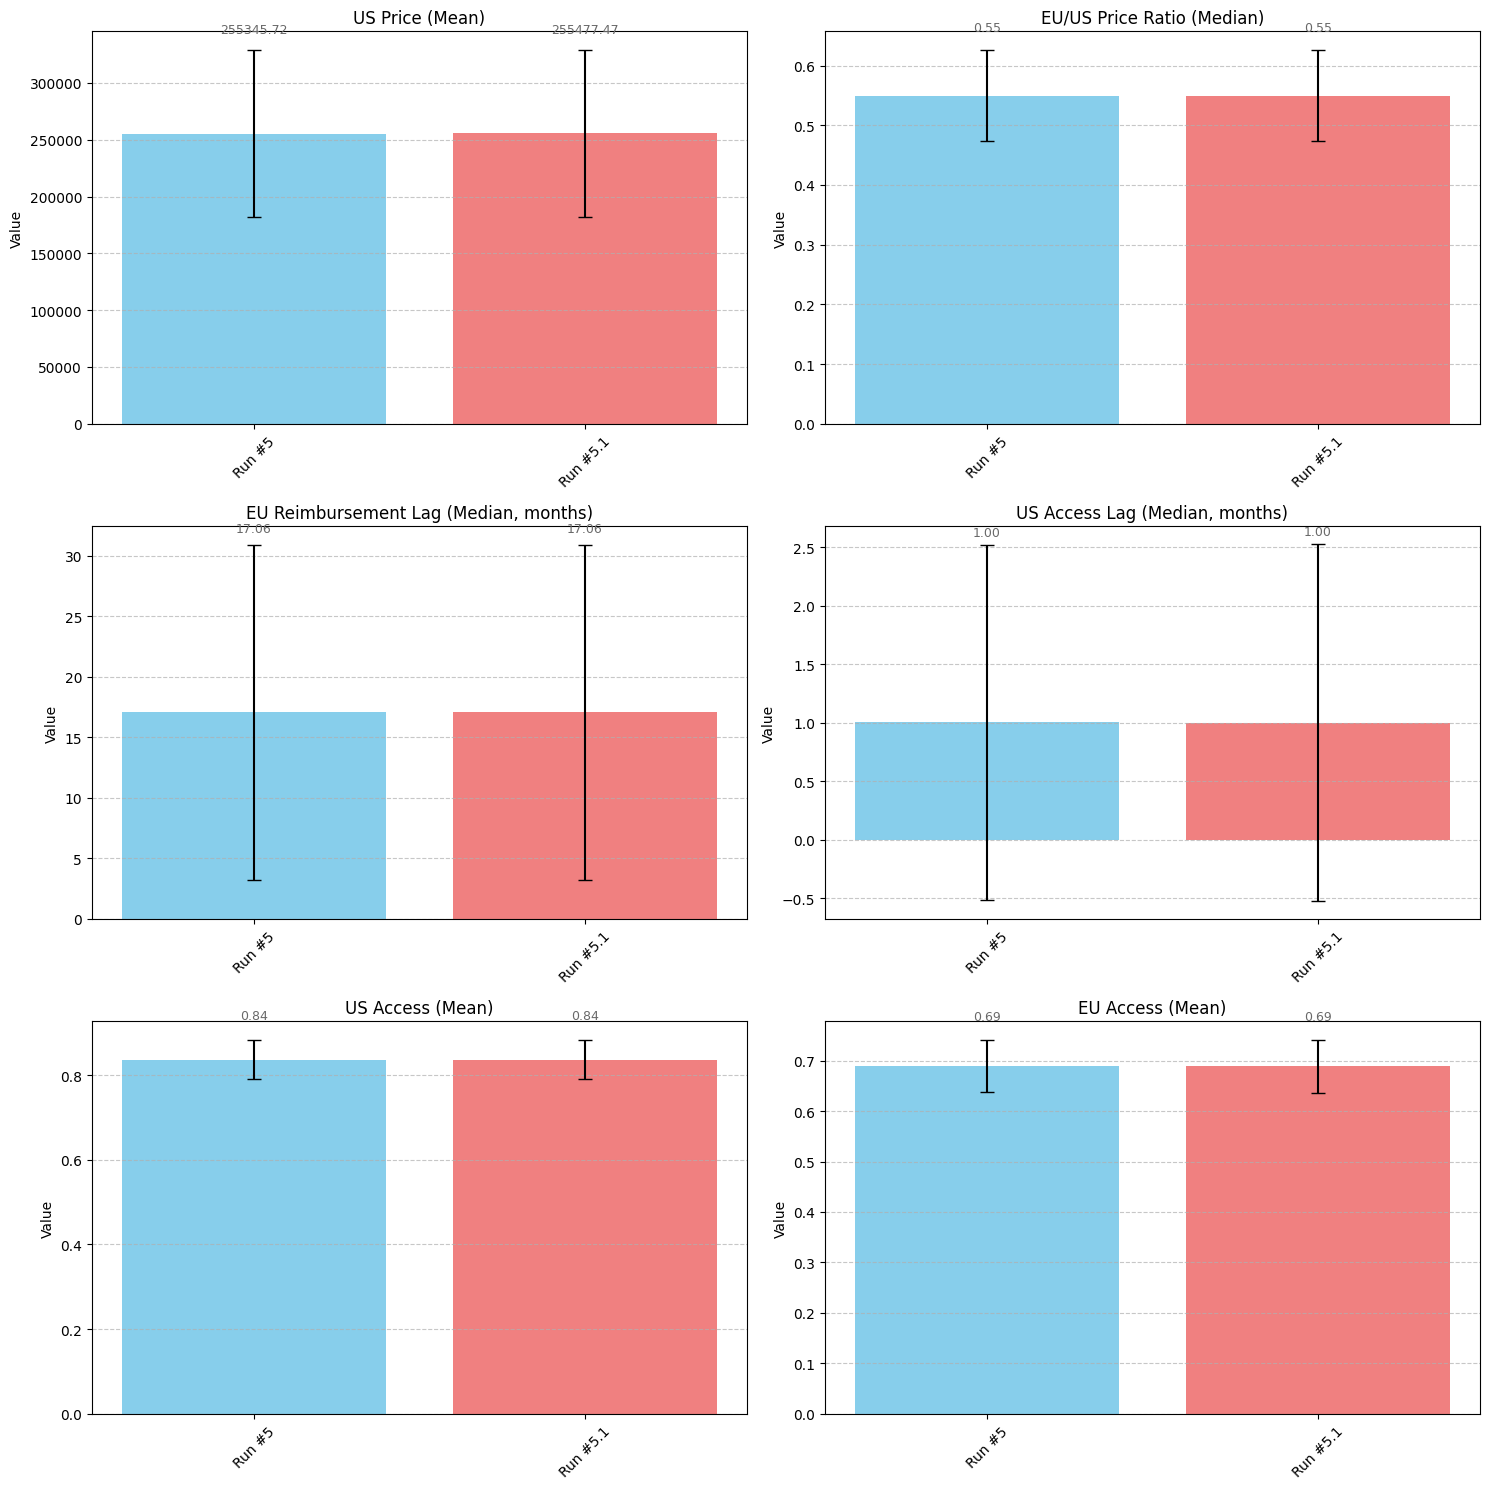

In [72]:
# (OPTIONAL)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Ensure pandas is imported as it's used for DataFrame operations

# Re-calculate diagnostics to include standard deviations for error bars

def calculate_full_diagnostics(df_run, run_name):
    """Calculates mean, median, and std for relevant metrics from a DataFrame."""
    price_us_mean = df_run["Price_US"].mean()
    price_us_std = df_run["Price_US"].std()
    eu_ratio_dist = df_run["Price_EU"] / df_run["Price_US"]
    eu_ratio_median = eu_ratio_dist.median()
    eu_ratio_std = eu_ratio_dist.std()
    eu_reimb_lag_median = df_run["EU_reimb_lag_mo"].median()
    eu_reimb_lag_std = df_run["EU_reimb_lag_mo"].std()
    us_access_lag_median = df_run["US_access_lag_mo"].median()
    us_access_lag_std = df_run["US_access_lag_mo"].std()
    access_us_mean = df_run["Access_US"].mean()
    access_us_std = df_run["Access_US"].std()
    access_eu_mean = df_run["Access_EU"].mean()
    access_eu_std = df_run["Access_EU"].std()

    return {
        "run": run_name,
        "Price_US_mean": float(price_us_mean),
        "Price_US_std": float(price_us_std),
        "EU_ratio_median": float(eu_ratio_median),
        "EU_ratio_std": float(eu_ratio_std),
        "EU_reimb_lag_median_mo": float(eu_reimb_lag_median),
        "EU_reimb_lag_std": float(eu_reimb_lag_std),
        "US_access_lag_median_mo": float(us_access_lag_median),
        "US_access_lag_std": float(us_access_lag_std),
        "Access_US_mean": float(access_us_mean),
        "Access_US_std": float(access_us_std),
        "Access_EU_mean": float(access_eu_mean),
        "Access_EU_std": float(access_eu_std),
    }

# Re-compute full diagnostics for each run (df5 and df51 should be globally available)
# Ensure df5 and df51 are available in the current kernel state from previous executions.
if 'df5' not in globals() or 'df51' not in globals():
    print("Warning: df5 or df51 not found. Please ensure previous simulation cells (Run #5 and #5.1) are executed.")
    # Optionally, you could re-run the simulation here if df5/df51 are critical and missing.
    # For now, we'll proceed assuming they should be there or the user will rectify.

diag5_full = calculate_full_diagnostics(df5, "Run #5")
diag51_full = calculate_full_diagnostics(df51, "Run #5.1")

# Create a new diagnostic DataFrame with standard deviations
diag_df = pd.DataFrame([diag5_full, diag51_full])

# Prepare data for plotting
metrics = [
    'Price_US_mean', 'EU_ratio_median', 'EU_reimb_lag_median_mo',
    'US_access_lag_median_mo', 'Access_US_mean', 'Access_EU_mean'
]
metric_labels = [
    'US Price (Mean)', 'EU/US Price Ratio (Median)', 'EU Reimbursement Lag (Median, months)',
    'US Access Lag (Median, months)', 'US Access (Mean)', 'EU Access (Mean)'
]
metric_stds = [
    'Price_US_std', 'EU_ratio_std', 'EU_reimb_lag_std',
    'US_access_lag_std', 'Access_US_std', 'Access_EU_std'
]

# Number of metrics and runs
x = np.arange(len(metrics))
width = 0.35

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharex=False)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, metric in enumerate(metrics):
    ax = axes[i]
    values_run5 = diag_df.loc[diag_df['run'] == 'Run #5', metric].values[0]
    values_run51 = diag_df.loc[diag_df['run'] == 'Run #5.1', metric].values[0]

    std_run5 = diag_df.loc[diag_df['run'] == 'Run #5', metric_stds[i]].values[0]
    std_run51 = diag_df.loc[diag_df['run'] == 'Run #5.1', metric_stds[i]].values[0]

    # Plot bars with error bars
    bars = ax.bar(['Run #5', 'Run #5.1'], [values_run5, values_run51],
                  yerr=[std_run5, std_run51], capsize=5, error_kw={'linewidth': 1.5, 'color': 'black'},
                  color=['skyblue', 'lightcoral'])
    ax.set_title(metric_labels[i])
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels on top of the bars
    for idx, bar in enumerate(bars):
        yval = bar.get_height()
        error_val = [std_run5, std_run51][idx]
        # Position the text slightly above the bar or error bar, ensuring visibility
        vertical_offset = (bar.get_y() + yval + error_val) + (0.05 * abs(yval) if yval !=0 else 0.1)
        ax.text(bar.get_x() + bar.get_width()/2, vertical_offset,
                f'{yval:.2f}', ha='center', va='bottom', fontsize=9, color='dimgray')

plt.tight_layout()
plt.show()

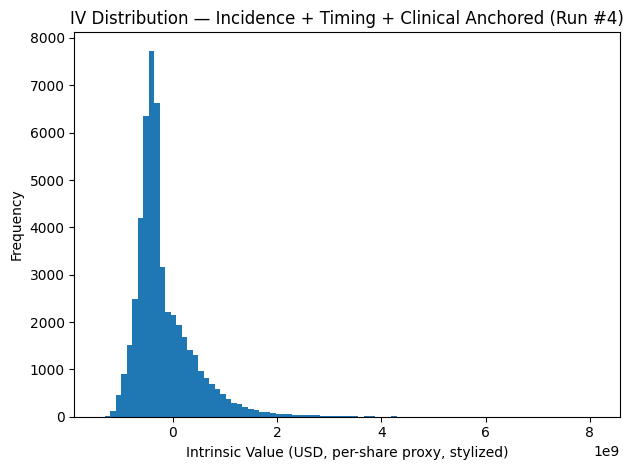

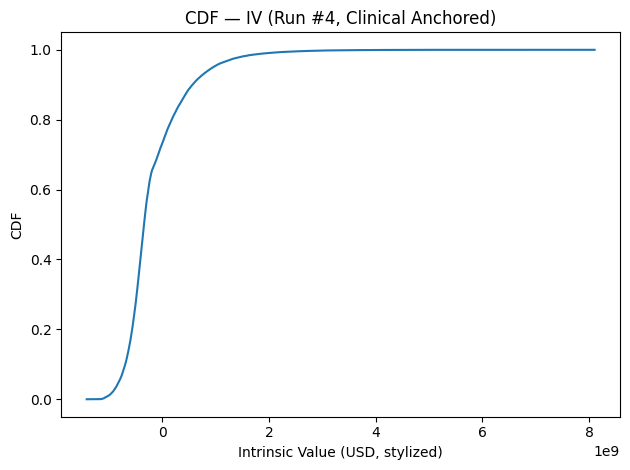

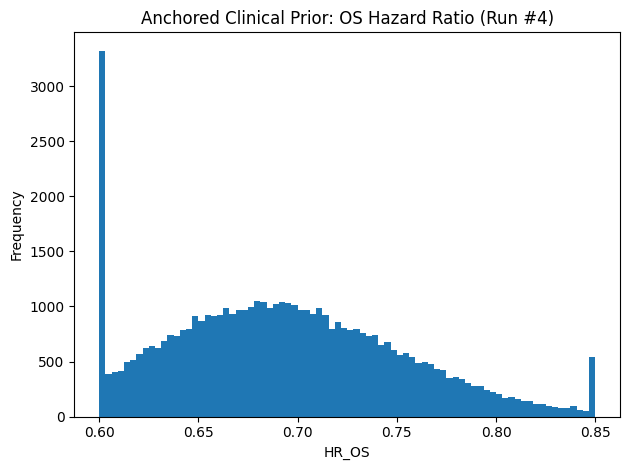

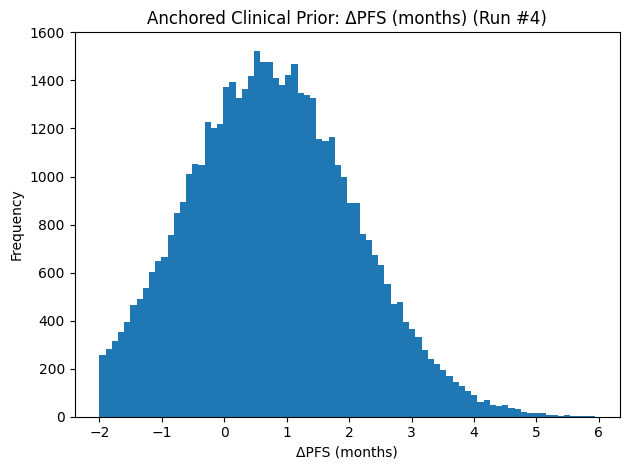

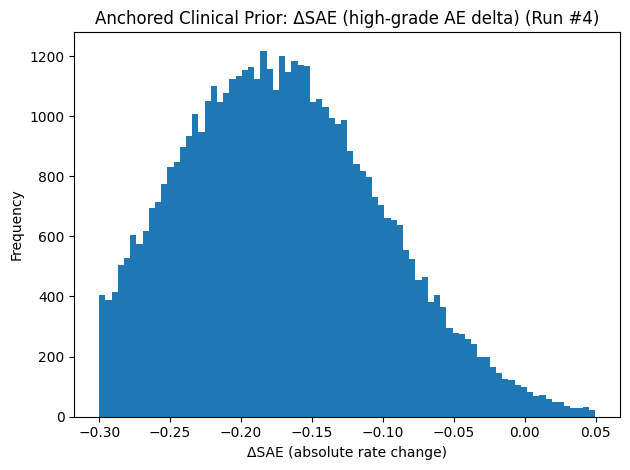

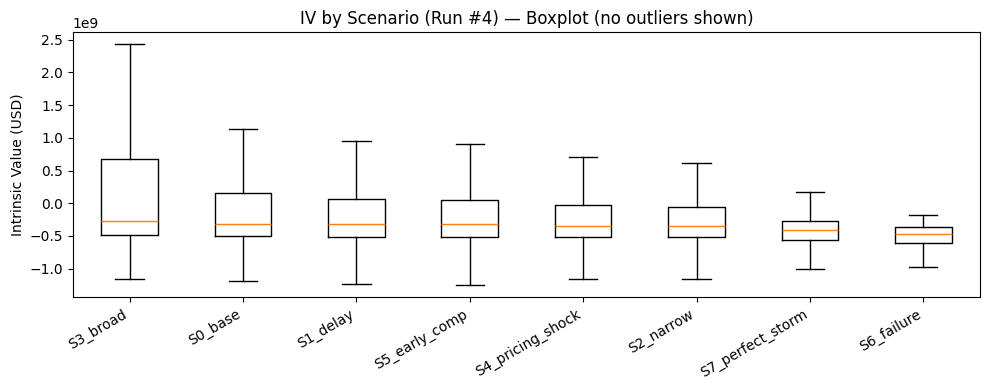

,mean,p5,p10,p25,p50,p75,p90,p95,cvar_10,cvar_05
0,-1.740767e+08,-8.140462e+08,-6.933539e+08,-5.193291e+08,-3.419530e+08,4.353816e+07,5.656543e+08,9.513765e+08,-8.389134e+08,-9.303548e+08


In [73]:
#(OPTIONAL)
# Inline visualization cells (render in notebook)

# 1) IV distribution
plt.figure()
plt.hist(df4["IV"].values, bins=90)
plt.title("IV Distribution — Incidence + Timing + Clinical Anchored (Run #4)")
plt.xlabel("Intrinsic Value (USD, per-share proxy, stylized)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

x = np.sort(df4["IV"].values)
y = np.arange(1, len(x)+1)/len(x)
plt.figure()
plt.plot(x, y)
plt.title("CDF — IV (Run #4, Clinical Anchored)")
plt.xlabel("Intrinsic Value (USD, stylized)")
plt.ylabel("CDF")
plt.tight_layout()
plt.show()

# 2) Clinical priors diagnostics
plt.figure()
plt.hist(df4["HR_OS"].values, bins=80)
plt.title("Anchored Clinical Prior: OS Hazard Ratio (Run #4)")
plt.xlabel("HR_OS")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(df4["dPFS_mo"].values, bins=80) # Corrected column name to dPFS_mo
plt.title("Anchored Clinical Prior: ΔPFS (months) (Run #4)")
plt.xlabel("ΔPFS (months)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(df4["dSAE"].values, bins=80)
plt.title("Anchored Clinical Prior: ΔSAE (high-grade AE delta) (Run #4)")
plt.xlabel("ΔSAE (absolute rate change)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3) Scenario boxplot (optional, quick comparison)
plt.figure(figsize=(10,4))
order = by_scenario4.sort_values("mean_IV", ascending=False)["scenario"].tolist()
plt.boxplot([df4.loc[df4["scenario"]==s, "IV"].values for s in order], vert=True, showfliers=False)
plt.xticks(range(1, len(order)+1), order, rotation=30, ha="right")
plt.title("IV by Scenario (Run #4) — Boxplot (no outliers shown)")
plt.ylabel("Intrinsic Value (USD)")
plt.tight_layout()
plt.show()

# Display summary table again for easy reference
display(summary4)

In [74]:
# Analyze IV by Regime
by_regime = df4.groupby("regime").agg(
    n=("IV", "size"),
    mean_IV=("IV", "mean"),
    p10_IV=("IV", lambda x: np.quantile(x, 0.10)),
    p50_IV=("IV", "median"),
    p90_IV=("IV", lambda x: np.quantile(x, 0.90)),
    cvar_10=("IV", lambda x: cvar(x, 0.10))
).reset_index().sort_values("mean_IV", ascending=False)
display(by_regime)

,regime,n,mean_IV,p10_IV,p50_IV,p90_IV,cvar_10
1,low,12433,-1.461296e+08,-7.246063e+08,-3.514304e+08,7.009851e+08,-8.741604e+08
2,normal,25099,-1.767880e+08,-6.900347e+08,-3.418158e+08,5.601264e+08,-8.350534e+08
0,high,12468,-1.964873e+08,-6.682897e+08,-3.350704e+08,4.559373e+08,-8.068369e+08


/tmp/ipython-input-3851373333.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df4.loc[df4['regime'] == r, 'IV'].values for r in order], labels=order, showfliers=False)


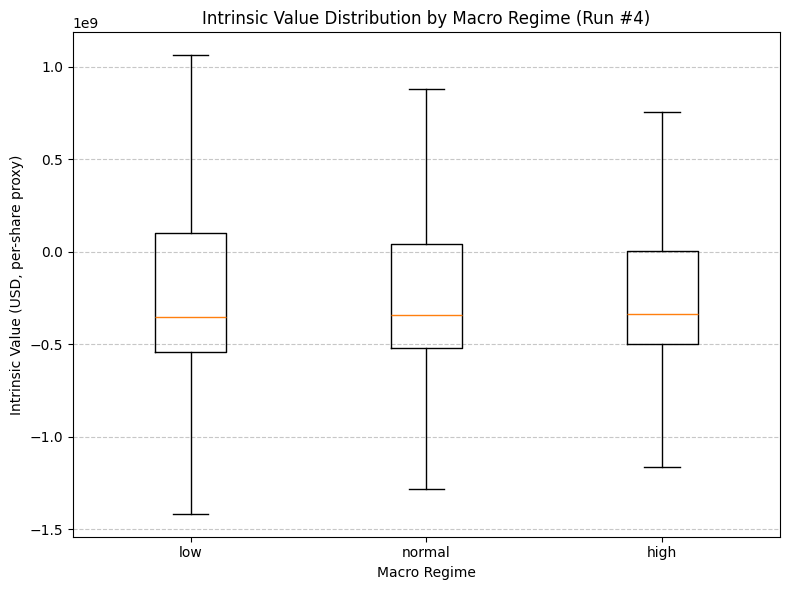

In [75]:
# Visualize IV by Regime using a box plot
plt.figure(figsize=(8, 6))
# Order the box plots from low to high mean IV (which corresponds to low to high discount rate regimes)
order = by_regime.sort_values('mean_IV', ascending=False)['regime'].tolist()
plt.boxplot([df4.loc[df4['regime'] == r, 'IV'].values for r in order], labels=order, showfliers=False)
plt.title("Intrinsic Value Distribution by Macro Regime (Run #4)")
plt.xlabel("Macro Regime")
plt.ylabel("Intrinsic Value (USD, per-share proxy)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [76]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

np.random.seed(20260112)

# -------------------------------
# Step 5 — Decision Layer (optimized to run fast in-notebook)
# Implements: decision variables, constraints, optimization, and Pareto visualization.
# Baseline: Commercial-anchored world + HR-based PFS (Run #5.1 lineage).
# -------------------------------

# ---- Utilities ----
def trunc_normal(mean, sd, low, high, n):
    x = np.random.normal(mean, sd, n)
    mask = (x < low) | (x > high)
    while mask.any():
        x[mask] = np.random.normal(mean, sd, mask.sum())
        mask = (x < low) | (x > high)
    return x

def triangular(a, c, b, n):
    return np.random.triangular(a, c, b, n)

def lognormal_from_range(low, high, n, median=None):
    low = float(low); high = float(high)
    if median is None:
        median = np.sqrt(low*high)
    mu = np.log(median)
    sigma = (np.log(high) - np.log(low)) / (2*1.96)
    x = np.random.lognormal(mean=mu, sigma=sigma, size=n)
    return np.clip(x, low, high)

def beta_from_mean_range(mean, low, high, n, k=20.0):
    mean01 = (mean - low) / (high - low)
    mean01 = np.clip(mean01, 1e-3, 1-1e-3)
    a = mean01 * k
    b = (1-mean01) * k
    x01 = np.random.beta(a, b, n)
    return low + x01*(high-low)

def cvar_vec(x, alpha=0.10):
    thr = np.quantile(x, alpha)
    return x[x <= thr].mean()

# ---- World sampler (HR-PFS lineage) ----
def build_world(M=6000, seed=2026011210):
    np.random.seed(seed)
    T = 15
    years = np.arange(1, T+1)
    LAUNCH_WINDOW_MAX_YEARS = 6

    # Scenarios
    scenario_weights = {
        "S0_base": 0.40, "S1_delay": 0.12, "S2_narrow": 0.10, "S3_broad": 0.08,
        "S4_pricing_shock": 0.10, "S5_early_comp": 0.10, "S6_failure": 0.07, "S7_perfect_storm": 0.03
    }
    scen_names = list(scenario_weights.keys())
    scen_probs = np.array([scenario_weights[k] for k in scen_names])
    scenario = np.array(scen_names)[np.random.choice(len(scen_names), size=M, p=scen_probs)]

    # Discount regimes
    regime = np.random.choice(["low","normal","high"], size=M, p=[0.25,0.50,0.25])
    r = np.where(regime=="low",
                 trunc_normal(0.09, 0.005, 0.08, 0.10, M),
                 np.where(regime=="normal",
                          trunc_normal(0.11, 0.006, 0.10, 0.12, M),
                          trunc_normal(0.13, 0.006, 0.12, 0.14, M)))

    # Incidence
    I_US0 = lognormal_from_range(175000, 270000, M, median=219000)
    I_EU0 = lognormal_from_range(190000, 300000, M, median=236000)
    g_epi = trunc_normal(0.008, 0.010, -0.01, 0.03, M)

    # Eligibility
    p_adv = beta_from_mean_range(0.55, 0.35, 0.70, M)
    p_2L  = beta_from_mean_range(0.50, 0.25, 0.70, M)
    p_bio = beta_from_mean_range(0.30, 0.15, 0.45, M)
    p_elig= beta_from_mean_range(0.80, 0.60, 0.90, M)

    # Success
    P_P3 = beta_from_mean_range(0.55, 0.40, 0.70, M)
    P_APP = beta_from_mean_range(0.85, 0.75, 0.95, M)

    # Timing
    T_P3_mo = lognormal_from_range(24, 72, M, median=44)
    is_priority = (np.random.rand(M) < 0.60)
    T_FDA_mo = np.where(is_priority,
                        trunc_normal(6.0, 0.8, 4.5, 9.0, M),
                        trunc_normal(10.0, 1.0, 7.5, 14.0, M))
    ema_accel = (np.random.rand(M) < 0.35)
    T_EMA_mo = np.where(ema_accel,
                        trunc_normal(7.0, 1.0, 5.0, 10.0, M),
                        trunc_normal(12.2, 2.0, 7.0, 20.0, M))
    T_APP_mo = np.maximum(T_FDA_mo, T_EMA_mo)

    # Scenario delay
    delay_mask = (scenario=="S1_delay") | (scenario=="S7_perfect_storm")
    extra_delay = np.zeros(M)
    extra_delay[delay_mask] = lognormal_from_range(6, 24, delay_mask.sum(), median=10)
    T_APP_mo = T_APP_mo + extra_delay

    # Launch
    force_failure = (scenario=="S6_failure")
    p3_success = (np.random.rand(M) < P_P3) & (~force_failure)
    app_success = (np.random.rand(M) < P_APP) & p3_success
    T_launch_yrs = np.minimum((T_P3_mo + T_APP_mo)/12.0, LAUNCH_WINDOW_MAX_YEARS)
    launched = app_success

    # Clinical (HR-PFS bridged into ΔPFS-equivalent)
    HR_PFS = np.clip(lognormal_from_range(0.70, 1.05, M, median=0.90), 0.50, 1.40)
    mPFS_ctrl = lognormal_from_range(2.0, 6.0, M, median=3.3)
    dPFS = (mPFS_ctrl/HR_PFS) - mPFS_ctrl
    dSAE = trunc_normal(-0.18, 0.08, -0.30, 0.05, M)

    # Commercial anchored (baseline before decisions)
    Price_US0 = lognormal_from_range(120000, 400000, M, median=254000)
    eu_ratio0 = trunc_normal(0.55, 0.08, 0.35, 0.75, M)
    Price_EU0 = Price_US0 * eu_ratio0

    Access_US0 = beta_from_mean_range(0.85, 0.70, 0.95, M)
    Access_EU0 = beta_from_mean_range(0.70, 0.45, 0.85, M)
    EU_lag0_mo = lognormal_from_range(4, 60, M, median=17)
    US_lag0_mo = lognormal_from_range(0.1, 6, M, median=1.0)

    # Uptake shape (precompute)
    k_uptake = lognormal_from_range(0.4, 1.2, M, median=0.7)
    t_mid = triangular(0.8, 1.5, 2.5, M)
    t_since_launch = np.maximum(years[None,:] - T_launch_yrs[:,None], 0.0)
    A = 1/(1 + np.exp(-k_uptake[:,None]*(t_since_launch - t_mid[:,None])))
    A = A * launched[:,None]

    # Precompute eligible patients per year
    I_US_t = I_US0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))
    I_EU_t = I_EU0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))
    N_US_t = I_US_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]
    N_EU_t = I_EU_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]

    # Competition
    T_comp_mo = lognormal_from_range(18, 72, M, median=36)
    phi = beta_from_mean_range(0.72, 0.55, 0.85, M)
    early_comp = (scenario=="S5_early_comp") | (scenario=="S7_perfect_storm")
    T_comp_mo[early_comp] = lognormal_from_range(6, 30, early_comp.sum(), median=15)
    phi[early_comp] = beta_from_mean_range(0.60, 0.45, 0.75, early_comp.sum())

    # Pricing shock/access shock
    pricing_mask = (scenario=="S4_pricing_shock") | (scenario=="S7_perfect_storm")
    price_shock = np.ones(M)
    access_shock = np.ones(M)
    price_shock[pricing_mask] = 1 - np.random.uniform(0.10, 0.30, pricing_mask.sum())
    access_shock[pricing_mask] = 1 - np.random.uniform(0.05, 0.20, pricing_mask.sum())
    Price_US0 = Price_US0 * price_shock
    Price_EU0 = Price_EU0 * price_shock
    Access_US0 = np.clip(Access_US0 * access_shock, 0.35, 1.0)
    Access_EU0 = np.clip(Access_EU0 * access_shock, 0.30, 1.0)

    # Financials
    c_cogs = beta_from_mean_range(0.12, 0.05, 0.20, M)
    c_sga  = beta_from_mean_range(0.32, 0.20, 0.45, M)
    c_rd_post = beta_from_mean_range(0.10, 0.05, 0.15, M)
    capex_pct = beta_from_mean_range(0.03, 0.01, 0.05, M)
    tax_pct = triangular(0.10, 0.18, 0.25, M)
    Burn_pre = lognormal_from_range(80e6, 350e6, M, median=170e6)
    P_raise  = beta_from_mean_range(0.65, 0.40, 0.80, M)
    Dilution = triangular(0.05, 0.15, 0.35, M)

    # Discount matrix
    disc = (1 + r)[:,None] ** (years[None,:])

    # RNG streams reused across policy evaluations (eliminate per-candidate randomness)
    u_label = np.random.rand(M)
    u_u1 = np.random.rand(M)

    return dict(
        M=M, years=years, disc=disc,
        scenario=scenario, regime=regime, r=r,
        N_US_t=N_US_t, N_EU_t=N_EU_t,
        A=A, t_since_launch=t_since_launch, launched=launched, T_launch_yrs=T_launch_yrs,
        T_comp_yrs=(T_comp_mo/12.0), phi=phi,
        dPFS=dPFS, dSAE=dSAE,
        Price_US0=Price_US0, Price_EU0=Price_EU0,
        Access_US0=Access_US0, Access_EU0=Access_EU0,
        EU_lag0_mo=EU_lag0_mo, US_lag0_mo=US_lag0_mo,
        c_cogs=c_cogs, c_sga=c_sga, c_rd_post=c_rd_post, capex_pct=capex_pct, tax_pct=tax_pct,
        Burn_pre=Burn_pre, P_raise=P_raise, Dilution=Dilution,
        u_label=u_label, u_u1=u_u1
    )

world = build_world(M=6000)

# ---- Policy evaluator (vectorized over simulations, fast) ----
def eval_policy_fast(world, price_mult, eu_access_invest, equity_commit):
    M = world["M"]
    years = world["years"]

    # Pricing and access elasticity
    Price_US = world["Price_US0"] * price_mult
    Price_EU = world["Price_EU0"] * price_mult

    price_elastic = np.clip(1 - 0.25*(price_mult-1.0), 0.75, 1.10)
    Access_US = np.clip(world["Access_US0"] * price_elastic, 0.30, 1.0)
    Access_EU = np.clip(world["Access_EU0"] * price_elastic, 0.25, 1.0)

    # EU access investment and equity commitment (equity levers)
    Access_EU = np.clip(Access_EU + 0.12*eu_access_invest, 0.25, 0.98)
    EU_lag_mo = np.maximum(world["EU_lag0_mo"] - 8.0*eu_access_invest, 3.0)

    Access_EU = np.maximum(Access_EU, 0.70 + 0.10*equity_commit)
    EU_lag_mo = np.minimum(EU_lag_mo, 18.0 - 6.0*equity_commit)
    EU_lag_mo = np.maximum(EU_lag_mo, 3.0)

    # Label-based uptake ceiling (same mapping; deterministic via cached RNG)
    dPFS = world["dPFS"]; dSAE = world["dSAE"]
    dPFS_n = (np.clip(dPFS, -2.0, 6.0) + 2.0) / 8.0
    dSAE_n = (np.clip(dSAE, -0.30, 0.05) + 0.30) / 0.35
    S = 0.7*dPFS_n + 0.3*(1 - dSAE_n)

    sigmoid = lambda x: 1/(1+np.exp(-x))
    p_broad = sigmoid((S - 0.70)/0.07) * 0.60
    p_narrow = sigmoid((0.40 - S)/0.07) * 0.70
    p_base = 1 - p_broad - p_narrow
    p_base = np.clip(p_base, 0.05, 0.90)
    Z = p_broad + p_base + p_narrow
    p_broad, p_base, p_narrow = p_broad/Z, p_base/Z, p_narrow/Z

    u = world["u_label"]
    L_narrow = (u < p_narrow)
    L_base   = (u >= p_narrow) & (u < (p_narrow + p_base))
    L_broad  = ~L_narrow & ~L_base

    # Umax draws from cached uniform stream
    uu = world["u_u1"]
    Umax = np.zeros(M)
    # map uu -> intervals
    Umax[L_narrow] = 0.10 + uu[L_narrow]*(0.25-0.10)
    Umax[L_base]   = 0.20 + uu[L_base]*(0.45-0.20)
    Umax[L_broad]  = 0.35 + uu[L_broad]*(0.65-0.35)

    # Uptake over time
    U_t = Umax[:,None] * world["A"]

    # Availability
    us_available = (world["t_since_launch"] >= (world["US_lag0_mo"]/12.0)[:,None]) & world["launched"][:,None]
    eu_available = (world["t_since_launch"] >= (EU_lag_mo/12.0)[:,None]) & world["launched"][:,None]

    Treated_US = world["N_US_t"] * U_t * Access_US[:,None] * us_available
    Treated_EU = world["N_EU_t"] * U_t * Access_EU[:,None] * eu_available

    Rev = Treated_US * Price_US[:,None] + Treated_EU * Price_EU[:,None]

    # Competition
    comp_active = (world["t_since_launch"] >= world["T_comp_yrs"][:,None]) & world["launched"][:,None]
    Rev = Rev * np.where(comp_active, world["phi"][:,None], 1.0)

    # Investment drag (stylized)
    extra_sga_pct = 0.04*eu_access_invest + 0.06*equity_commit
    fixed_equity_spend = (10e6 + 40e6*equity_commit)

    sga_eff = np.clip(world["c_sga"] + extra_sga_pct, 0.10, 0.70)
    m = 1 - world["c_cogs"] - sga_eff - world["c_rd_post"]

    EBIT = Rev * m[:,None] - fixed_equity_spend * world["launched"][:,None]
    Capex = Rev * world["capex_pct"][:,None]
    Taxes = np.maximum(EBIT, 0) * world["tax_pct"][:,None]
    FCF = EBIT - Capex - Taxes

    # Burn
    burn_years = (years[None,:] <= np.floor(world["T_launch_yrs"][:,None]).astype(int))
    burn_years_nonlaunch = (years[None,:] <= 4)
    Burn = world["Burn_pre"][:,None] * np.where(world["launched"][:,None], burn_years, burn_years_nonlaunch)

    IV = (FCF / world["disc"]).sum(axis=1) - (Burn / world["disc"]).sum(axis=1)
    # dilution
    raise_occurs = (np.random.rand(M) < world["P_raise"])
    IV_ps = IV / (1 + np.where(raise_occurs, world["Dilution"], 0.0))

    # Equity metric: EU reach ratio by Year 5 (treated/eligible EU divided by treated/eligible US)
    y5 = 4
    share_us = Treated_US[:,y5].sum() / (world["N_US_t"][:,y5].sum() + 1e-9)
    share_eu = Treated_EU[:,y5].sum() / (world["N_EU_t"][:,y5].sum() + 1e-9)
    eq_ratio = float(share_eu / (share_us + 1e-9))

    return {
        "mean_IV": float(IV_ps.mean()),
        "p50_IV": float(np.median(IV_ps)),
        "p90_IV": float(np.quantile(IV_ps, 0.90)),
        "cvar10": float(cvar_vec(IV_ps, 0.10)),
        "prob_pos": float((IV_ps > 0).mean()),
        "equity_ratio_y5": eq_ratio,
        "eu_lag_median_mo": float(np.median(EU_lag_mo))
    }

# ---- Candidate search (random) ----
def run_optimization(world, n_candidates=250, equity_target=0.75, eu_lag_target=12.0, seed=2026011211):
    np.random.seed(seed)
    cand = pd.DataFrame({
        "price_mult": np.random.uniform(0.85, 1.15, n_candidates),
        "eu_access_invest": np.random.uniform(0.0, 1.0, n_candidates),
        "equity_commit": np.random.uniform(0.0, 1.0, n_candidates),
    })
    rows = []
    for _, row in cand.iterrows():
        m = eval_policy_fast(world, row["price_mult"], row["eu_access_invest"], row["equity_commit"])
        rows.append({**row.to_dict(), **m})
    df = pd.DataFrame(rows)

    df["risk_ok"] = df["cvar10"] >= -1.0e9
    df["feasible"] = df["risk_ok"] & (df["equity_ratio_y5"] >= equity_target) & (df["eu_lag_median_mo"] <= eu_lag_target)

    # Score: mean value + equity + probability of profit (penalize lag beyond target)
    w_eq = 2.0e8
    w_pp = 1.0e8
    w_lag = 3.0e7
    df["score"] = df["mean_IV"] + w_eq*df["equity_ratio_y5"] + w_pp*df["prob_pos"] - w_lag*np.maximum(df["eu_lag_median_mo"] - eu_lag_target, 0)

    best = df.loc[df["feasible"]].sort_values("score", ascending=False).head(1)
    if best.empty:
        best = df.sort_values("score", ascending=False).head(1)
        status = "no_feasible_found_best_score"
    else:
        status = "feasible_best"

    # Pareto frontier (maximize mean_IV and equity_ratio_y5) among risk_ok
    cand2 = df.loc[df["risk_ok"]].sort_values(["equity_ratio_y5","mean_IV"], ascending=[True,False])
    frontier = []
    best_mean = -np.inf
    for _, rrow in cand2.iterrows():
        if rrow["mean_IV"] > best_mean:
            frontier.append(rrow)
            best_mean = rrow["mean_IV"]
    frontier = pd.DataFrame(frontier)

    return df, frontier, best, status

df_step5, frontier, best, status = run_optimization(world, n_candidates=250, equity_target=0.75, eu_lag_target=12.0)

status, best


('no_feasible_found_best_score',
     price_mult  eu_access_invest  equity_commit       mean_IV        p50_IV  \
 93    1.128474          0.978909       0.054973 -1.220547e+08 -3.343818e+08   
 
           p90_IV        cvar10  prob_pos  equity_ratio_y5  eu_lag_median_mo  \
 93  7.718453e+08 -8.438752e+08  0.306833         0.594038          9.295724   
 
     risk_ok  feasible         score  
 93     True     False  2.743620e+07  )

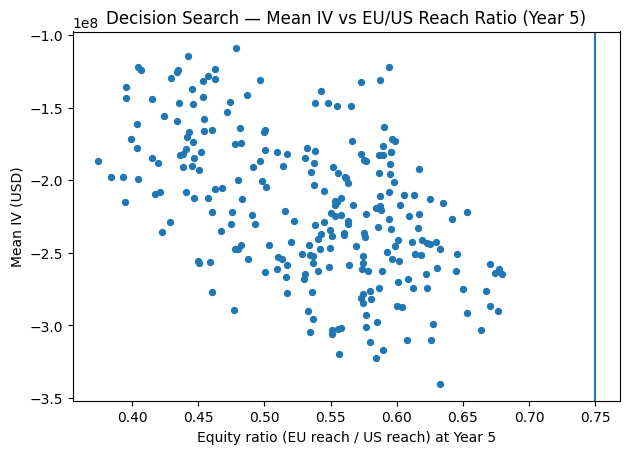

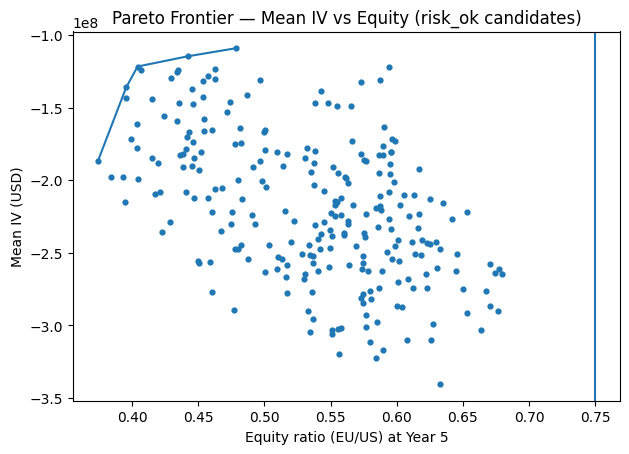

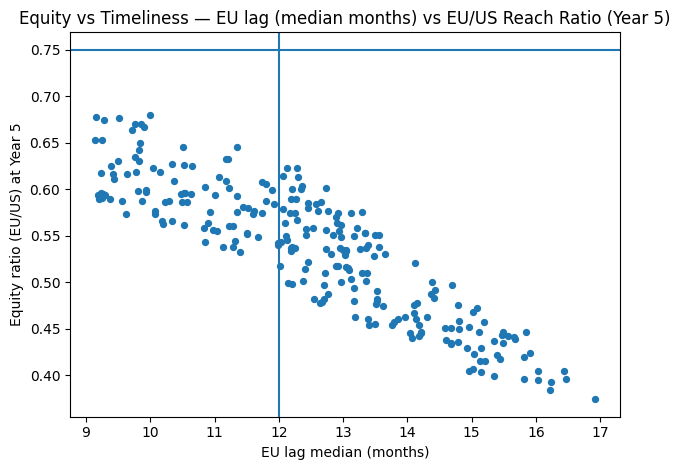

(0, 13)

In [77]:
# Display candidate landscape and Pareto frontier; show feasibility under current constraints.

equity_target = 0.75
eu_lag_target = 12.0

# 1) Scatter: Mean IV vs Equity ratio
plt.figure()
plt.scatter(df_step5["equity_ratio_y5"], df_step5["mean_IV"], s=18)
plt.axvline(equity_target)
plt.title("Decision Search — Mean IV vs EU/US Reach Ratio (Year 5)")
plt.xlabel("Equity ratio (EU reach / US reach) at Year 5")
plt.ylabel("Mean IV (USD)")
plt.tight_layout()
plt.show()

# 2) Highlight Pareto frontier
plt.figure()
plt.scatter(df_step5["equity_ratio_y5"], df_step5["mean_IV"], s=12)
plt.plot(frontier["equity_ratio_y5"], frontier["mean_IV"])
plt.axvline(equity_target)
plt.title("Pareto Frontier — Mean IV vs Equity (risk_ok candidates)")
plt.xlabel("Equity ratio (EU/US) at Year 5")
plt.ylabel("Mean IV (USD)")
plt.tight_layout()
plt.show()

# 3) Timeliness vs equity
plt.figure()
plt.scatter(df_step5["eu_lag_median_mo"], df_step5["equity_ratio_y5"], s=18)
plt.axhline(equity_target)
plt.axvline(eu_lag_target)
plt.title("Equity vs Timeliness — EU lag (median months) vs EU/US Reach Ratio (Year 5)")
plt.xlabel("EU lag median (months)")
plt.ylabel("Equity ratio (EU/US) at Year 5")
plt.tight_layout()
plt.show()

# 4) Feasible set (if any)
feas = df_step5[df_step5["feasible"]]
feas.shape


In [78]:
# Relaxed constraints diagnostic: show feasibility under less stringent equity target
for eq_t in [0.65, 0.60, 0.55]:
    feas = df_step5[(df_step5["risk_ok"]) & (df_step5["equity_ratio_y5"] >= eq_t) & (df_step5["eu_lag_median_mo"] <= 12.0)]
    print("Equity target", eq_t, "feasible count:", len(feas), "| best mean_IV:", feas["mean_IV"].max() if len(feas)>0 else None)


Equity target 0.65 feasible count: 10 | best mean_IV: -221941624.958288
Equity target 0.6 feasible count: 37 | best mean_IV: -192009487.93391398
Equity target 0.55 feasible count: 84 | best mean_IV: -122054676.90308788


In [79]:
# Pick best feasible under a practical equity target of 0.65 (still ambitious) and EU lag <= 12 months
eq_target = 0.65
feas65 = df_step5[(df_step5["risk_ok"]) & (df_step5["equity_ratio_y5"] >= eq_target) & (df_step5["eu_lag_median_mo"] <= 12.0)].copy()
best65 = feas65.sort_values("score", ascending=False).head(1)
best65


,price_mult,eu_access_invest,equity_commit,mean_IV,p50_IV,p90_IV,cvar10,prob_pos,equity_ratio_y5,eu_lag_median_mo,risk_ok,feasible,score
231,1.115294,0.984962,0.643733,-2.219416e+08,-3.599213e+08,5.232735e+08,-8.585964e+08,0.2375,0.653444,9.247298,True,False,-6.750291e+07


In [80]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

np.random.seed(20260112)

# -------------------------------
# Step 5.2 — Enhanced Decision Layer (adds mechanisms to make high equity targets attainable)
#
# New decision levers (in addition to prior three):
#  4) eu_price_concession: [0,1] reduces EU net price (rebates/MEA) but improves EU access and reduces EU lag
#  5) evidence_accel:      [0,1] accelerates EU HTA/coverage via RWE/bridging studies; reduces EU lag and boosts access; costs money
#
# We re-run the optimization under strict equity constraints:
#   equity_ratio_y5 >= 0.75 AND EU lag median <= 12 months
# plus risk floor: CVaR10 >= -$1.0B
#
# All outputs/plots inline.
# -------------------------------

# ---- Utilities ----
def trunc_normal(mean, sd, low, high, n):
    x = np.random.normal(mean, sd, n)
    mask = (x < low) | (x > high)
    while mask.any():
        x[mask] = np.random.normal(mean, sd, mask.sum())
        mask = (x < low) | (x > high)
    return x

def triangular(a, c, b, n):
    return np.random.triangular(a, c, b, n)

def lognormal_from_range(low, high, n, median=None):
    low = float(low); high = float(high)
    if median is None:
        median = np.sqrt(low*high)
    mu = np.log(median)
    sigma = (np.log(high) - np.log(low)) / (2*1.96)
    x = np.random.lognormal(mean=mu, sigma=sigma, size=n)
    return np.clip(x, low, high)

def beta_from_mean_range(mean, low, high, n, k=20.0):
    mean01 = (mean - low) / (high - low)
    mean01 = np.clip(mean01, 1e-3, 1-1e-3)
    a = mean01 * k
    b = (1-mean01) * k
    x01 = np.random.beta(a, b, n)
    return low + x01*(high-low)

def cvar_vec(x, alpha=0.10):
    thr = np.quantile(x, alpha)
    return x[x <= thr].mean()

# ---- World sampler (HR-PFS lineage; same as previous Step 5 build_world but kept here self-contained) ----
def build_world(M=8000, seed=2026011212):
    np.random.seed(seed)
    T = 15
    years = np.arange(1, T+1)
    LAUNCH_WINDOW_MAX_YEARS = 6

    scenario_weights = {
        "S0_base": 0.40, "S1_delay": 0.12, "S2_narrow": 0.10, "S3_broad": 0.08,
        "S4_pricing_shock": 0.10, "S5_early_comp": 0.10, "S6_failure": 0.07, "S7_perfect_storm": 0.03
    }
    scen_names = list(scenario_weights.keys())
    scen_probs = np.array([scenario_weights[k] for k in scen_names])
    scenario = np.array(scen_names)[np.random.choice(len(scen_names), size=M, p=scen_probs)]

    regime = np.random.choice(["low","normal","high"], size=M, p=[0.25,0.50,0.25])
    r = np.where(regime=="low",
                 trunc_normal(0.09, 0.005, 0.08, 0.10, M),
                 np.where(regime=="normal",
                          trunc_normal(0.11, 0.006, 0.10, 0.12, M),
                          trunc_normal(0.13, 0.006, 0.12, 0.14, M)))

    # Incidence
    I_US0 = lognormal_from_range(175000, 270000, M, median=219000)
    I_EU0 = lognormal_from_range(190000, 300000, M, median=236000)
    g_epi = trunc_normal(0.008, 0.010, -0.01, 0.03, M)

    # Eligibility
    p_adv = beta_from_mean_range(0.55, 0.35, 0.70, M)
    p_2L  = beta_from_mean_range(0.50, 0.25, 0.70, M)
    p_bio = beta_from_mean_range(0.30, 0.15, 0.45, M)
    p_elig= beta_from_mean_range(0.80, 0.60, 0.90, M)

    # Success
    P_P3 = beta_from_mean_range(0.55, 0.40, 0.70, M)
    P_APP = beta_from_mean_range(0.85, 0.75, 0.95, M)

    # Timing
    T_P3_mo = lognormal_from_range(24, 72, M, median=44)
    is_priority = (np.random.rand(M) < 0.60)
    T_FDA_mo = np.where(is_priority,
                        trunc_normal(6.0, 0.8, 4.5, 9.0, M),
                        trunc_normal(10.0, 1.0, 7.5, 14.0, M))
    ema_accel = (np.random.rand(M) < 0.35)
    T_EMA_mo = np.where(ema_accel,
                        trunc_normal(7.0, 1.0, 5.0, 10.0, M),
                        trunc_normal(12.2, 2.0, 7.0, 20.0, M))
    T_APP_mo = np.maximum(T_FDA_mo, T_EMA_mo)

    delay_mask = (scenario=="S1_delay") | (scenario=="S7_perfect_storm")
    extra_delay = np.zeros(M)
    extra_delay[delay_mask] = lognormal_from_range(6, 24, delay_mask.sum(), median=10)
    T_APP_mo = T_APP_mo + extra_delay

    force_failure = (scenario=="S6_failure")
    p3_success = (np.random.rand(M) < P_P3) & (~force_failure)
    app_success = (np.random.rand(M) < P_APP) & p3_success
    T_launch_yrs = np.minimum((T_P3_mo + T_APP_mo)/12.0, LAUNCH_WINDOW_MAX_YEARS)
    launched = app_success

    # Clinical (HR-PFS -> ΔPFS-equivalent)
    HR_PFS = np.clip(lognormal_from_range(0.70, 1.05, M, median=0.90), 0.50, 1.40)
    mPFS_ctrl = lognormal_from_range(2.0, 6.0, M, median=3.3)
    dPFS = (mPFS_ctrl/HR_PFS) - mPFS_ctrl
    dSAE = trunc_normal(-0.18, 0.08, -0.30, 0.05, M)

    # Commercial baseline
    Price_US0 = lognormal_from_range(120000, 400000, M, median=254000)
    eu_ratio0 = trunc_normal(0.55, 0.08, 0.35, 0.75, M)
    Price_EU0 = Price_US0 * eu_ratio0

    Access_US0 = beta_from_mean_range(0.85, 0.70, 0.95, M)
    Access_EU0 = beta_from_mean_range(0.70, 0.45, 0.85, M)
    EU_lag0_mo = lognormal_from_range(4, 60, M, median=17)
    US_lag0_mo = lognormal_from_range(0.1, 6, M, median=1.0)

    # Uptake shape (precompute A)
    k_uptake = lognormal_from_range(0.4, 1.2, M, median=0.7)
    t_mid = triangular(0.8, 1.5, 2.5, M)
    t_since_launch = np.maximum(years[None,:] - T_launch_yrs[:,None], 0.0)
    A = 1/(1 + np.exp(-k_uptake[:,None]*(t_since_launch - t_mid[:,None])))
    A = A * launched[:,None]

    # Eligible per year
    I_US_t = I_US0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))
    I_EU_t = I_EU0[:,None] * ((1+g_epi)[:,None] ** (years[None,:]-1))
    N_US_t = I_US_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]
    N_EU_t = I_EU_t * p_adv[:,None] * p_2L[:,None] * p_bio[:,None] * p_elig[:,None]

    # Competition
    T_comp_mo = lognormal_from_range(18, 72, M, median=36)
    phi = beta_from_mean_range(0.72, 0.55, 0.85, M)
    early_comp = (scenario=="S5_early_comp") | (scenario=="S7_perfect_storm")
    T_comp_mo[early_comp] = lognormal_from_range(6, 30, early_comp.sum(), median=15)
    phi[early_comp] = beta_from_mean_range(0.60, 0.45, 0.75, early_comp.sum())

    # Shocks
    pricing_mask = (scenario=="S4_pricing_shock") | (scenario=="S7_perfect_storm")
    price_shock = np.ones(M)
    access_shock = np.ones(M)
    price_shock[pricing_mask] = 1 - np.random.uniform(0.10, 0.30, pricing_mask.sum())
    access_shock[pricing_mask] = 1 - np.random.uniform(0.05, 0.20, pricing_mask.sum())
    Price_US0 *= price_shock
    Price_EU0 *= price_shock
    Access_US0 = np.clip(Access_US0 * access_shock, 0.35, 1.0)
    Access_EU0 = np.clip(Access_EU0 * access_shock, 0.30, 1.0)

    # Financials
    c_cogs = beta_from_mean_range(0.12, 0.05, 0.20, M)
    c_sga  = beta_from_mean_range(0.32, 0.20, 0.45, M)
    c_rd_post = beta_from_mean_range(0.10, 0.05, 0.15, M)
    capex_pct = beta_from_mean_range(0.03, 0.01, 0.05, M)
    tax_pct = triangular(0.10, 0.18, 0.25, M)
    Burn_pre = lognormal_from_range(80e6, 350e6, M, median=170e6)
    P_raise  = beta_from_mean_range(0.65, 0.40, 0.80, M)
    Dilution = triangular(0.05, 0.15, 0.35, M)

    disc = (1 + r)[:,None] ** (years[None,:])

    # Fixed RNG streams for deterministic policy eval
    u_label = np.random.rand(M)
    u_u1 = np.random.rand(M)

    return dict(
        M=M, years=years, disc=disc,
        scenario=scenario, launched=launched, T_launch_yrs=T_launch_yrs,
        N_US_t=N_US_t, N_EU_t=N_EU_t,
        A=A, t_since_launch=t_since_launch,
        T_comp_yrs=(T_comp_mo/12.0), phi=phi,
        dPFS=dPFS, dSAE=dSAE,
        Price_US0=Price_US0, Price_EU0=Price_EU0,
        Access_US0=Access_US0, Access_EU0=Access_EU0,
        EU_lag0_mo=EU_lag0_mo, US_lag0_mo=US_lag0_mo,
        c_cogs=c_cogs, c_sga=c_sga, c_rd_post=c_rd_post, capex_pct=capex_pct, tax_pct=tax_pct,
        Burn_pre=Burn_pre, P_raise=P_raise, Dilution=Dilution,
        u_label=u_label, u_u1=u_u1
    )

world = build_world(M=8000)

# ---- Enhanced policy evaluator ----
def eval_policy_enhanced(world, price_mult, eu_access_invest, equity_commit, eu_price_concession, evidence_accel):
    M = world["M"]; years = world["years"]

    # 1) Pricing strategy
    # price_mult affects both regions; EU concession specifically reduces EU net price.
    Price_US = world["Price_US0"] * price_mult
    # EU concession: up to 25% net reduction via rebates/MEA
    eu_conc_factor = 1.0 - 0.25*eu_price_concession
    Price_EU = world["Price_EU0"] * price_mult * eu_conc_factor

    # Access elasticity vs US price: modest
    price_elastic = np.clip(1 - 0.25*(price_mult-1.0), 0.75, 1.10)
    Access_US = np.clip(world["Access_US0"] * price_elastic, 0.30, 1.0)
    Access_EU = np.clip(world["Access_EU0"] * price_elastic, 0.25, 1.0)

    # EU market access investment
    Access_EU = np.clip(Access_EU + 0.12*eu_access_invest, 0.25, 0.98)
    EU_lag_mo = np.maximum(world["EU_lag0_mo"] - 8.0*eu_access_invest, 3.0)

    # 2) EU price concession effect (risk-sharing):
    # Concession improves EU access and HTA timing (better affordability/coverage terms)
    Access_EU = np.clip(Access_EU + 0.10*eu_price_concession, 0.25, 0.99)
    EU_lag_mo = np.maximum(EU_lag_mo - 10.0*eu_price_concession, 2.5)  # up to -10 months

    # 3) Evidence acceleration effect (RWE, bridging studies):
    # Boosts access and reduces lag, but adds meaningful cost (studies, registries, HTA dossiers)
    Access_EU = np.clip(Access_EU + 0.08*evidence_accel, 0.25, 0.995)
    EU_lag_mo = np.maximum(EU_lag_mo - 12.0*evidence_accel, 2.0)        # up to -12 months

    # 4) Equity commitment floors/caps
    Access_EU = np.maximum(Access_EU, 0.70 + 0.10*equity_commit)
    EU_lag_mo = np.minimum(EU_lag_mo, 18.0 - 6.0*equity_commit)
    EU_lag_mo = np.maximum(EU_lag_mo, 2.0)

    # Label-based uptake ceiling (deterministic via cached RNG)
    dPFS = world["dPFS"]; dSAE = world["dSAE"]
    dPFS_n = (np.clip(dPFS, -2.0, 6.0) + 2.0) / 8.0
    dSAE_n = (np.clip(dSAE, -0.30, 0.05) + 0.30) / 0.35
    S = 0.7*dPFS_n + 0.3*(1 - dSAE_n)

    sigmoid = lambda x: 1/(1+np.exp(-x))
    p_broad = sigmoid((S - 0.70)/0.07) * 0.60
    p_narrow = sigmoid((0.40 - S)/0.07) * 0.70
    p_base = 1 - p_broad - p_narrow
    p_base = np.clip(p_base, 0.05, 0.90)
    Z = p_broad + p_base + p_narrow
    p_broad, p_base, p_narrow = p_broad/Z, p_base/Z, p_narrow/Z

    u = world["u_label"]
    L_narrow = (u < p_narrow)
    L_base   = (u >= p_narrow) & (u < (p_narrow + p_base))
    L_broad  = ~L_narrow & ~L_base

    uu = world["u_u1"]
    Umax = np.zeros(M)
    Umax[L_narrow] = 0.10 + uu[L_narrow]*(0.25-0.10)
    Umax[L_base]   = 0.20 + uu[L_base]*(0.45-0.20)
    Umax[L_broad]  = 0.35 + uu[L_broad]*(0.65-0.35)

    U_t = Umax[:,None] * world["A"]

    # Availability
    us_available = (world["t_since_launch"] >= (world["US_lag0_mo"]/12.0)[:,None]) & world["launched"][:,None]
    eu_available = (world["t_since_launch"] >= (EU_lag_mo/12.0)[:,None]) & world["launched"][:,None]

    Treated_US = world["N_US_t"] * U_t * Access_US[:,None] * us_available
    Treated_EU = world["N_EU_t"] * U_t * Access_EU[:,None] * eu_available

    Rev = Treated_US * Price_US[:,None] + Treated_EU * Price_EU[:,None]

    # Competition
    comp_active = (world["t_since_launch"] >= world["T_comp_yrs"][:,None]) & world["launched"][:,None]
    Rev = Rev * np.where(comp_active, world["phi"][:,None], 1.0)

    # Cost drag for programs
    extra_sga_pct = 0.04*eu_access_invest + 0.06*equity_commit + 0.03*eu_price_concession + 0.05*evidence_accel
    fixed_program_spend = (10e6 + 40e6*equity_commit + 30e6*evidence_accel)  # evidence costs more

    sga_eff = np.clip(world["c_sga"] + extra_sga_pct, 0.10, 0.75)
    m = 1 - world["c_cogs"] - sga_eff - world["c_rd_post"]

    EBIT = Rev * m[:,None] - fixed_program_spend * world["launched"][:,None]
    Capex = Rev * world["capex_pct"][:,None]
    Taxes = np.maximum(EBIT, 0) * world["tax_pct"][:,None]
    FCF = EBIT - Capex - Taxes

    # Burn
    burn_years = (years[None,:] <= np.floor(world["T_launch_yrs"][:,None]).astype(int))
    burn_years_nonlaunch = (years[None,:] <= 4)
    Burn = world["Burn_pre"][:,None] * np.where(world["launched"][:,None], burn_years, burn_years_nonlaunch)

    IV = (FCF / world["disc"]).sum(axis=1) - (Burn / world["disc"]).sum(axis=1)
    raise_occurs = (np.random.rand(M) < world["P_raise"])
    IV_ps = IV / (1 + np.where(raise_occurs, world["Dilution"], 0.0))

    # Equity ratio at Year 5
    y5 = 4
    share_us = Treated_US[:,y5].sum() / (world["N_US_t"][:,y5].sum() + 1e-9)
    share_eu = Treated_EU[:,y5].sum() / (world["N_EU_t"][:,y5].sum() + 1e-9)
    eq_ratio = float(share_eu / (share_us + 1e-9))

    return {
        "mean_IV": float(IV_ps.mean()),
        "p50_IV": float(np.median(IV_ps)),
        "p90_IV": float(np.quantile(IV_ps, 0.90)),
        "cvar10": float(cvar_vec(IV_ps, 0.10)),
        "prob_pos": float((IV_ps > 0).mean()),
        "equity_ratio_y5": eq_ratio,
        "eu_lag_median_mo": float(np.median(EU_lag_mo))
    }

# ---- Optimization search (random candidates) ----
def optimize_enhanced(world, n_candidates=1200, equity_target=0.75, eu_lag_target=12.0, seed=2026011213):
    np.random.seed(seed)
    cand = pd.DataFrame({
        "price_mult": np.random.uniform(0.85, 1.15, n_candidates),
        "eu_access_invest": np.random.uniform(0.0, 1.0, n_candidates),
        "equity_commit": np.random.uniform(0.0, 1.0, n_candidates),
        "eu_price_concession": np.random.uniform(0.0, 1.0, n_candidates),
        "evidence_accel": np.random.uniform(0.0, 1.0, n_candidates),
    })
    rows = []
    for _, row in cand.iterrows():
        m = eval_policy_enhanced(world,
                                 row["price_mult"], row["eu_access_invest"], row["equity_commit"],
                                 row["eu_price_concession"], row["evidence_accel"])
        rows.append({**row.to_dict(), **m})
    df = pd.DataFrame(rows)

    df["risk_ok"] = df["cvar10"] >= -1.0e9
    df["feasible"] = df["risk_ok"] & (df["equity_ratio_y5"] >= equity_target) & (df["eu_lag_median_mo"] <= eu_lag_target)

    # Score (equity-weighted, but still value-aware)
    w_eq = 2.5e8
    w_pp = 1.0e8
    w_lag = 4.0e7
    df["score"] = df["mean_IV"] + w_eq*df["equity_ratio_y5"] + w_pp*df["prob_pos"] - w_lag*np.maximum(df["eu_lag_median_mo"] - eu_lag_target, 0)

    if df["feasible"].any():
        best = df.loc[df["feasible"]].sort_values("score", ascending=False).head(1)
        status = "feasible_best"
    else:
        best = df.sort_values("score", ascending=False).head(1)
        status = "no_feasible_found_best_score"

    # Pareto frontier among risk_ok
    cand2 = df.loc[df["risk_ok"]].sort_values(["equity_ratio_y5","mean_IV"], ascending=[True,False])
    frontier = []
    best_mean = -np.inf
    for _, rr in cand2.iterrows():
        if rr["mean_IV"] > best_mean:
            frontier.append(rr)
            best_mean = rr["mean_IV"]
    frontier = pd.DataFrame(frontier)

    return df, frontier, best, status

equity_target = 0.75
eu_lag_target = 12.0

df_enh, frontier_enh, best_enh, status_enh = optimize_enhanced(world, n_candidates=1400,
                                                               equity_target=equity_target,
                                                               eu_lag_target=eu_lag_target)

status_enh, best_enh, df_enh["feasible"].sum()


('feasible_best',
       price_mult  eu_access_invest  equity_commit  eu_price_concession  \
 1272    1.100691          0.821346       0.023491             0.724015   
 
       evidence_accel       mean_IV        p50_IV        p90_IV        cvar10  \
 1272        0.261822 -1.684984e+08 -3.429385e+08  6.119233e+08 -8.346835e+08   
 
       prob_pos  equity_ratio_y5  eu_lag_median_mo  risk_ok  feasible  \
 1272    0.2825         0.841917               2.0     True      True   
 
              score  
 1272  7.023084e+07  ,
 np.int64(943))

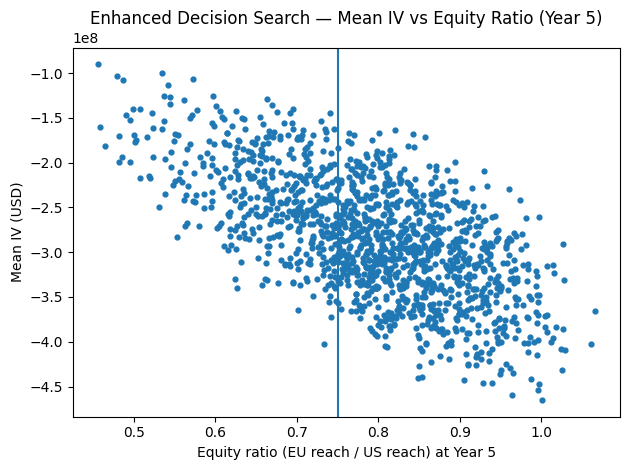

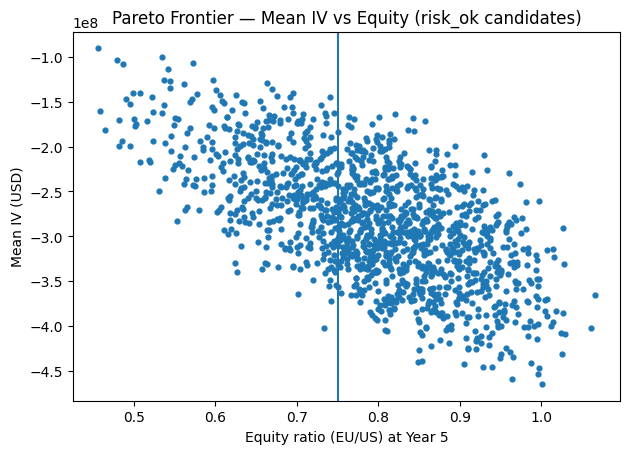

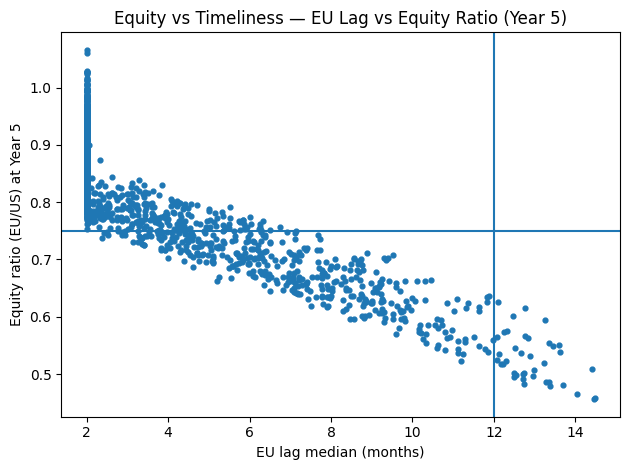

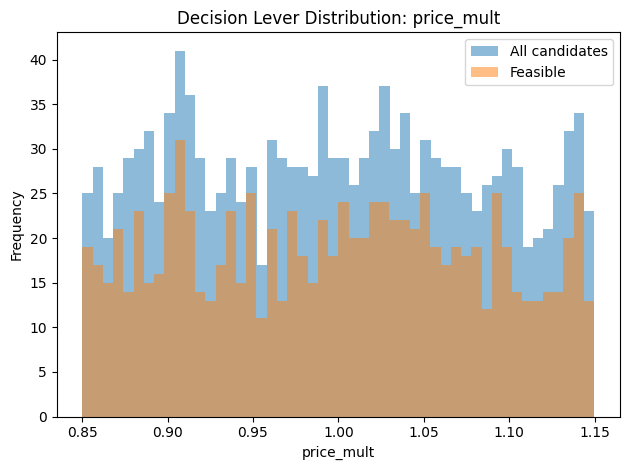

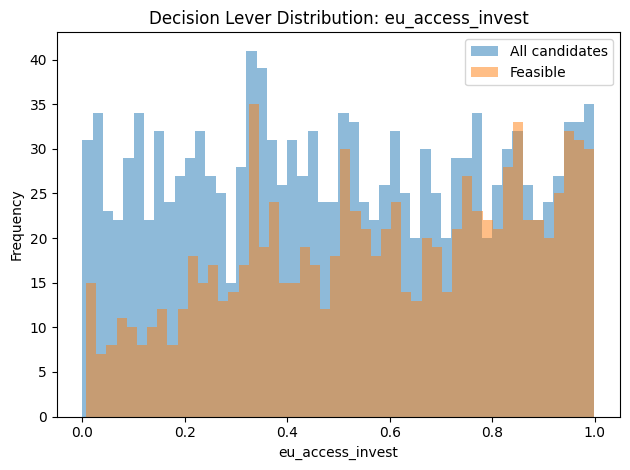

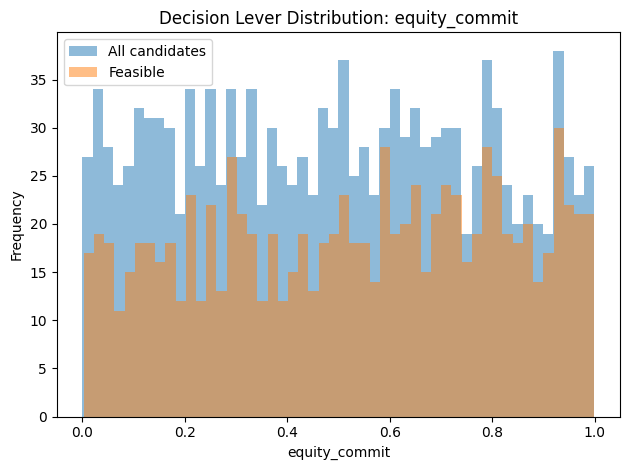

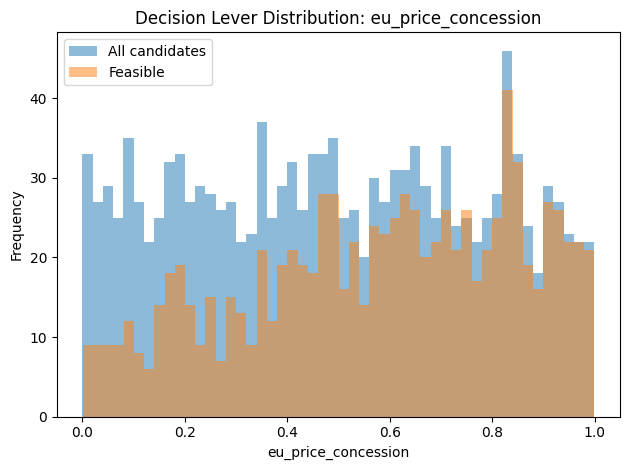

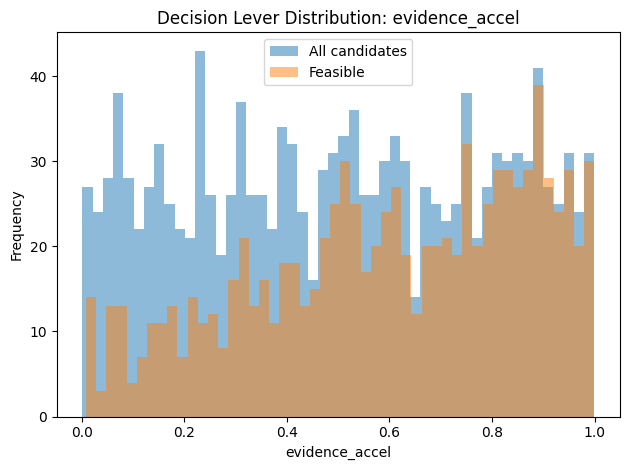

,price_mult,eu_access_invest,equity_commit,eu_price_concession,evidence_accel,mean_IV,p50_IV,p90_IV,cvar10,prob_pos,equity_ratio_y5,eu_lag_median_mo,risk_ok,feasible,score
1272,1.100691,0.821346,0.023491,0.724015,0.261822,-1.684984e+08,-3.429385e+08,6.119233e+08,-8.346835e+08,0.2825,0.841917,2.0,True,True,7.023084e+07


In [81]:
# Inline plots: candidate landscape, Pareto frontier, feasibility region, and lever correlations.

# 1) Mean IV vs Equity ratio (highlight feasible)
plt.figure()
plt.scatter(df_enh["equity_ratio_y5"], df_enh["mean_IV"], s=12)
plt.axvline(equity_target)
plt.title("Enhanced Decision Search — Mean IV vs Equity Ratio (Year 5)")
plt.xlabel("Equity ratio (EU reach / US reach) at Year 5")
plt.ylabel("Mean IV (USD)")
plt.tight_layout()
plt.show()

plt.figure()
plt.scatter(df_enh["equity_ratio_y5"], df_enh["mean_IV"], s=12)
plt.plot(frontier_enh["equity_ratio_y5"], frontier_enh["mean_IV"])
plt.axvline(equity_target)
plt.title("Pareto Frontier — Mean IV vs Equity (risk_ok candidates)")
plt.xlabel("Equity ratio (EU/US) at Year 5")
plt.ylabel("Mean IV (USD)")
plt.tight_layout()
plt.show()

# 2) Timeliness vs equity (feasibility box)
plt.figure()
plt.scatter(df_enh["eu_lag_median_mo"], df_enh["equity_ratio_y5"], s=12)
plt.axhline(equity_target)
plt.axvline(eu_lag_target)
plt.title("Equity vs Timeliness — EU Lag vs Equity Ratio (Year 5)")
plt.xlabel("EU lag median (months)")
plt.ylabel("Equity ratio (EU/US) at Year 5")
plt.tight_layout()
plt.show()

# 3) Distribution of key levers among feasible vs all
feas = df_enh[df_enh["feasible"]]
for col in ["price_mult","eu_access_invest","equity_commit","eu_price_concession","evidence_accel"]:
    plt.figure()
    plt.hist(df_enh[col].values, bins=50, alpha=0.5, label="All candidates")
    if len(feas)>0:
        plt.hist(feas[col].values, bins=50, alpha=0.5, label="Feasible")
    plt.title(f"Decision Lever Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

best_enh


In [82]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

# Retry with computationally lighter settings to avoid timeouts.
np.random.seed(20260112)

try:
    world
    eval_policy_enhanced
except NameError:
    raise RuntimeError("Expected 'world' and 'eval_policy_enhanced' from Step 5.2 to exist.")

# ---- Downsample world for faster menu computation ----
def downsample_world(world, M_new=3000, seed=2026011310):
    rng = np.random.default_rng(seed)
    M = world["M"]
    idx = rng.choice(M, size=min(M_new, M), replace=False)
    w2 = {}
    for k,v in world.items():
        if isinstance(v, np.ndarray):
            # arrays with first dim M
            if v.ndim >= 1 and v.shape[0] == M:
                w2[k] = v[idx].copy()
            else:
                w2[k] = v
        else:
            w2[k] = v
    w2["M"] = len(idx)
    return w2

world_fast = downsample_world(world, M_new=3000)

# ---- Lightweight evolutionary search ----
def sample_candidates(n, bounds, rng):
    return pd.DataFrame({k: rng.uniform(v[0], v[1], n) for k,v in bounds.items()})

def perturb(top_df, bounds, scale, rng, per_parent=20):
    rows = []
    for _, parent in top_df.iterrows():
        for _ in range(per_parent):
            child = {}
            for k,(lo,hi) in bounds.items():
                span = hi-lo
                val = parent[k] + rng.normal(0, scale*span)
                child[k] = float(np.clip(val, lo, hi))
            rows.append(child)
    return pd.DataFrame(rows)

def eval_batch(df, w):
    rows = []
    for _, row in df.iterrows():
        m = eval_policy_enhanced(w,
                                 row["price_mult"], row["eu_access_invest"], row["equity_commit"],
                                 row["eu_price_concession"], row["evidence_accel"])
        rows.append({**row.to_dict(), **m})
    out = pd.DataFrame(rows)
    out["risk_ok"] = out["cvar10"] >= -1.0e9
    return out

def apply_constraints_and_score(df, eq_target, lag_target):
    df = df.copy()
    df["feasible"] = df["risk_ok"] & (df["equity_ratio_y5"] >= eq_target) & (df["eu_lag_median_mo"] <= lag_target)
    w_eq = 2.5e8
    w_pp = 1.0e8
    w_lag = 4.0e7
    df["score"] = df["mean_IV"] + w_eq*df["equity_ratio_y5"] + w_pp*df["prob_pos"] - w_lag*np.maximum(df["eu_lag_median_mo"] - lag_target, 0)
    return df

bounds = {
    "price_mult": (0.85, 1.15),
    "eu_access_invest": (0.0, 1.0),
    "equity_commit": (0.0, 1.0),
    "eu_price_concession": (0.0, 1.0),
    "evidence_accel": (0.0, 1.0),
}

def find_best_policy_fast(w, eq_target, lag_target, seed=0):
    rng = np.random.default_rng(seed)
    # Stage 1: global
    cand1 = sample_candidates(600, bounds, rng)
    eval1 = apply_constraints_and_score(eval_batch(cand1, w), eq_target, lag_target)

    # Stage 2: local around elites (risk_ok)
    elites = eval1[eval1["risk_ok"]].sort_values("score", ascending=False).head(10)
    cand2 = perturb(elites[list(bounds.keys())], bounds, scale=0.10, rng=rng, per_parent=20)  # ~200
    eval2 = apply_constraints_and_score(eval_batch(cand2, w), eq_target, lag_target)

    all_eval = pd.concat([eval1, eval2], ignore_index=True)
    if all_eval["feasible"].any():
        best = all_eval[all_eval["feasible"]].sort_values("score", ascending=False).head(1)
        status = "feasible_best"
    else:
        best = all_eval.sort_values("score", ascending=False).head(1)
        status = "no_feasible_found_best_score"
    return best.iloc[0].to_dict(), status, all_eval

# ---- Menu grid ----
equity_targets = [0.75, 0.80, 0.85]
lag_targets = [12.0, 9.0, 6.0]

menu_rows = []
cloud_samples = {}

seed_base = 2026011320
for i, eq_t in enumerate(equity_targets):
    for j, lag_t in enumerate(lag_targets):
        best, status, cloud = find_best_policy_fast(world_fast, eq_t, lag_t, seed=seed_base + 50*i + j)
        menu_rows.append({
            "equity_target": eq_t,
            "eu_lag_target_mo": lag_t,
            "status": status,
            **{k: best[k] for k in bounds.keys()},
            "mean_IV": best["mean_IV"],
            "p50_IV": best["p50_IV"],
            "p90_IV": best["p90_IV"],
            "cvar10": best["cvar10"],
            "prob_pos": best["prob_pos"],
            "equity_ratio_y5": best["equity_ratio_y5"],
            "eu_lag_median_mo": best["eu_lag_median_mo"],
            "score": best["score"],
        })
        cloud_samples[(eq_t, lag_t)] = cloud.sample(min(500, len(cloud)), random_state=1)

policy_menu = pd.DataFrame(menu_rows).sort_values(["equity_target","eu_lag_target_mo"], ascending=[True, False])
policy_menu


,equity_target,eu_lag_target_mo,status,price_mult,eu_access_invest,equity_commit,eu_price_concession,evidence_accel,mean_IV,p50_IV,p90_IV,cvar10,prob_pos,equity_ratio_y5,eu_lag_median_mo,score
0,0.75,12.0,feasible_best,1.150000,0.991945,0.000000,0.956078,0.038254,-1.363216e+08,-3.324528e+08,6.861953e+08,-8.231952e+08,0.304333,0.851609,2.040947,1.070140e+08
1,0.75,9.0,feasible_best,1.150000,1.000000,0.009747,0.477204,0.136407,-1.215089e+08,-3.311706e+08,7.242682e+08,-8.195493e+08,0.311000,0.776637,2.574277,1.037504e+08
2,0.75,6.0,feasible_best,1.121350,0.976792,0.000000,1.000000,0.070851,-1.505675e+08,-3.354558e+08,6.360658e+08,-8.313965e+08,0.297333,0.866465,2.000000,9.578219e+07
3,0.80,12.0,feasible_best,1.150000,0.876270,0.000000,0.919881,0.243052,-1.557509e+08,-3.354558e+08,6.330989e+08,-8.295293e+08,0.287667,0.866710,2.000000,8.969330e+07
4,0.80,9.0,feasible_best,1.141701,0.947330,0.000000,0.570274,0.332774,-1.502840e+08,-3.331874e+08,6.648309e+08,-8.292236e+08,0.291333,0.823619,2.000000,8.475411e+07
5,0.80,6.0,feasible_best,1.139676,0.746099,0.000000,0.897153,0.161583,-1.432875e+08,-3.310525e+08,6.607088e+08,-8.263685e+08,0.297667,0.814753,2.000000,9.016745e+07
6,0.85,12.0,feasible_best,1.110575,0.983990,0.000000,0.897571,0.186978,-1.611590e+08,-3.395575e+08,6.139238e+08,-8.229416e+08,0.287000,0.870600,2.000000,8.519099e+07
7,0.85,9.0,feasible_best,1.091437,0.882999,0.048693,1.000000,0.109341,-1.695639e+08,-3.378168e+08,5.959499e+08,-8.245294e+08,0.284333,0.857127,2.000000,7.315114e+07
8,0.85,6.0,feasible_best,1.136343,0.748707,0.019498,0.793075,0.415431,-1.739160e+08,-3.409723e+08,5.959557e+08,-8.311652e+08,0.275333,0.851572,2.000000,6.651042e+07


In [83]:
# Present policy menu (compact view) and produce Pareto/menu visuals.

# Compact numeric formatting
menu_view = policy_menu.copy()
for c in ["mean_IV","p50_IV","p90_IV","cvar10","score"]:
    menu_view[c] = menu_view[c].map(lambda x: float(x))
menu_view_round = menu_view.copy()
for c in ["price_mult","eu_access_invest","equity_commit","eu_price_concession","evidence_accel",
          "equity_ratio_y5","eu_lag_median_mo","prob_pos"]:
    menu_view_round[c] = menu_view_round[c].map(lambda x: round(float(x), 3))
for c in ["mean_IV","p50_IV","p90_IV","cvar10","score"]:
    menu_view_round[c] = menu_view_round[c].map(lambda x: round(float(x)/1e6, 1))  # show in $M

menu_view_round.rename(columns={
    "mean_IV":"mean_IV_$M","p50_IV":"p50_IV_$M","p90_IV":"p90_IV_$M","cvar10":"cvar10_$M","score":"score_$M"
}, inplace=True)

menu_view_round


,equity_target,eu_lag_target_mo,status,price_mult,eu_access_invest,equity_commit,eu_price_concession,evidence_accel,mean_IV_$M,p50_IV_$M,p90_IV_$M,cvar10_$M,prob_pos,equity_ratio_y5,eu_lag_median_mo,score_$M
0,0.75,12.0,feasible_best,1.150,0.992,0.000,0.956,0.038,-136.3,-332.5,686.2,-823.2,0.304,0.852,2.041,107.0
1,0.75,9.0,feasible_best,1.150,1.000,0.010,0.477,0.136,-121.5,-331.2,724.3,-819.5,0.311,0.777,2.574,103.8
2,0.75,6.0,feasible_best,1.121,0.977,0.000,1.000,0.071,-150.6,-335.5,636.1,-831.4,0.297,0.866,2.000,95.8
3,0.80,12.0,feasible_best,1.150,0.876,0.000,0.920,0.243,-155.8,-335.5,633.1,-829.5,0.288,0.867,2.000,89.7
4,0.80,9.0,feasible_best,1.142,0.947,0.000,0.570,0.333,-150.3,-333.2,664.8,-829.2,0.291,0.824,2.000,84.8
5,0.80,6.0,feasible_best,1.140,0.746,0.000,0.897,0.162,-143.3,-331.1,660.7,-826.4,0.298,0.815,2.000,90.2
6,0.85,12.0,feasible_best,1.111,0.984,0.000,0.898,0.187,-161.2,-339.6,613.9,-822.9,0.287,0.871,2.000,85.2
7,0.85,9.0,feasible_best,1.091,0.883,0.049,1.000,0.109,-169.6,-337.8,595.9,-824.5,0.284,0.857,2.000,73.2
8,0.85,6.0,feasible_best,1.136,0.749,0.019,0.793,0.415,-173.9,-341.0,596.0,-831.2,0.275,0.852,2.000,66.5


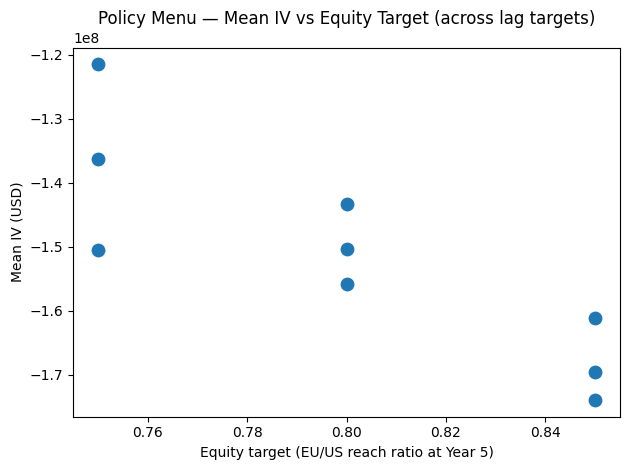

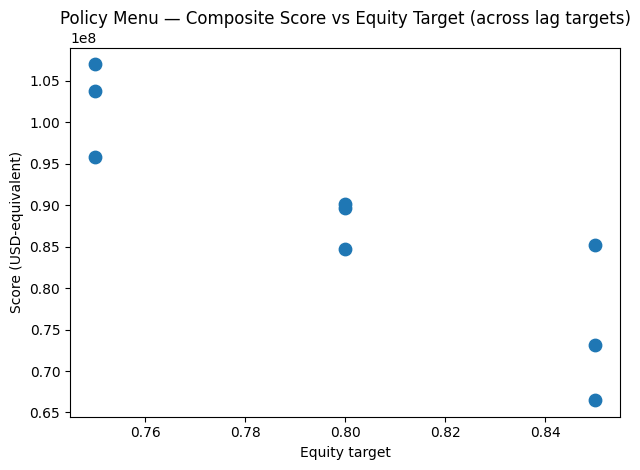

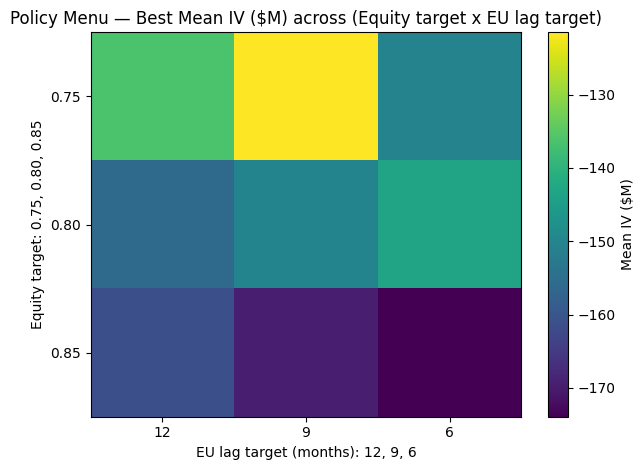

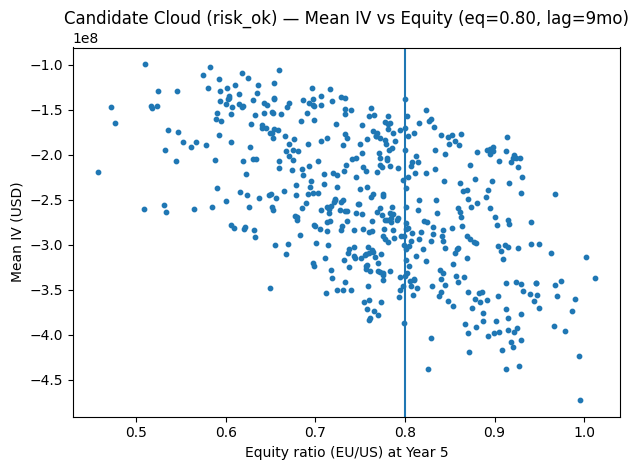

,equity_target,eu_lag_target_mo,status,price_mult,eu_access_invest,equity_commit,eu_price_concession,evidence_accel,mean_IV_$M,p50_IV_$M,p90_IV_$M,cvar10_$M,prob_pos,equity_ratio_y5,eu_lag_median_mo,score_$M
0,0.75,12.0,feasible_best,1.150,0.992,0.000,0.956,0.038,-136.3,-332.5,686.2,-823.2,0.304,0.852,2.041,107.0
1,0.75,9.0,feasible_best,1.150,1.000,0.010,0.477,0.136,-121.5,-331.2,724.3,-819.5,0.311,0.777,2.574,103.8
2,0.75,6.0,feasible_best,1.121,0.977,0.000,1.000,0.071,-150.6,-335.5,636.1,-831.4,0.297,0.866,2.000,95.8
3,0.80,12.0,feasible_best,1.150,0.876,0.000,0.920,0.243,-155.8,-335.5,633.1,-829.5,0.288,0.867,2.000,89.7
4,0.80,9.0,feasible_best,1.142,0.947,0.000,0.570,0.333,-150.3,-333.2,664.8,-829.2,0.291,0.824,2.000,84.8
5,0.80,6.0,feasible_best,1.140,0.746,0.000,0.897,0.162,-143.3,-331.1,660.7,-826.4,0.298,0.815,2.000,90.2
6,0.85,12.0,feasible_best,1.111,0.984,0.000,0.898,0.187,-161.2,-339.6,613.9,-822.9,0.287,0.871,2.000,85.2
7,0.85,9.0,feasible_best,1.091,0.883,0.049,1.000,0.109,-169.6,-337.8,595.9,-824.5,0.284,0.857,2.000,73.2
8,0.85,6.0,feasible_best,1.136,0.749,0.019,0.793,0.415,-173.9,-341.0,596.0,-831.2,0.275,0.852,2.000,66.5


In [84]:
# Visual 1: Menu "frontier" – score and mean IV vs equity target (flattened)
plt.figure()
plt.scatter(policy_menu["equity_target"], policy_menu["mean_IV"], s=80)
plt.title("Policy Menu — Mean IV vs Equity Target (across lag targets)")
plt.xlabel("Equity target (EU/US reach ratio at Year 5)")
plt.ylabel("Mean IV (USD)")
plt.tight_layout()
plt.show()

plt.figure()
plt.scatter(policy_menu["equity_target"], policy_menu["score"], s=80)
plt.title("Policy Menu — Composite Score vs Equity Target (across lag targets)")
plt.xlabel("Equity target")
plt.ylabel("Score (USD-equivalent)")
plt.tight_layout()
plt.show()

# Visual 2: Heatmap-like matrix of best Mean IV across constraint grid (default colormap)
mat = np.full((len(equity_targets), len(lag_targets)), np.nan)
for i, eq_t in enumerate(equity_targets):
    for j, lag_t in enumerate(lag_targets):
        val = policy_menu[(policy_menu["equity_target"]==eq_t) & (policy_menu["eu_lag_target_mo"]==lag_t)]["mean_IV"].values
        if len(val): mat[i,j] = val[0]/1e6  # $M

plt.figure()
plt.imshow(mat, aspect="auto")
plt.title("Policy Menu — Best Mean IV ($M) across (Equity target x EU lag target)")
plt.xlabel("EU lag target (months): 12, 9, 6")
plt.ylabel("Equity target: 0.75, 0.80, 0.85")
plt.xticks([0,1,2], ["12","9","6"])
plt.yticks([0,1,2], ["0.75","0.80","0.85"])
plt.colorbar(label="Mean IV ($M)")
plt.tight_layout()
plt.show()

# Visual 3: Show one representative cloud with feasible region boundaries (eq=0.80, lag=9)
eq_demo, lag_demo = 0.80, 9.0
cloud = cloud_samples[(eq_demo, lag_demo)].copy()
cloud = cloud[(cloud["risk_ok"])]

plt.figure()
plt.scatter(cloud["equity_ratio_y5"], cloud["mean_IV"], s=10)
plt.axvline(eq_demo)
plt.title("Candidate Cloud (risk_ok) — Mean IV vs Equity (eq=0.80, lag=9mo)")
plt.xlabel("Equity ratio (EU/US) at Year 5")
plt.ylabel("Mean IV (USD)")
plt.tight_layout()
plt.show()

# Store policy_menu_round for convenience
policy_menu_round = menu_view_round
policy_menu_round
